In [1]:
import os
import pandas as pd

# Đường dẫn tới thư mục chứa các file CSV
folder_path = "."

# Nhóm 1: Các file ngân hàng
bank_files = ['ACB.csv', 'BID.csv', 'CTG.csv', 'HDB.csv', 'LPB.csv', 'MBB.csv', 'SHB.csv',
              'SSB.csv', 'STB.csv', 'TCB.csv', 'TPB.csv', 'VCB.csv', 'VIB.csv', 'VPB.csv']

# Nhóm 2: Các file phi ngân hàng
non_bank_files = ['BCM.csv', 'BVH.csv', 'FPT.csv', 'GAS.csv', 'GVR.csv', 'HPG.csv',
                  'MSN.csv', 'MWG.csv', 'PLX.csv', 'SAB.csv', 'SSI.csv', 'VHM.csv',
                  'VIC.csv', 'VJC.csv', 'VNM.csv', 'VRE.csv']

# Hàm gộp nhóm file CSV vào một DataFrame
def load_and_concat(files, folder_path):
    dfs = []
    for file in files:
        path = os.path.join(folder_path, file)
        df = pd.read_csv(path)
        company_name = file.split('.')[0]
        df.insert(0, 'company', company_name)  # Thêm cột company vào đầu
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Tạo hai DataFrame
df1 = load_and_concat(bank_files, folder_path)
df2 = load_and_concat(non_bank_files, folder_path)

# Kiểm tra sơ bộ
print("📊 df1 - Ngân hàng:")
print(df1.head())
print("\n📊 df2 - Phi ngân hàng:")
print(df2.head())


📊 df1 - Ngân hàng:
  company  period  cash  fixed_asset   asset    debt  equity  capital  \
0     ACB    2024  5696         5412  864006  780544   83462    44667   
1     ACB    2023  6909         4763  718795  647839   70956    38841   
2     ACB    2022  8461         3981  607875  549437   58439    33774   
3     ACB    2021  7510         3763  527770  482869   44901    27019   
4     ACB    2020  6968         3783  444530  409082   35448    21616   

   central_bank_deposit  other_bank_deposit  ...  owe_central_bank  \
0                 25220              117781  ...              7955   
1                 18505              114644  ...                 0   
2                 13658               82339  ...               506   
3                 32350               43713  ...                 0   
4                 16617               23311  ...                 0   

   valuable_paper  payable_interest  receivable_interest  deposit  other_debt  \
0          101650            7045.0     

# I. Phân tích các công ty thuộc nhóm ngân hàng

## 🏦 Ý nghĩa các cột trong dữ liệu tài chính nhóm ngân hàng

| **Tên cột**                   | **Ý nghĩa** |
|------------------------------|-------------|
| `period`                     | Kỳ báo cáo (thời gian - quý/năm) |
| `cash`                       | Tiền mặt và tương đương tiền |
| `fixed_asset`               | Tài sản cố định của ngân hàng |
| `asset`                      | Tổng tài sản |
| `debt`                       | Tổng nợ phải trả |
| `equity`                     | Vốn chủ sở hữu |
| `capital`                    | Vốn điều lệ |
| `central_bank_deposit`       | Tiền gửi tại Ngân hàng Nhà nước |
| `other_bank_deposit`         | Tiền gửi tại các ngân hàng khác |
| `other_bank_loan`            | Các khoản cho vay đối với ngân hàng khác |
| `stock_invest`               | Đầu tư vào chứng khoán |
| `customer_loan`              | Tổng dư nợ cho vay khách hàng |
| `bad_loan`                   | Nợ xấu (các khoản vay không có khả năng thu hồi đúng hạn) |
| `provision`                  | Dự phòng rủi ro (chủ yếu cho nợ xấu) |
| `net_customer_loan`          | Cho vay khách hàng ròng (sau khi trừ dự phòng) |
| `other_asset`                | Các tài sản khác |
| `other_bank_credit`          | Tín dụng ngân hàng khác nhận được |
| `owe_other_bank`             | Khoản vay nợ từ các ngân hàng khác |
| `owe_central_bank`           | Vay từ Ngân hàng Nhà nước |
| `valuable_paper`             | Giấy tờ có giá (trái phiếu, tín phiếu, v.v.) |
| `payable_interest`           | Lãi phải trả |
| `receivable_interest`        | Lãi phải thu |
| `deposit`                    | Tiền gửi của khách hàng tại ngân hàng |
| `other_debt`                 | Các khoản nợ khác ngoài tiền gửi và vay |
| `fund`                       | Các quỹ thuộc vốn chủ sở hữu (quỹ dự phòng, quỹ khen thưởng, phát triển…) |
| `un_distributed_income`      | Lợi nhuận chưa phân phối |
| `minor_share_holder_profit`  | Lợi nhuận của cổ đông không kiểm soát |
| `payable`                    | Các khoản phải trả ngắn hạn khác |


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Bước 1: Tổng Quan Dữ liệu
print("=== Tổng Quan Dữ liệu ===")
print("Kích thước dữ liệu (số dòng, số cột):", df1.shape)
print("\nDanh sách các ngân hàng (company):")
print(df1['company'].unique())
print("\n5 dòng đầu tiên của dữ liệu:")
print(df1.head())


=== Tổng Quan Dữ liệu ===
Kích thước dữ liệu (số dòng, số cột): (140, 29)

Danh sách các ngân hàng (company):
['ACB' 'BID' 'CTG' 'HDB' 'LPB' 'MBB' 'SHB' 'SSB' 'STB' 'TCB' 'TPB' 'VCB'
 'VIB' 'VPB']

5 dòng đầu tiên của dữ liệu:
  company  period  cash  fixed_asset   asset    debt  equity  capital  \
0     ACB    2024  5696         5412  864006  780544   83462    44667   
1     ACB    2023  6909         4763  718795  647839   70956    38841   
2     ACB    2022  8461         3981  607875  549437   58439    33774   
3     ACB    2021  7510         3763  527770  482869   44901    27019   
4     ACB    2020  6968         3783  444530  409082   35448    21616   

   central_bank_deposit  other_bank_deposit  ...  owe_central_bank  \
0                 25220              117781  ...              7955   
1                 18505              114644  ...                 0   
2                 13658               82339  ...               506   
3                 32350               43713  ...      

In [12]:
# Bước 2: Kiểm tra giá trị thiếu
print("\n=== Kiểm tra giá trị thiếu ===")
missing_counts = df1.isnull().sum().sort_values(ascending=False)
print("Số lượng giá trị thiếu theo cột:")
print(missing_counts)



=== Kiểm tra giá trị thiếu ===
Số lượng giá trị thiếu theo cột:
company                      0
net_customer_loan            0
minor_share_holder_profit    0
un_distributed_income        0
fund                         0
other_debt                   0
deposit                      0
receivable_interest          0
payable_interest             0
valuable_paper               0
owe_central_bank             0
owe_other_bank               0
other_bank_credit            0
other_asset                  0
provision                    0
period                       0
bad_loan                     0
customer_loan                0
stock_invest                 0
other_bank_loan              0
other_bank_deposit           0
central_bank_deposit         0
capital                      0
equity                       0
debt                         0
asset                        0
fixed_asset                  0
cash                         0
payable                      0
dtype: int64


In [13]:
# Bước 3: Kiểm tra kiểu dữ liệu
print("\n=== Kiểm tra kiểu dữ liệu ===")
print(df1.dtypes)



=== Kiểm tra kiểu dữ liệu ===
company                       object
period                         int64
cash                           int64
fixed_asset                    int64
asset                          int64
debt                           int64
equity                         int64
capital                        int64
central_bank_deposit           int64
other_bank_deposit             int64
other_bank_loan              float64
stock_invest                   int64
customer_loan                  int64
bad_loan                     float64
provision                      int64
net_customer_loan              int64
other_asset                    int64
other_bank_credit              int64
owe_other_bank               float64
owe_central_bank               int64
valuable_paper                 int64
payable_interest             float64
receivable_interest          float64
deposit                        int64
other_debt                     int64
fund                           int64
un_dist

In [14]:
# Bước 4: Thống kê mô tả
print("\n=== Thống kê mô tả ===")
desc_stats = df1.describe().T
print(desc_stats)



=== Thống kê mô tả ===
                           count           mean            std      min  \
period                     140.0    2019.500000       2.882595   2015.0   
cash                       140.0    4551.100000    4120.068001    481.0   
fixed_asset                140.0    4256.450000    3627.435089    134.0   
asset                      140.0  607997.207143  546760.634433  76221.0   
debt                       140.0  560569.392857  513219.737663  71422.0   
equity                     140.0   47427.835714   40129.267551   4799.0   
capital                    140.0   25641.935714   16773.902154   4845.0   
central_bank_deposit       140.0   19076.985714   22370.972952   1227.0   
other_bank_deposit         140.0   59567.464286   72671.325742    587.0   
other_bank_loan            140.0   10681.814286   14225.149460      0.0   
stock_invest               140.0   81079.950000   57269.578978  12695.0   
customer_loan              140.0  413117.821429  402124.263559  28240.0   
b

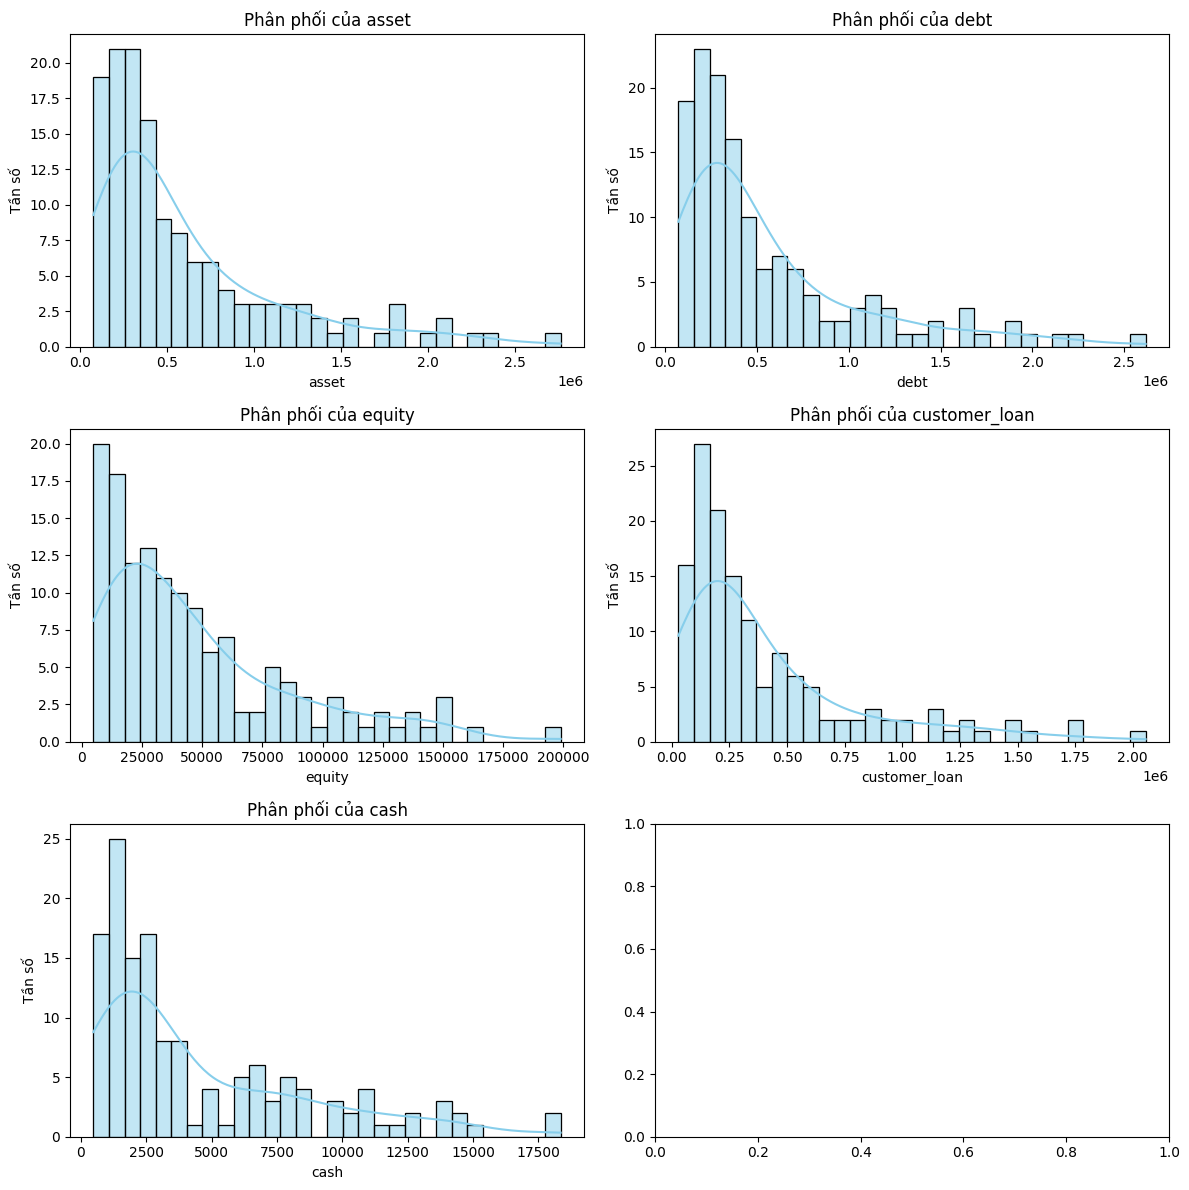

In [15]:
# Bước 5: Biểu đồ phân phối các cột số bằng subplots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ['asset', 'debt', 'equity', 'customer_loan', 'cash']
n_cols = 2
n_rows = int(np.ceil(len(cols_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    if col in df1.columns:
        sns.histplot(df1[col].dropna(), kde=True, bins=30, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Phân phối của {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Tần số')
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_15420\4136677720.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='company', y=col, ax=axes[i], palette='Set2')
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_15420\4136677720.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='company', y=col, ax=axes[i], palette='Set2')
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_15420\4136677720.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='company', y=col, ax=axes[i], palette='Set2')
C:\Users\Hưng Tăng\App

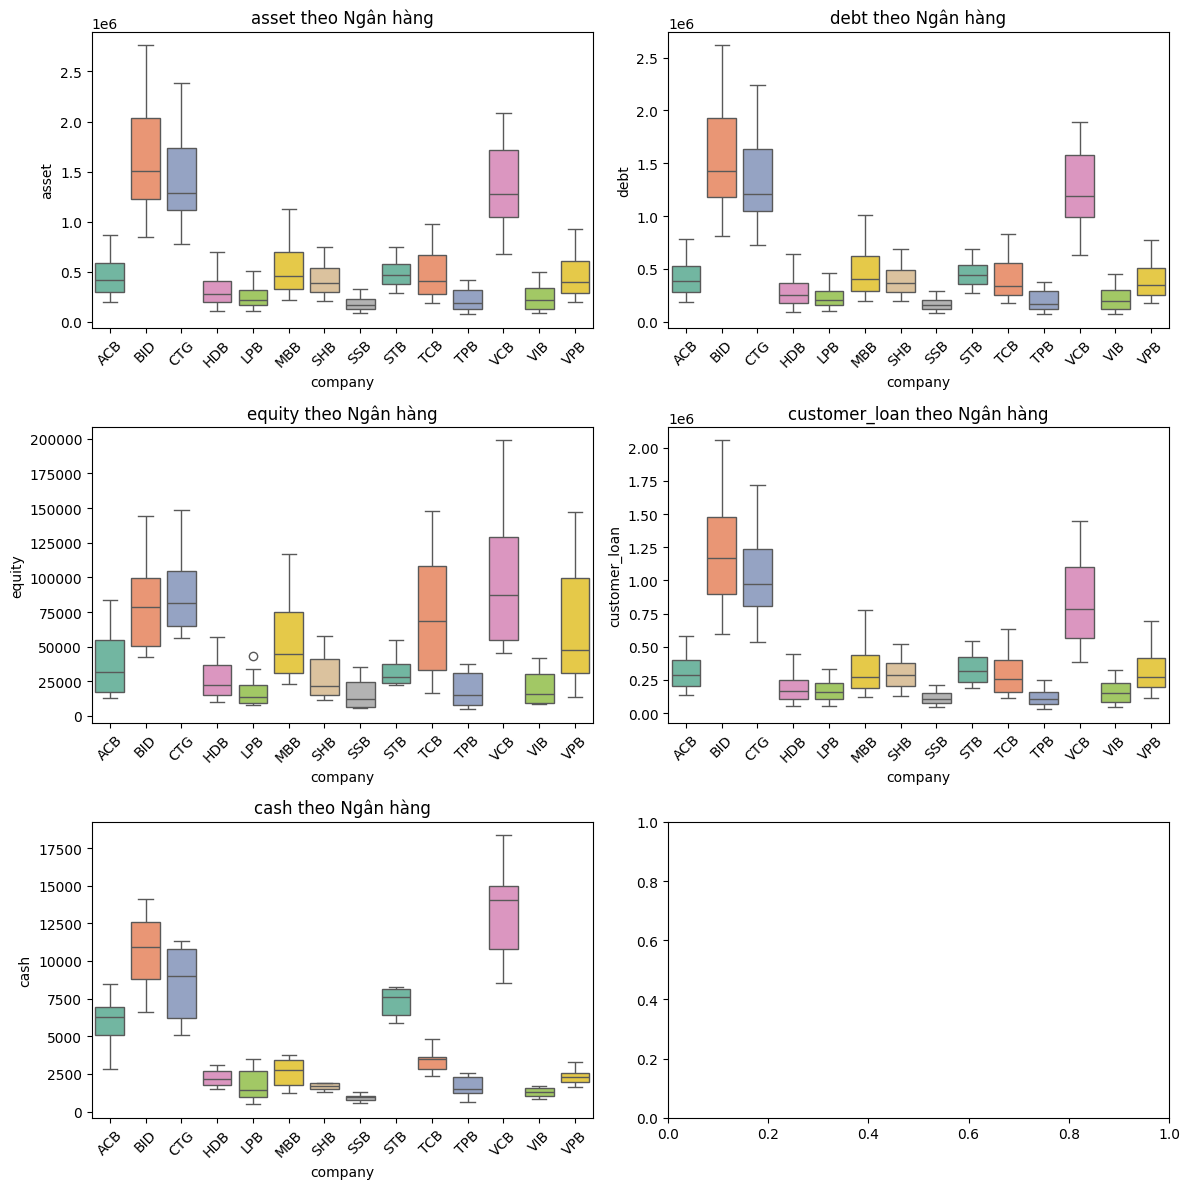

In [16]:
# Bước 6: Boxplot theo công ty bằng subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    if col in df1.columns:
        sns.boxplot(data=df1, x='company', y=col, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{col} theo Ngân hàng')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


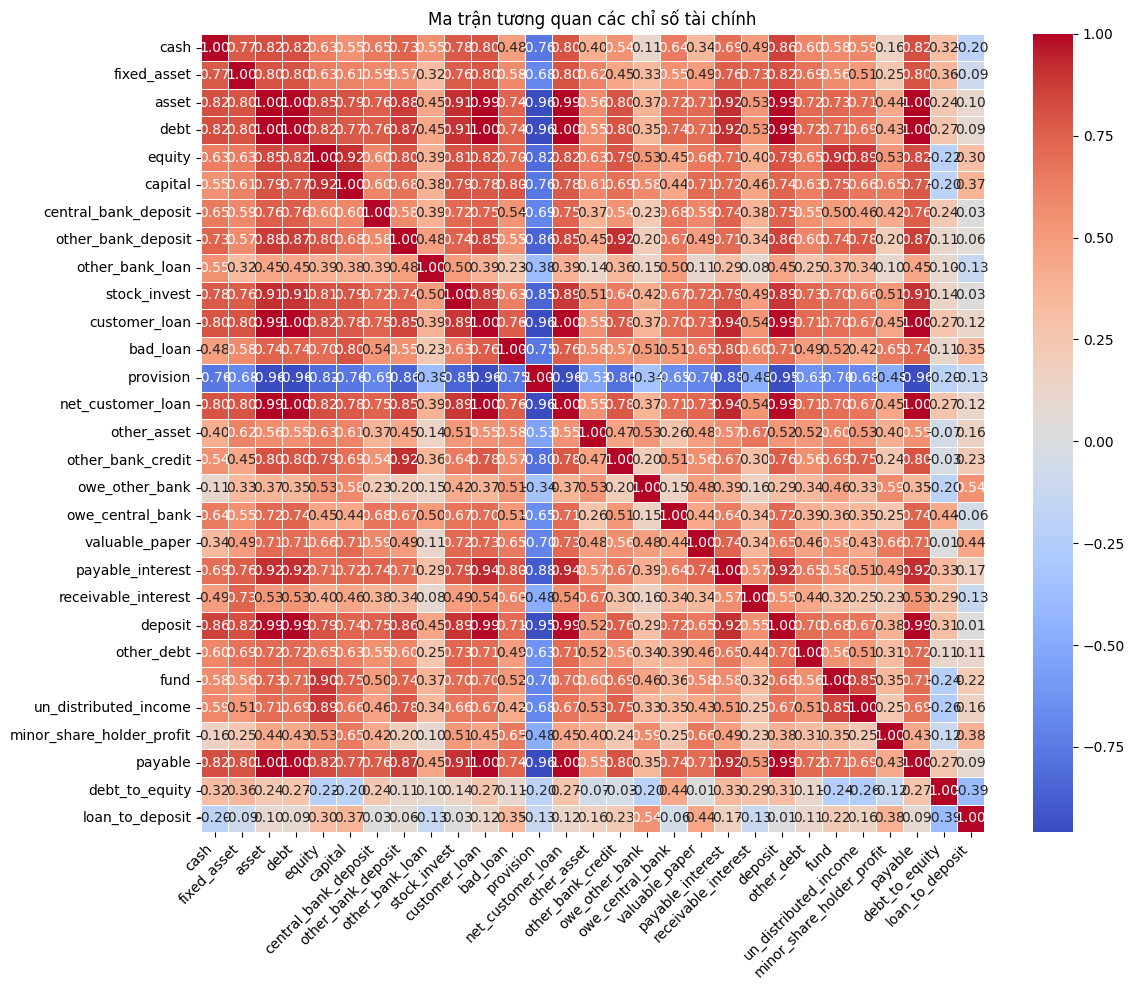

In [20]:
# Bước 7 (đã cập nhật): Ma trận tương quan và Heatmap với trục x nghiêng 45 độ
numeric_df = df1.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Xoay nhãn trục x 45 độ
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title("Ma trận tương quan các chỉ số tài chính")
plt.tight_layout()
plt.show()


In [19]:
# Bước 9: Tính các chỉ số tài chính
if ('debt' in df1.columns) and ('equity' in df1.columns):
    df1['debt_to_equity'] = df1['debt'] / df1['equity']
    print("Tỷ lệ Debt-to-Equity (mẫu):")
    print(df1[['company', 'debt_to_equity']].head())

if ('customer_loan' in df1.columns) and ('deposit' in df1.columns):
    df1['loan_to_deposit'] = df1['customer_loan'] / df1['deposit']
    print("\nTỷ lệ Loan-to-Deposit (mẫu):")
    print(df1[['company', 'loan_to_deposit']].head())


Tỷ lệ Debt-to-Equity (mẫu):
    company  debt_to_equity
69      SHB       17.182981
129     VIB        8.790849
119     VCB       13.929470
109     TPB       14.882684
99      TCB       10.665694

Tỷ lệ Loan-to-Deposit (mẫu):
    company  loan_to_deposit
69      SHB         0.883074
129     VIB         0.896312
119     VCB         0.773646
109     TPB         0.714846
99      TCB         0.788667



===== Phân tích cho SHB =====


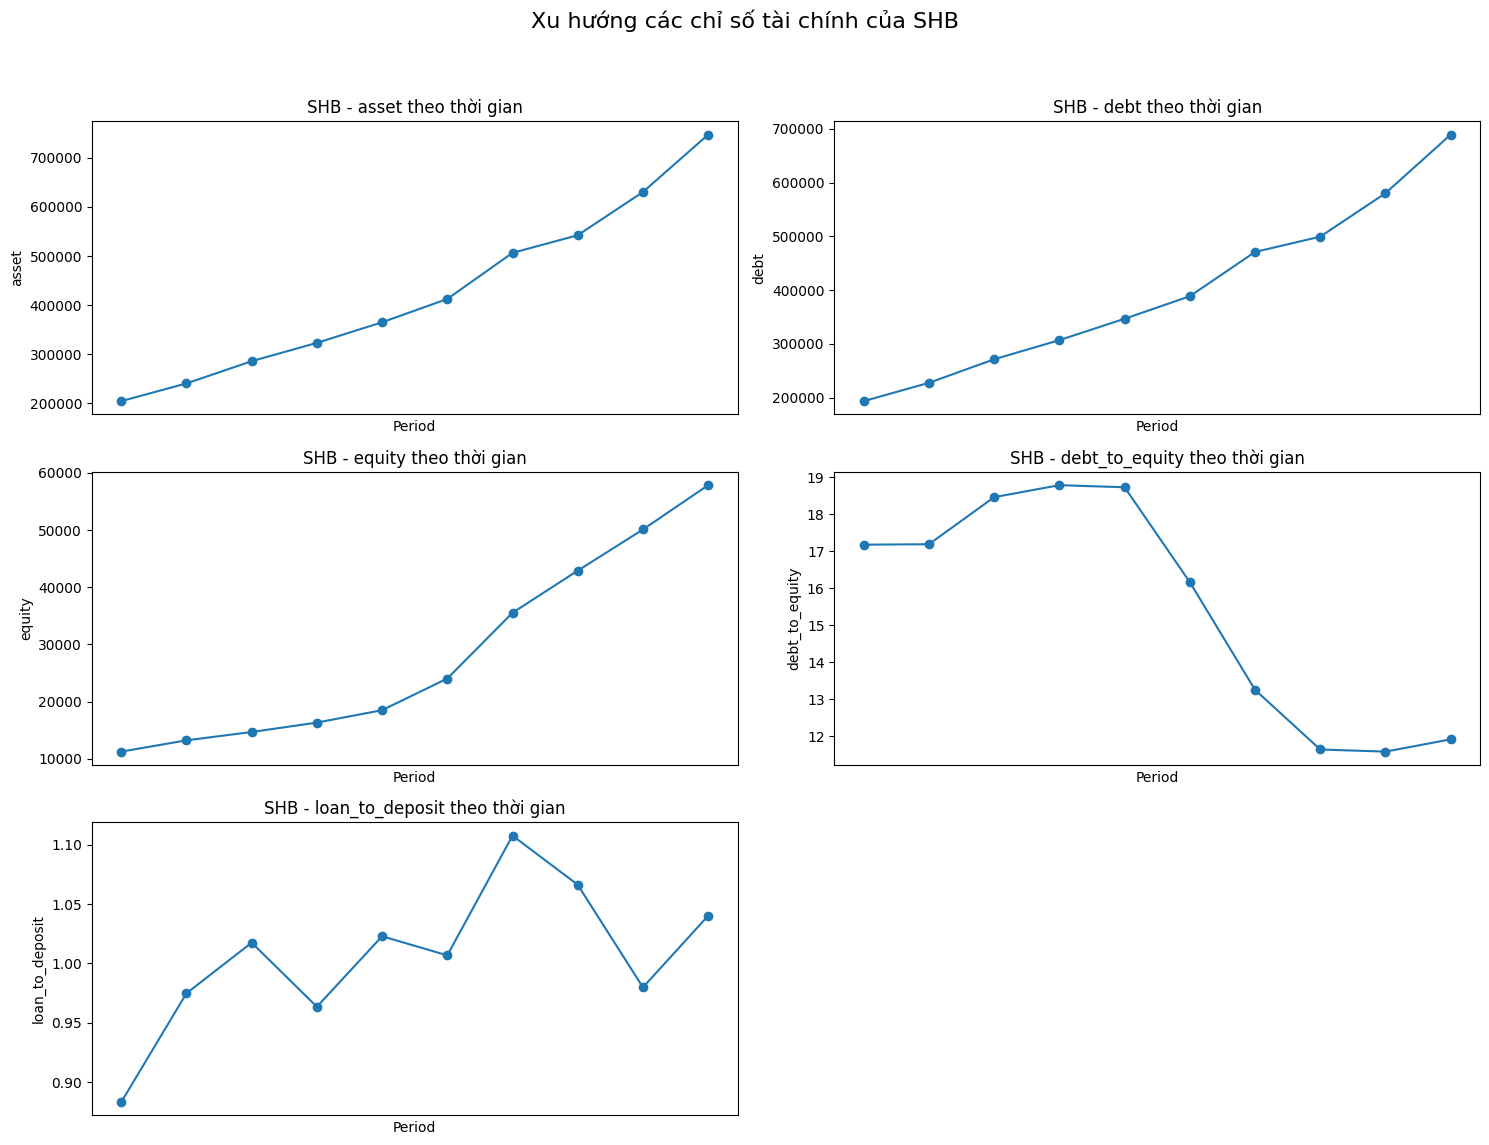

===== Kết thúc phân tích cho SHB =====


===== Phân tích cho VIB =====


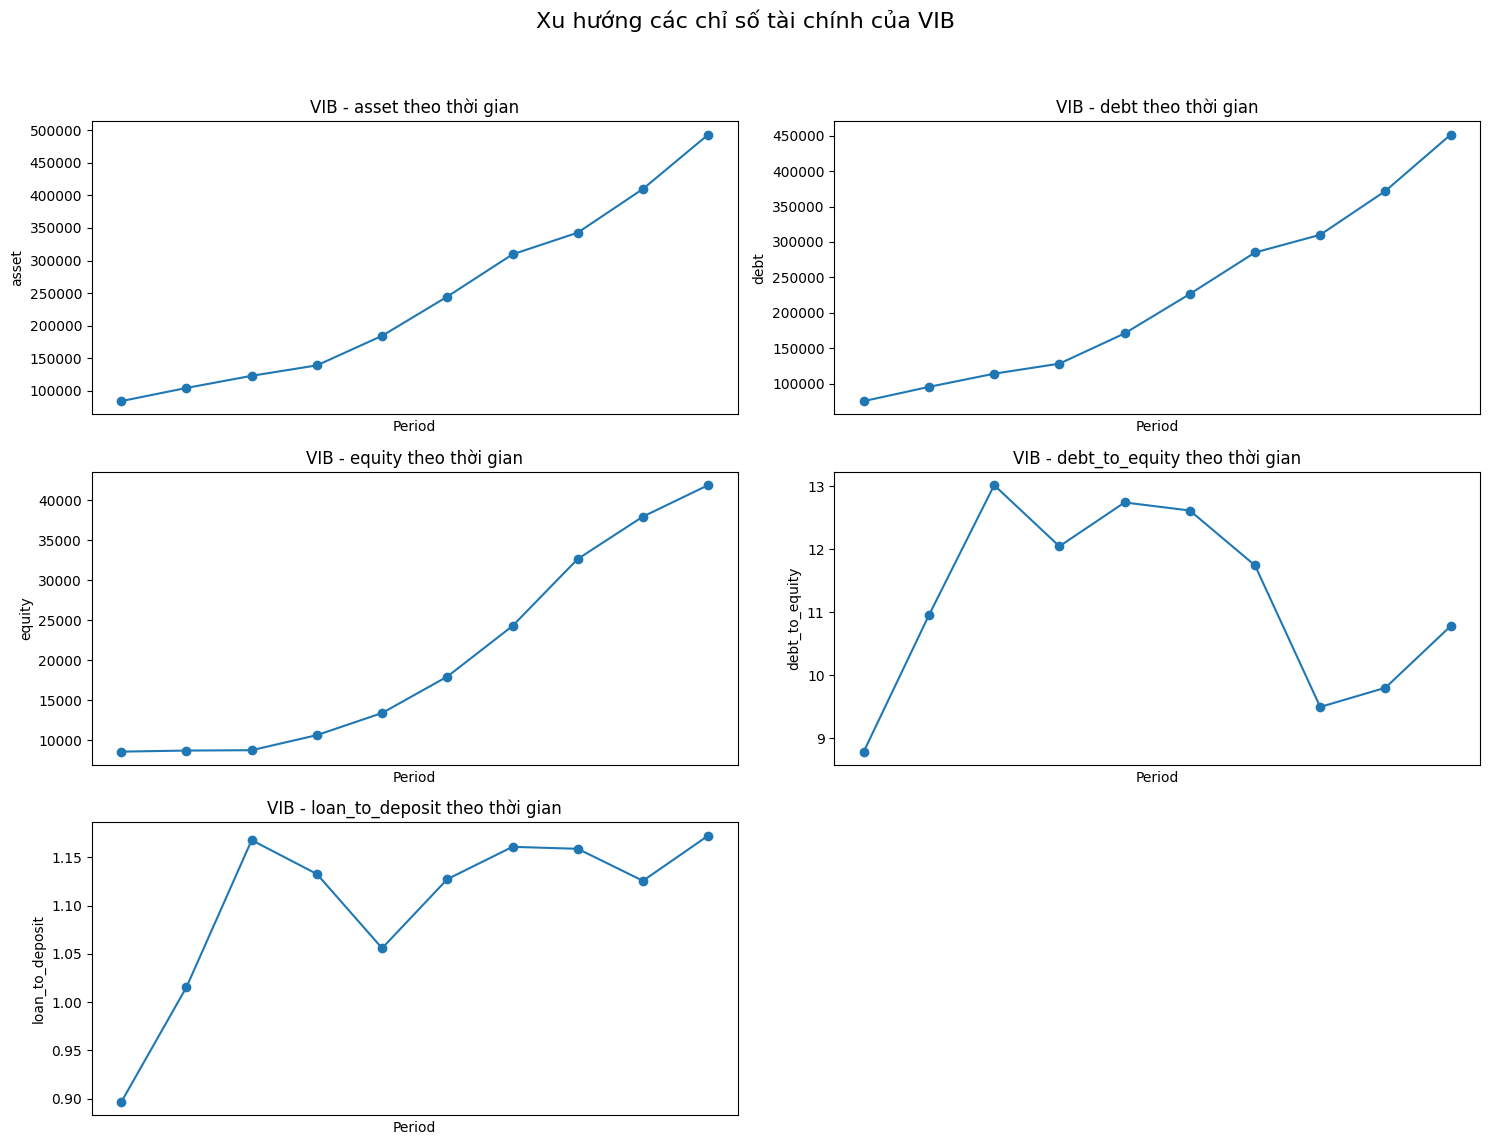

===== Kết thúc phân tích cho VIB =====


===== Phân tích cho VCB =====


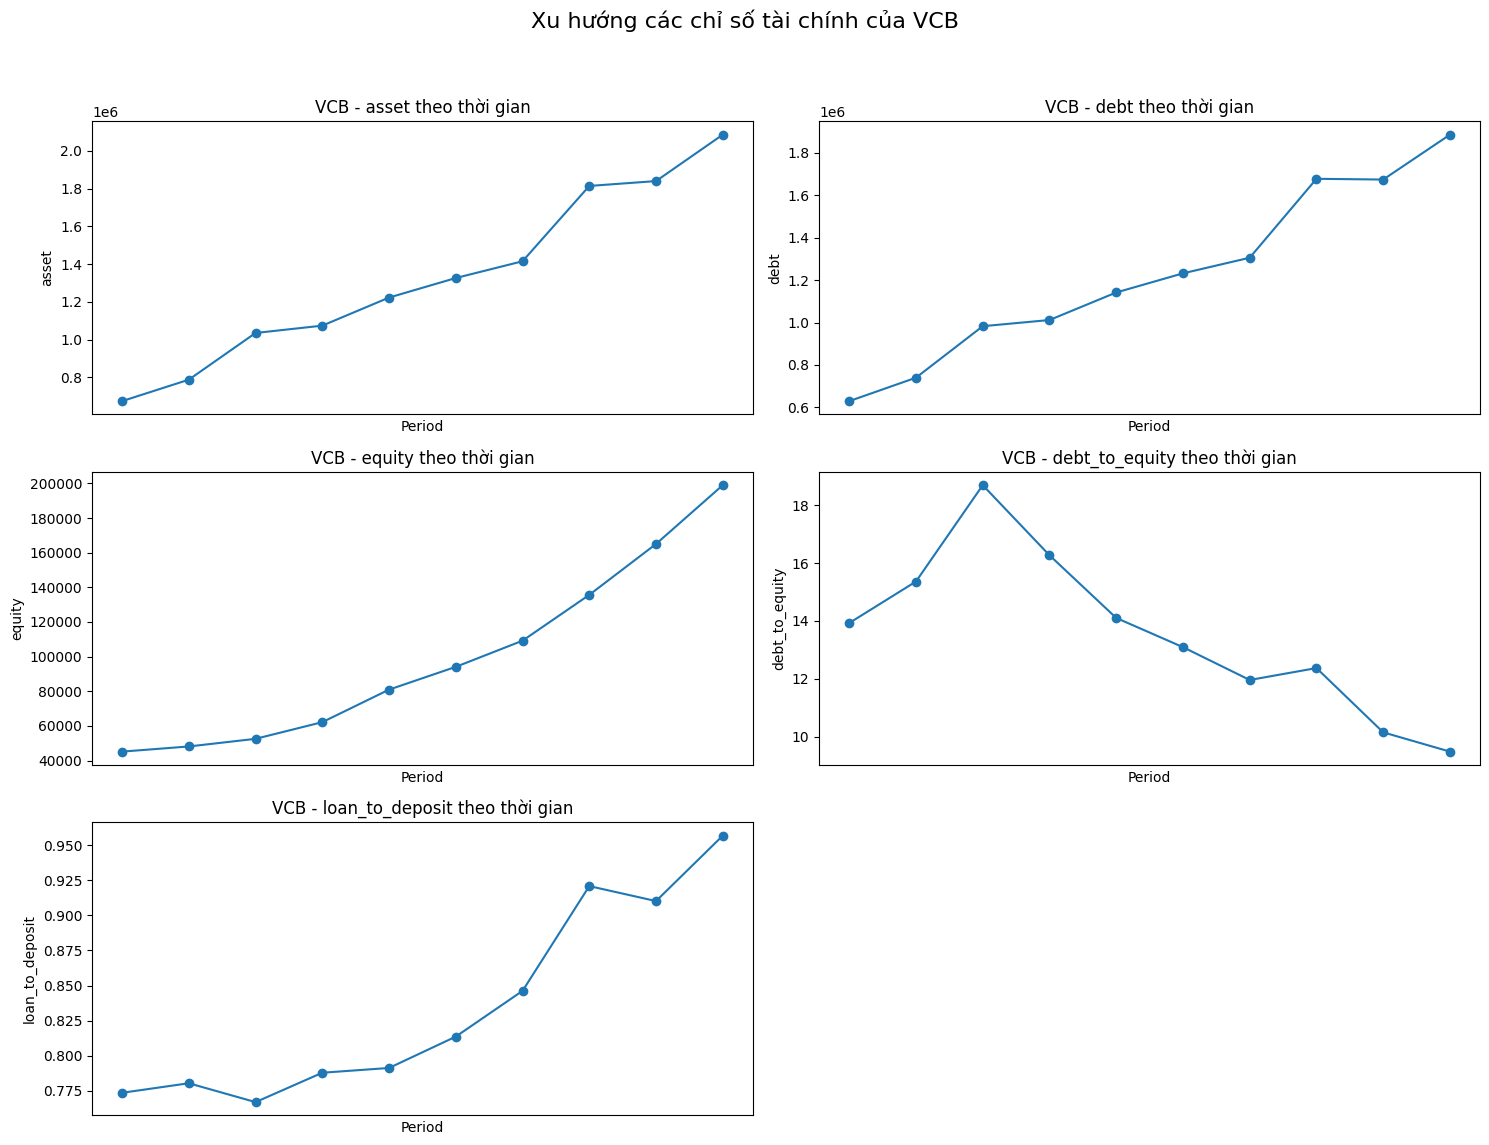

===== Kết thúc phân tích cho VCB =====


===== Phân tích cho TPB =====


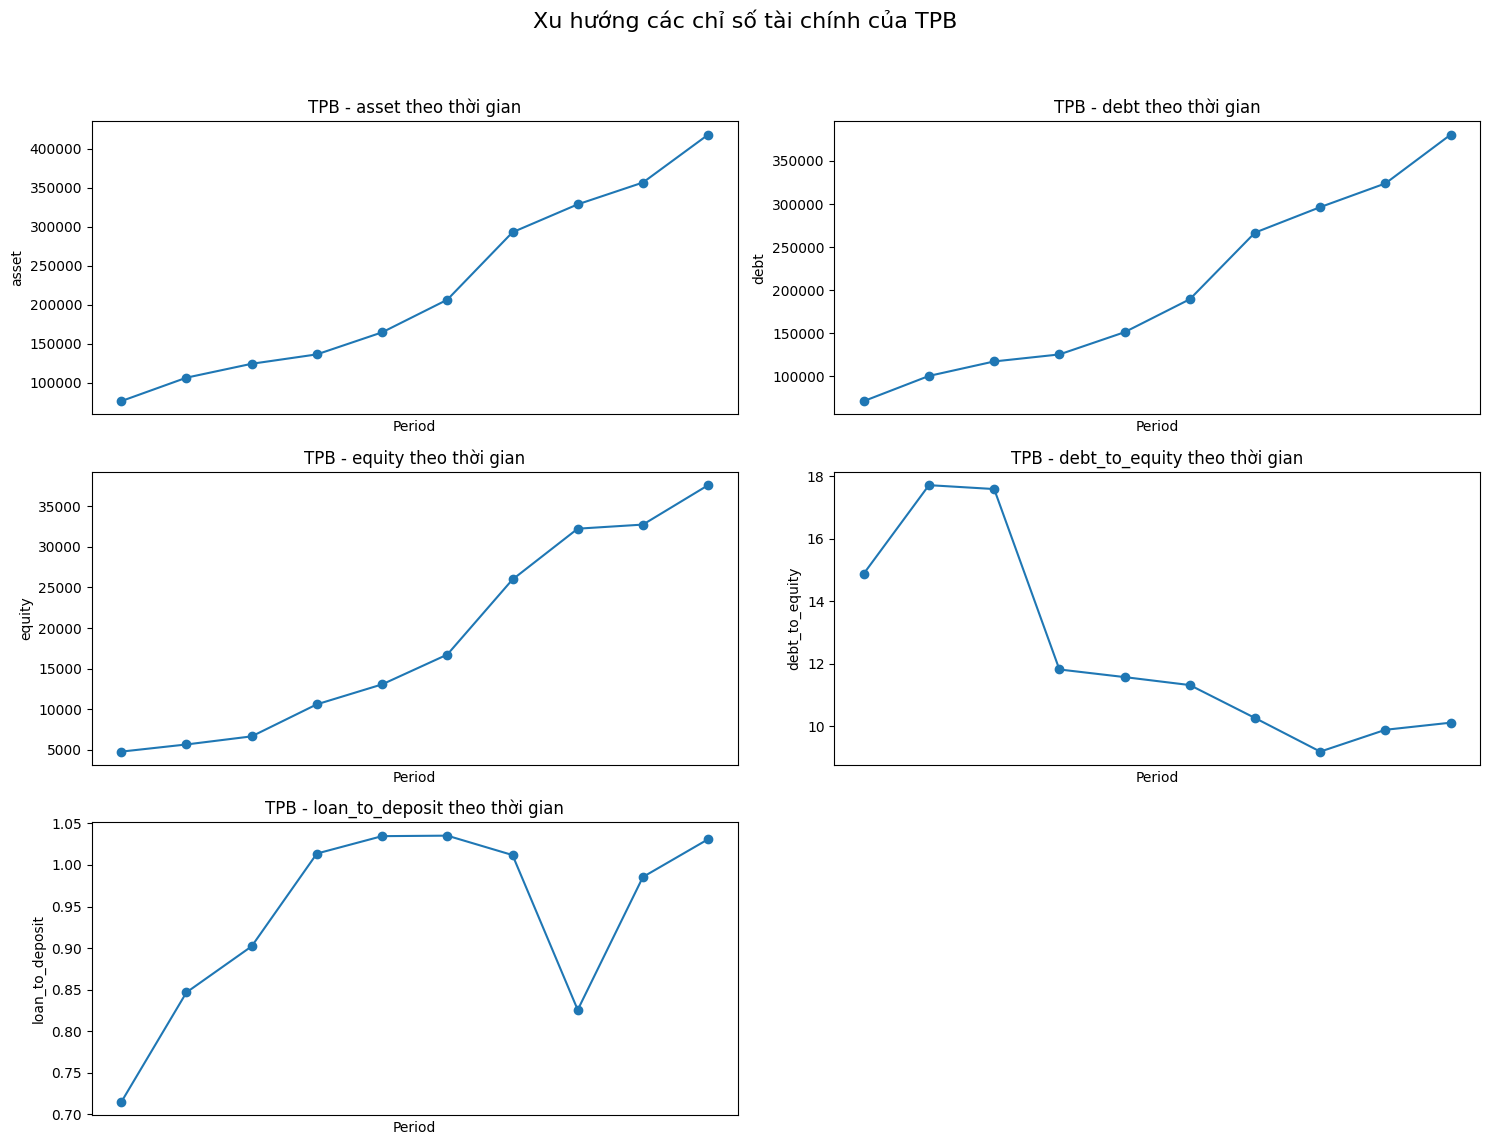

===== Kết thúc phân tích cho TPB =====


===== Phân tích cho TCB =====


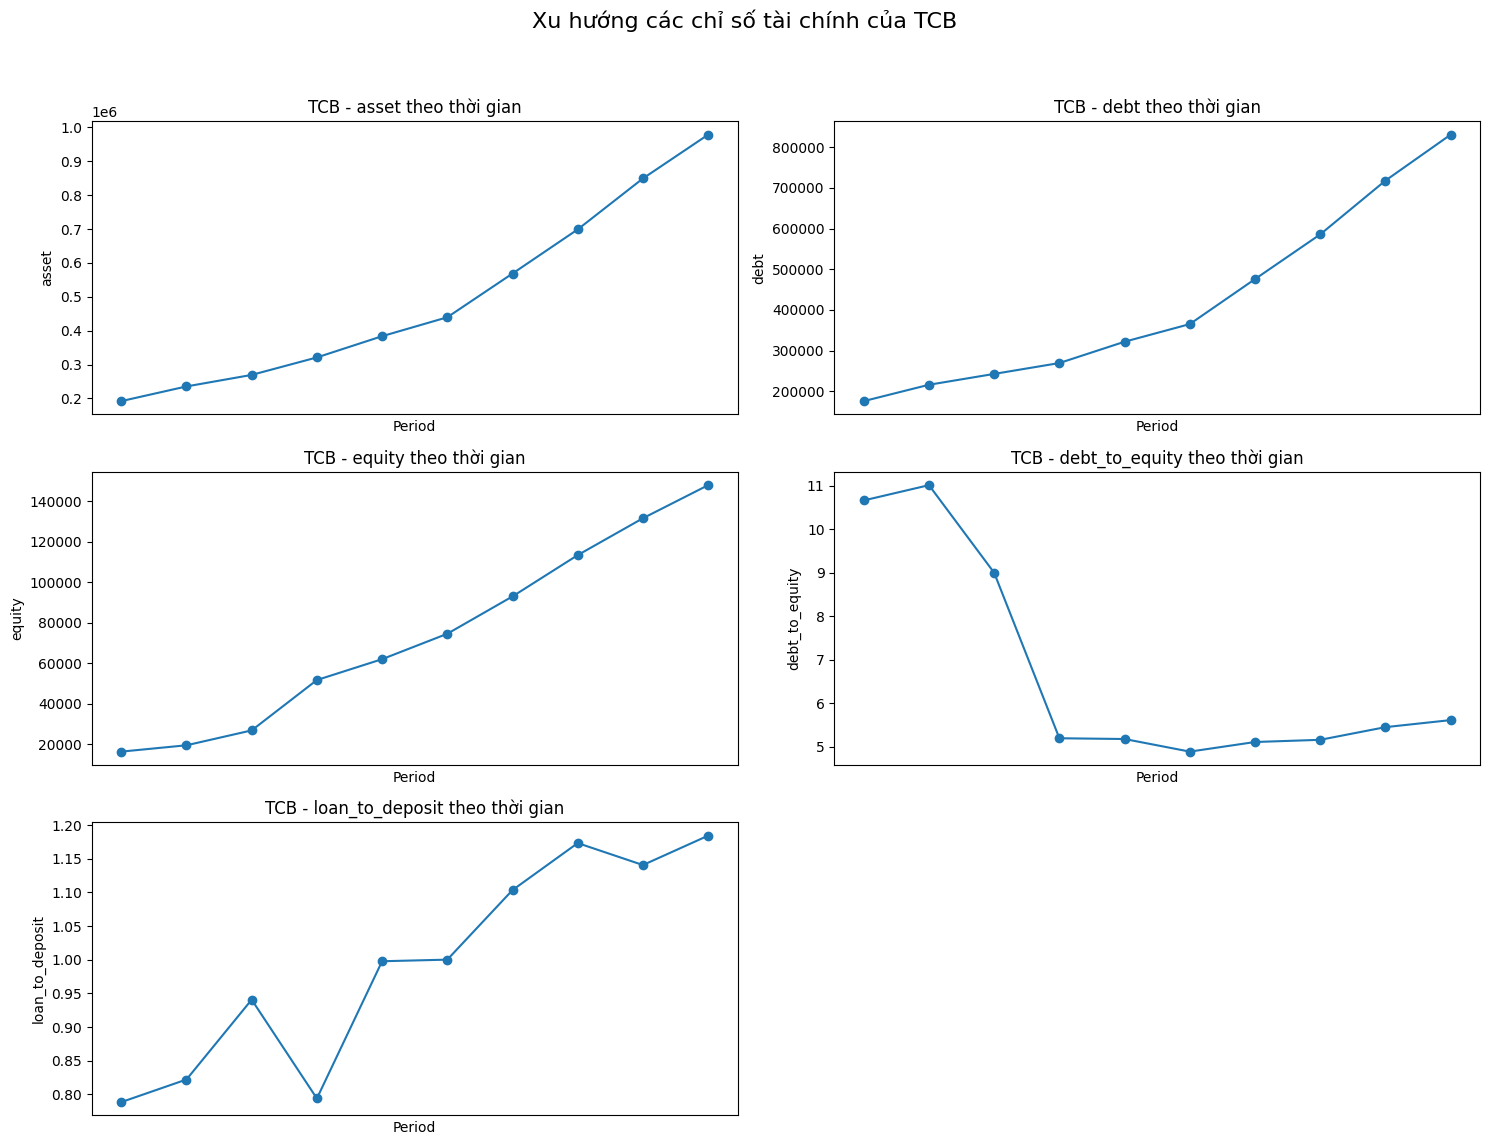

===== Kết thúc phân tích cho TCB =====


===== Phân tích cho STB =====


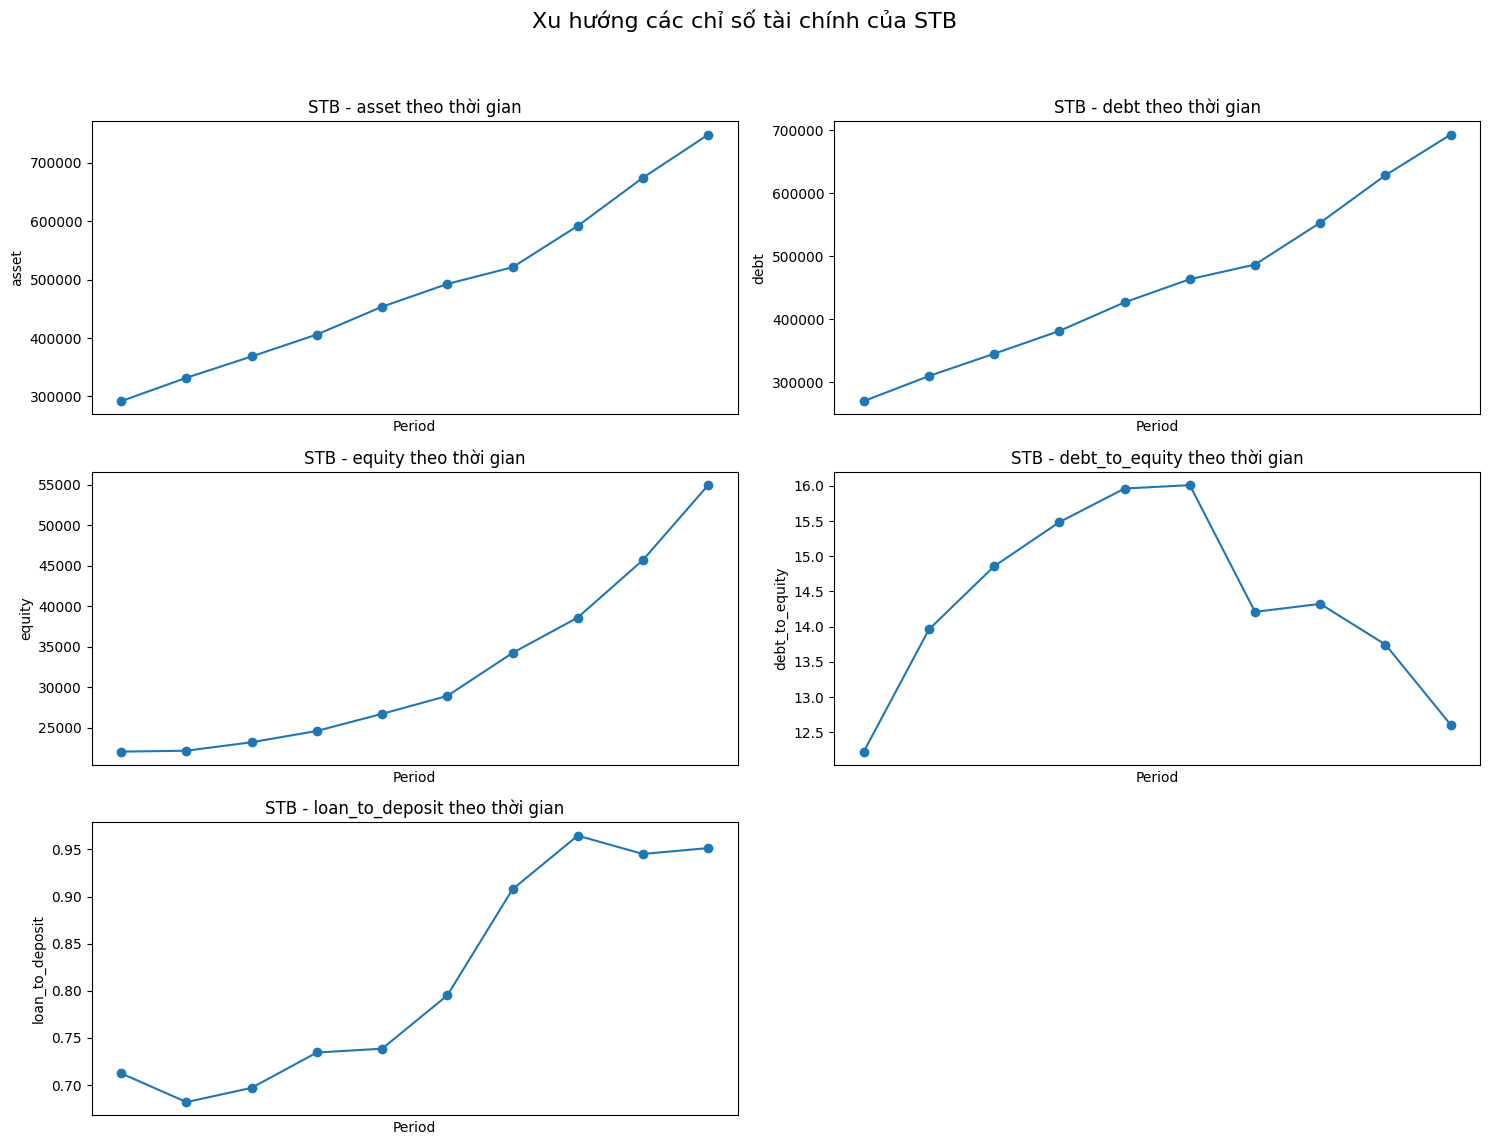

===== Kết thúc phân tích cho STB =====


===== Phân tích cho SSB =====


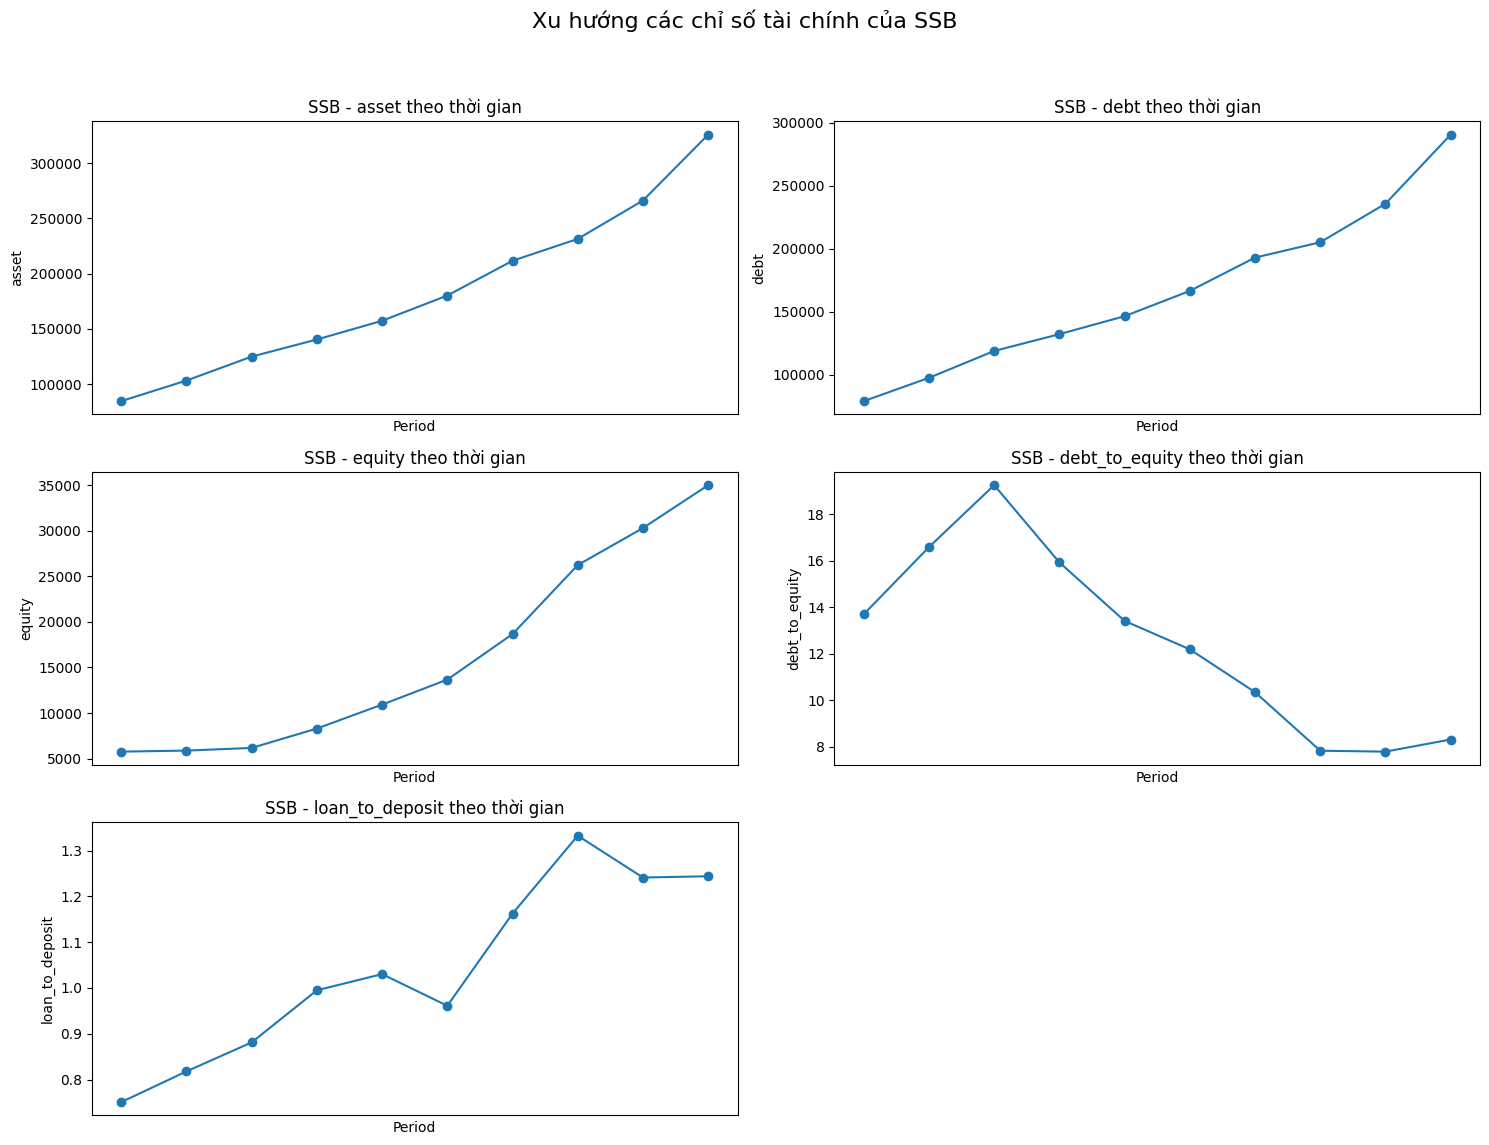

===== Kết thúc phân tích cho SSB =====


===== Phân tích cho MBB =====


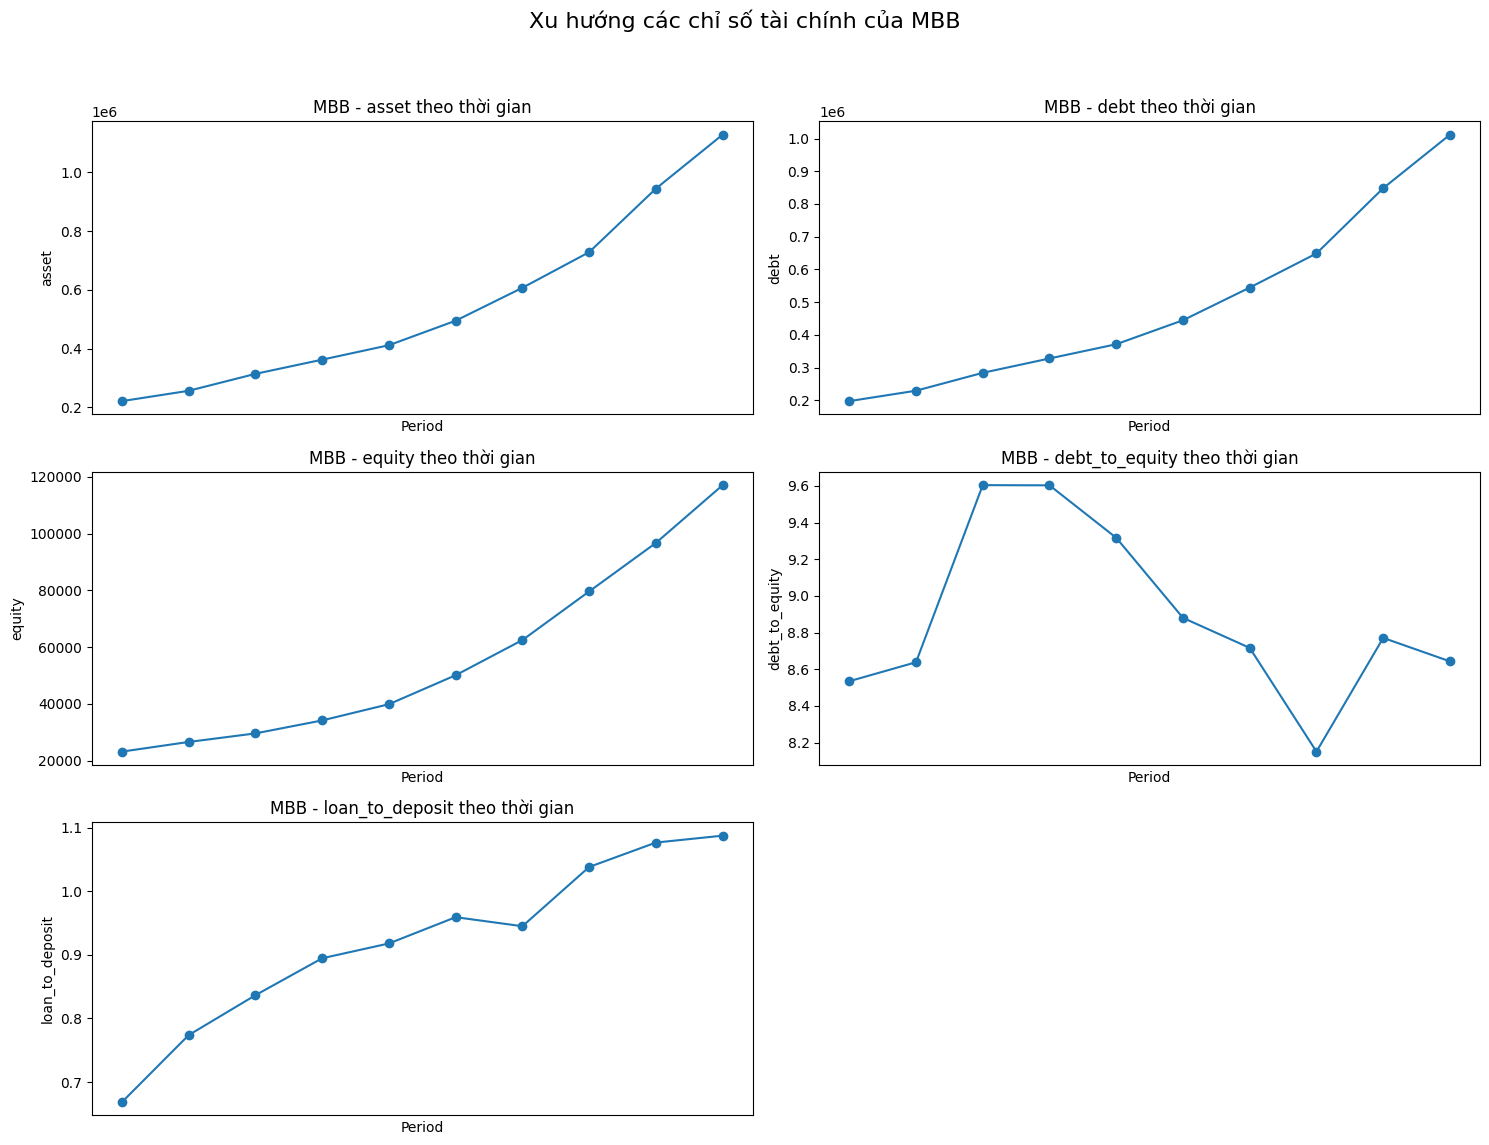

===== Kết thúc phân tích cho MBB =====


===== Phân tích cho LPB =====


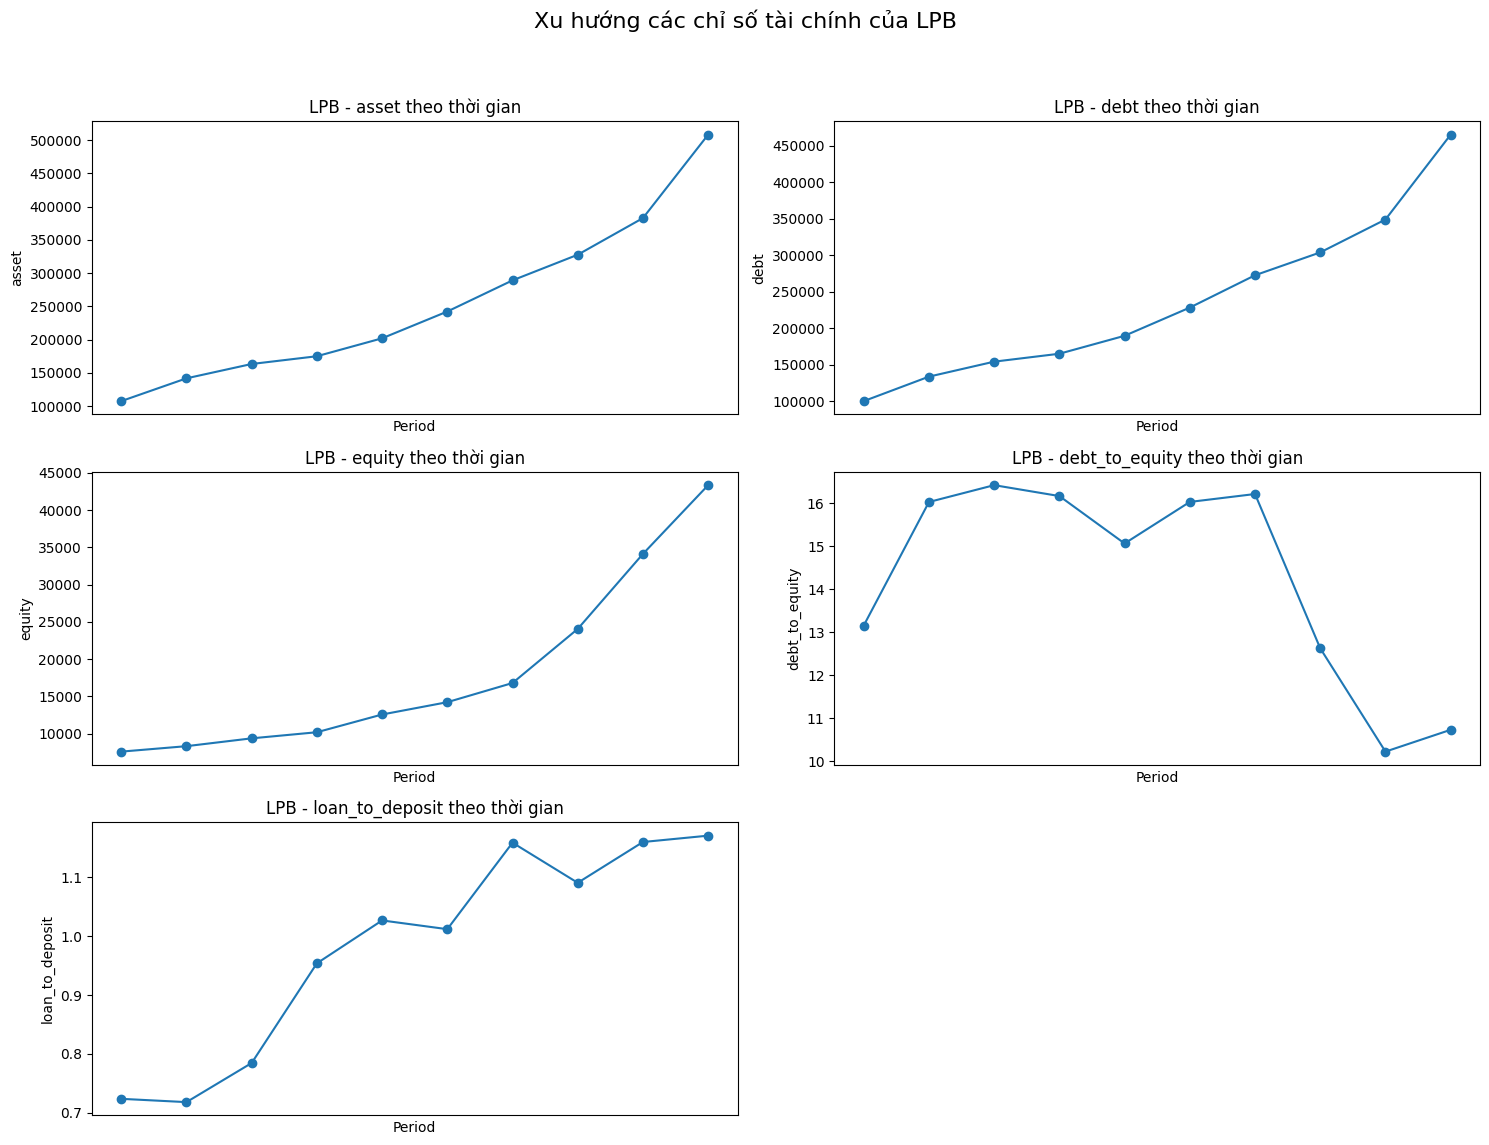

===== Kết thúc phân tích cho LPB =====


===== Phân tích cho HDB =====


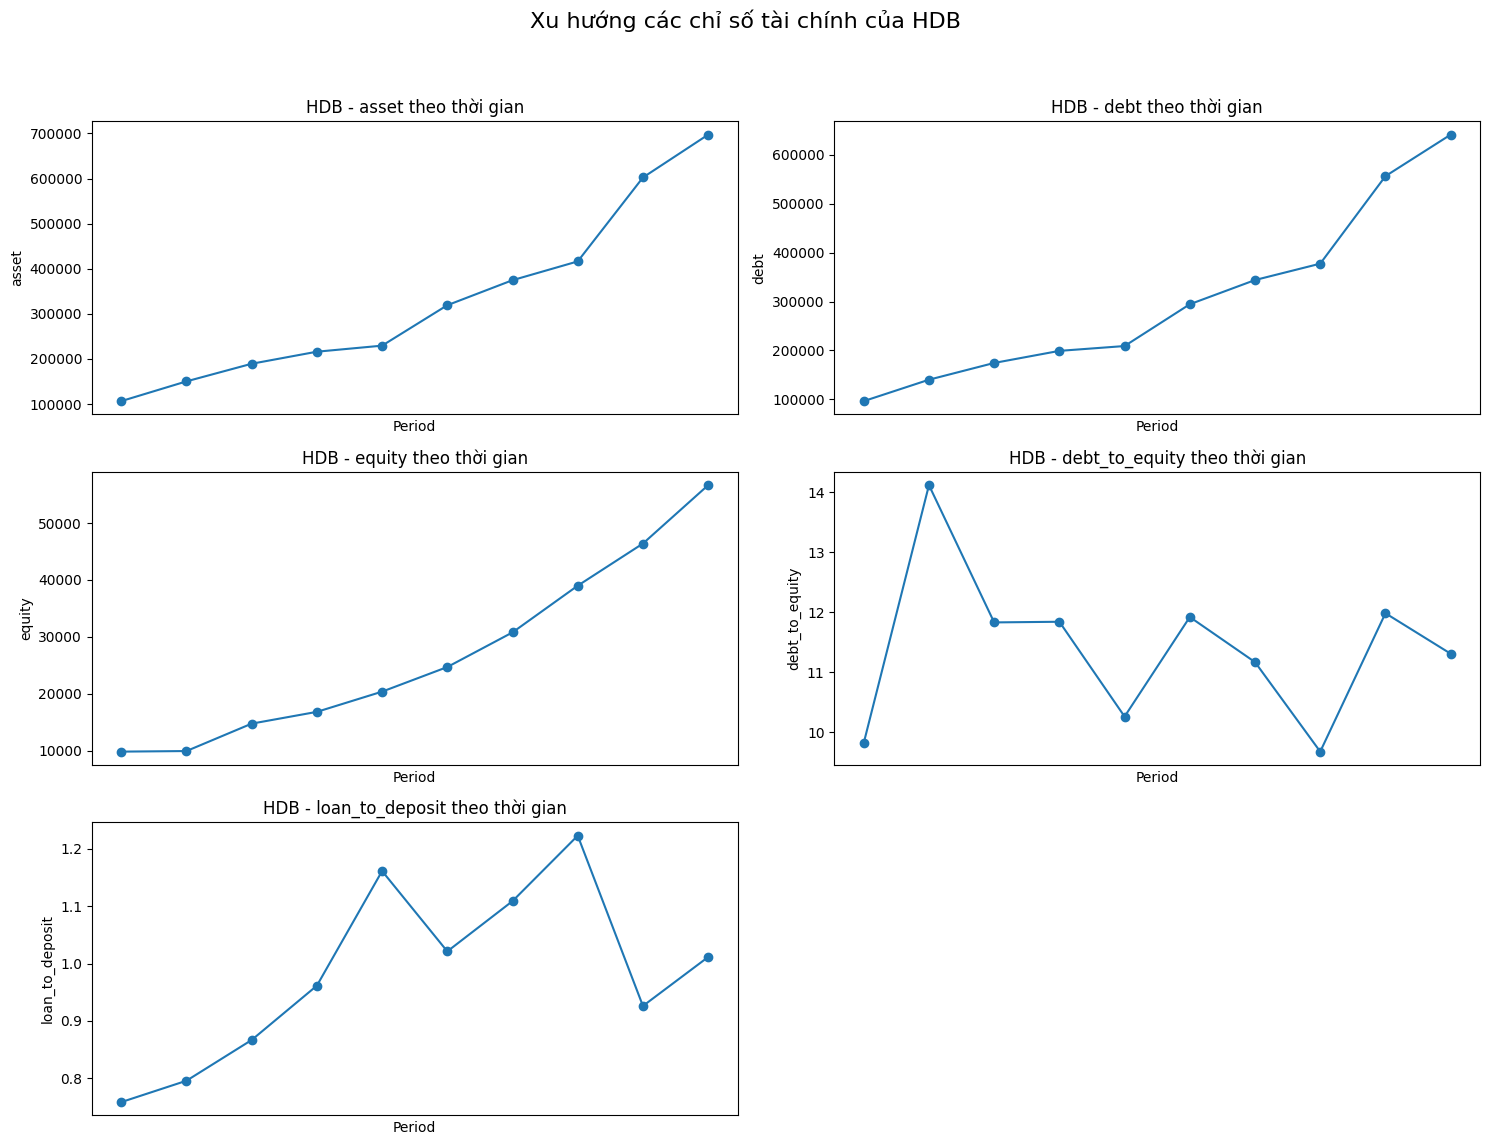

===== Kết thúc phân tích cho HDB =====


===== Phân tích cho CTG =====


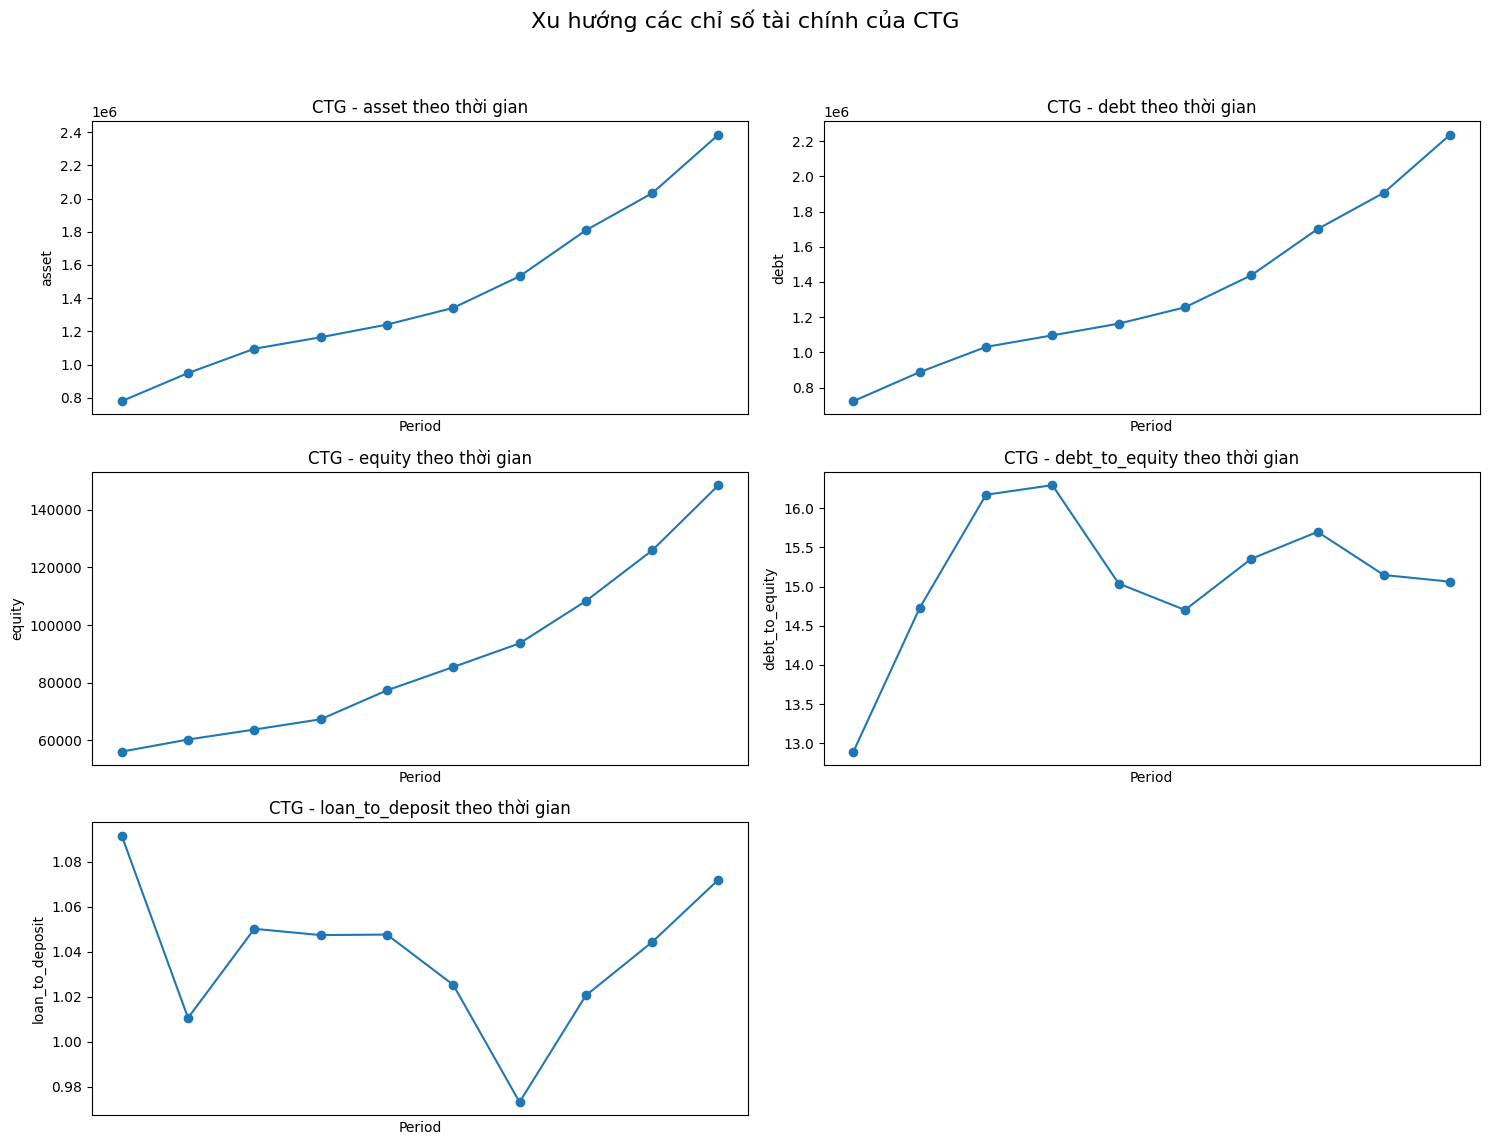

===== Kết thúc phân tích cho CTG =====


===== Phân tích cho BID =====


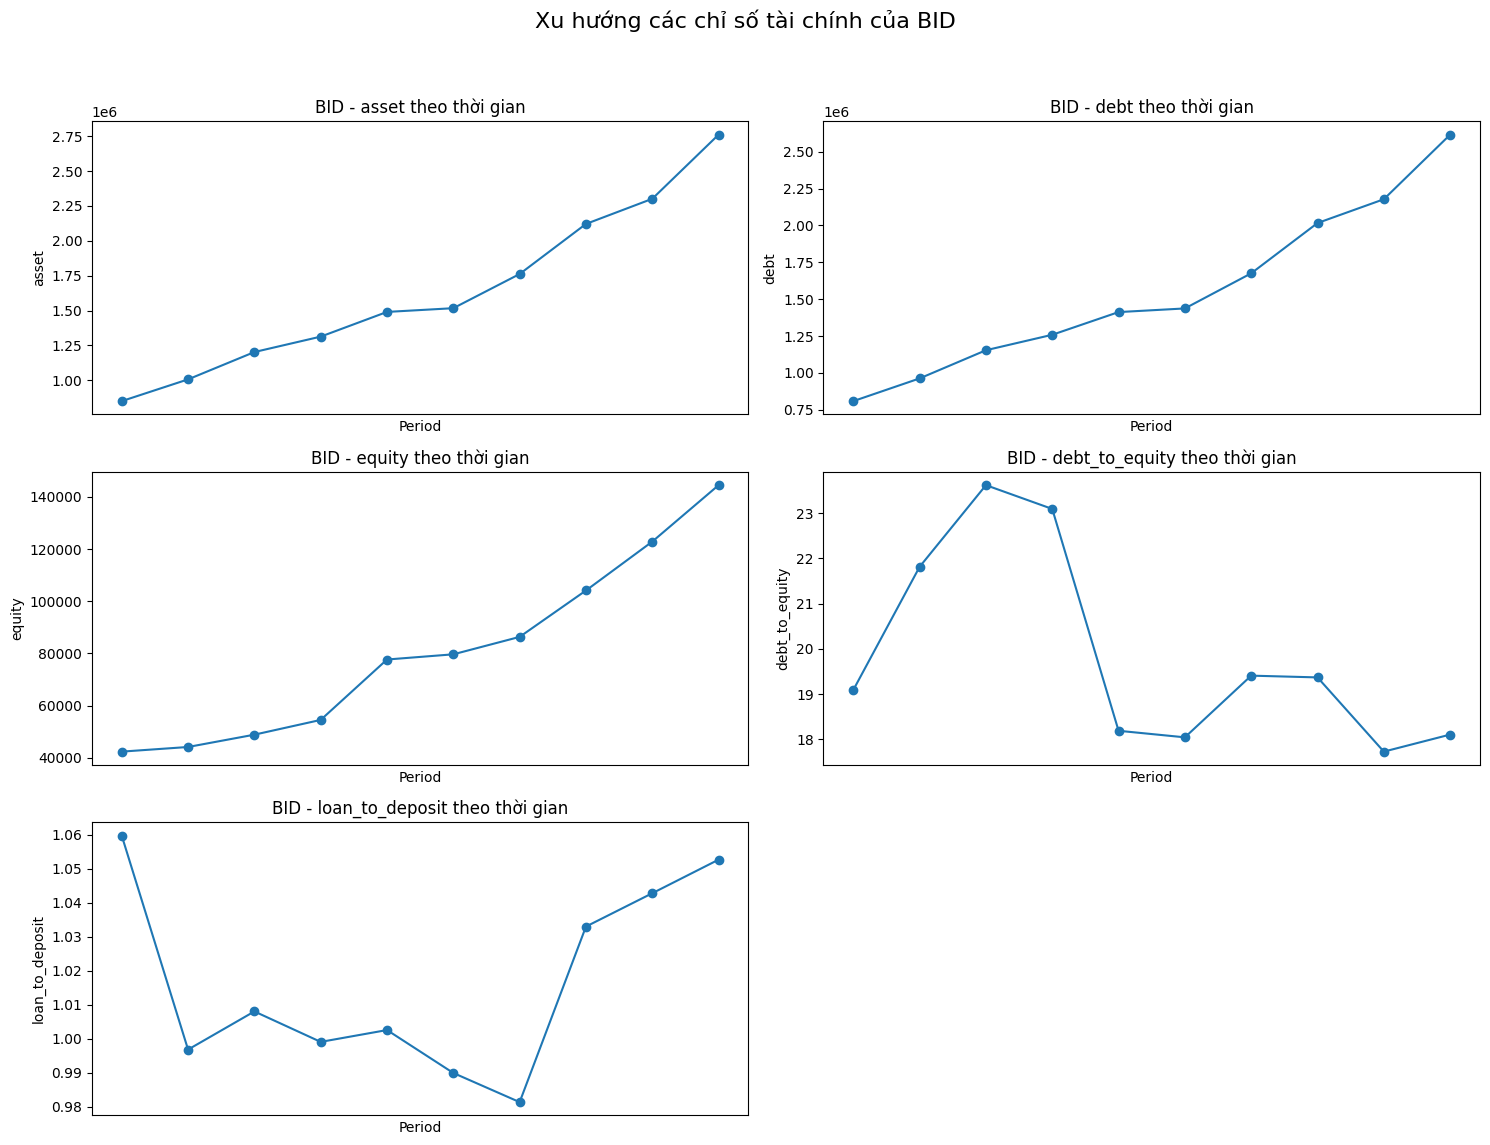

===== Kết thúc phân tích cho BID =====


===== Phân tích cho VPB =====


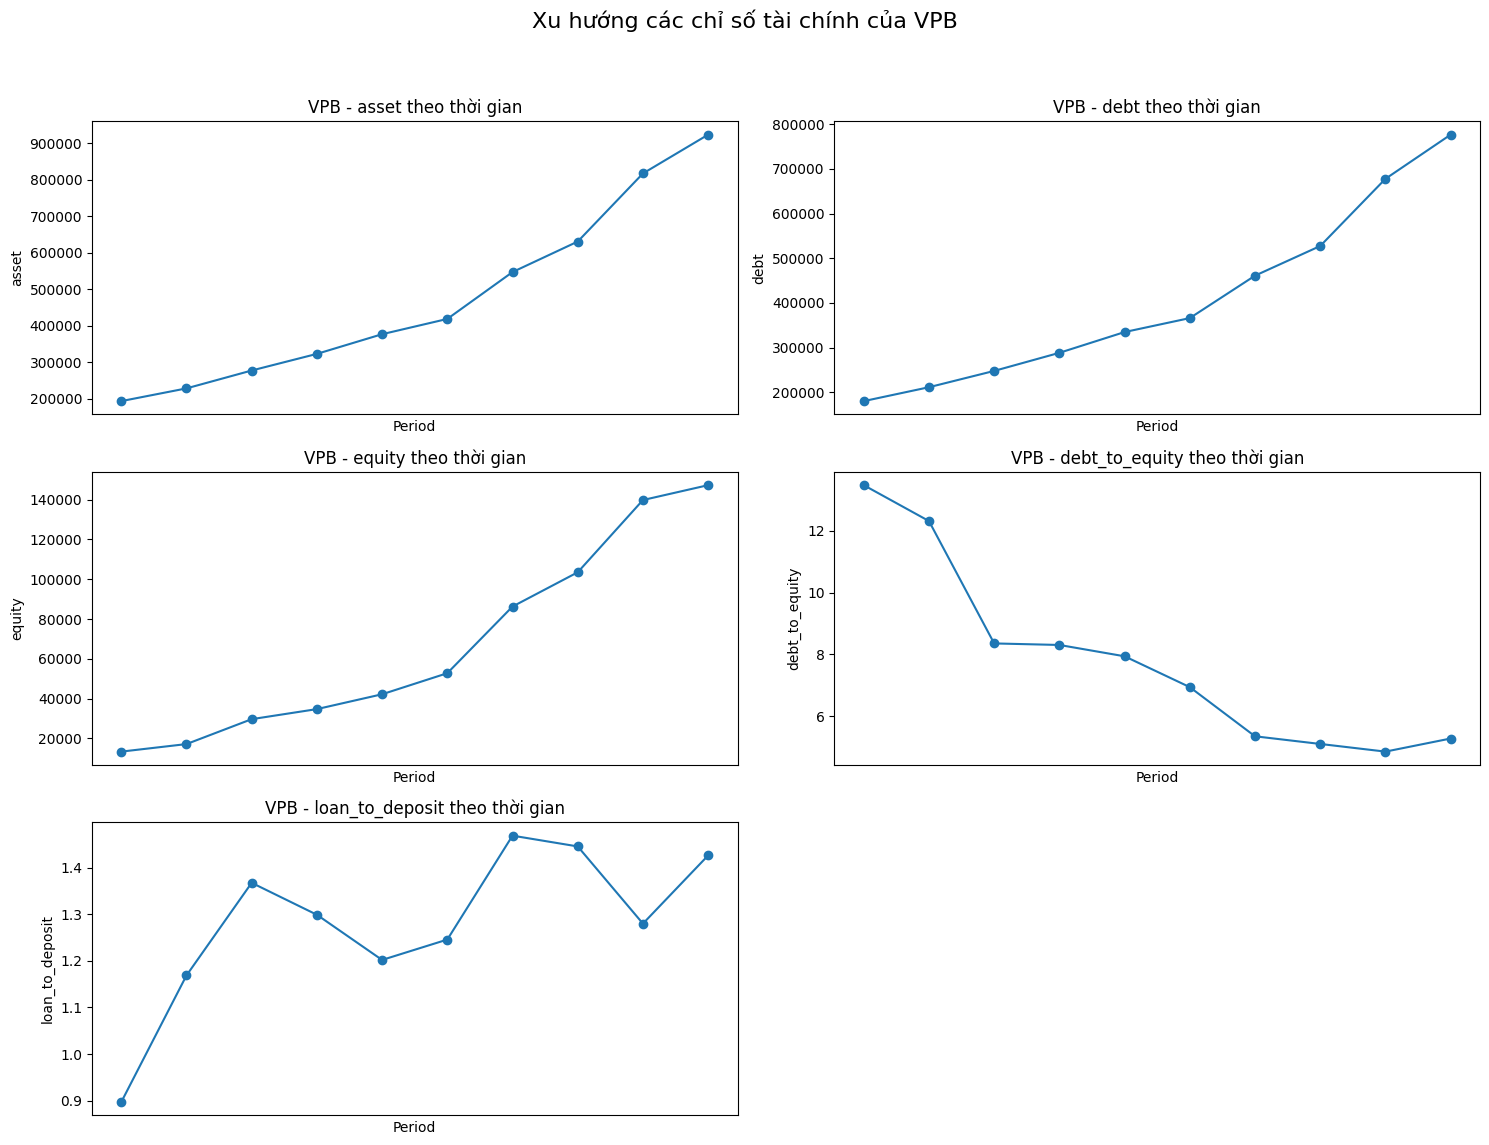

===== Kết thúc phân tích cho VPB =====


===== Phân tích cho ACB =====


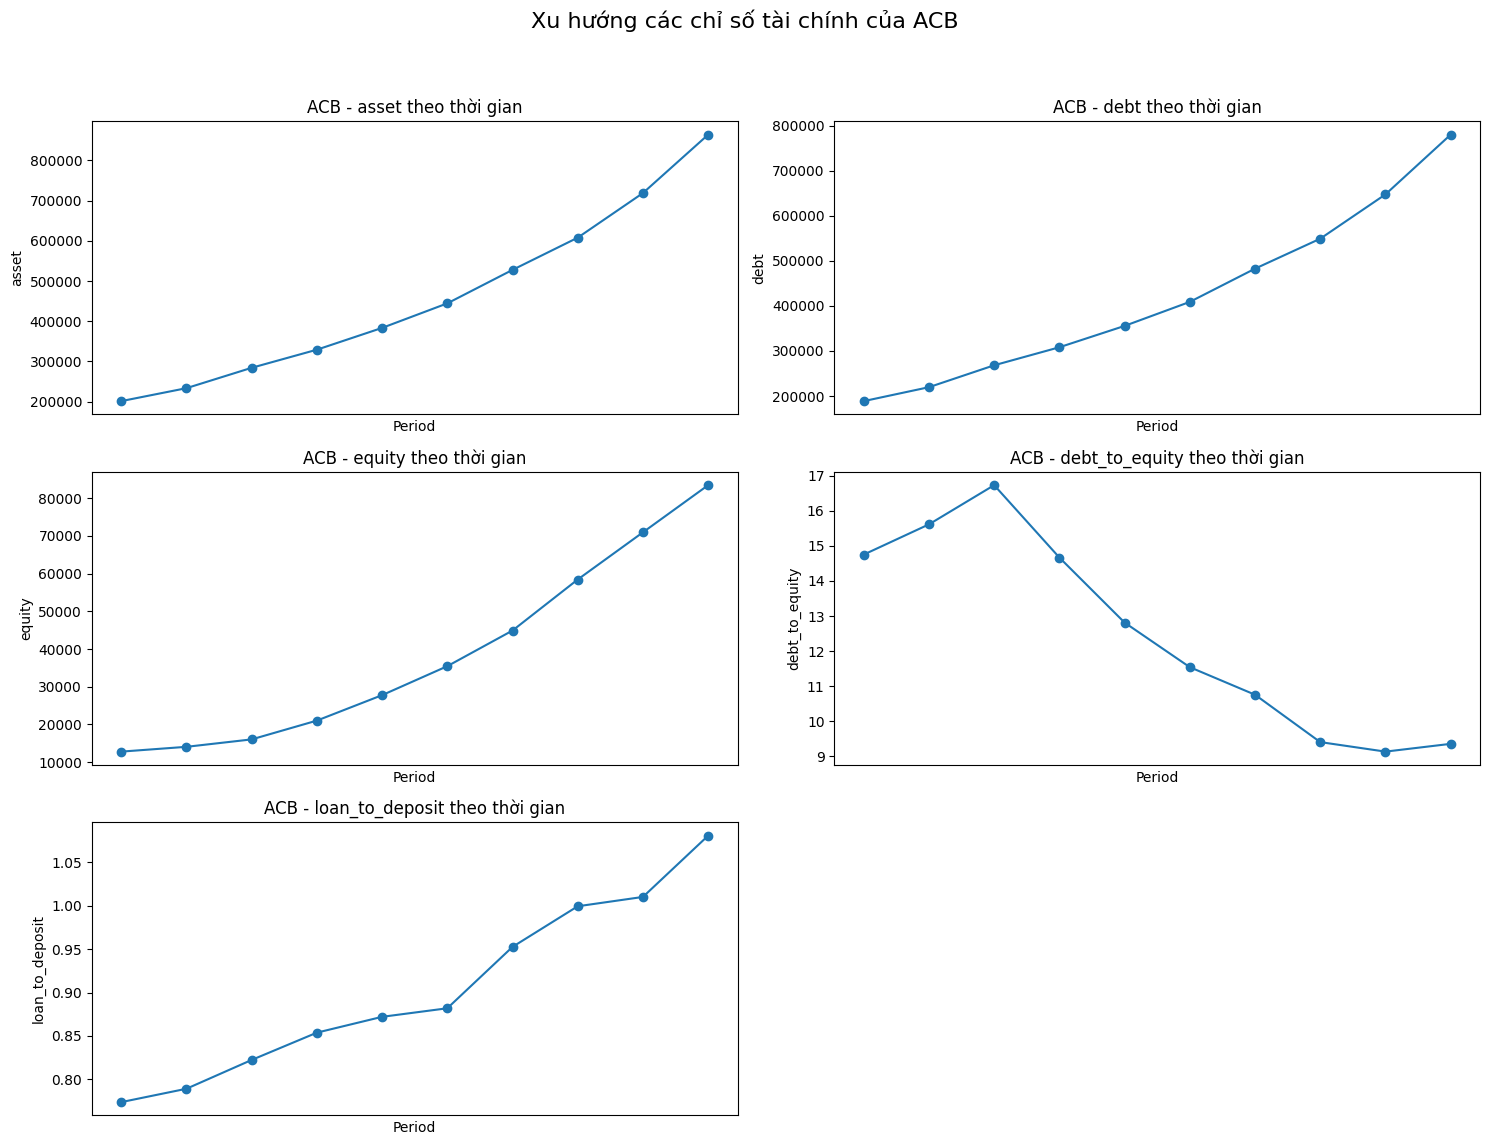

===== Kết thúc phân tích cho ACB =====



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Giả sử df1 đã được load và chứa cột 'company' và 'period'
# Nếu cột 'period' chưa là datetime, chuyển đổi nó:
if 'period' in df1.columns:
    try:
        df1['period'] = pd.to_datetime(df1['period'])
    except Exception as e:
        print("Lỗi chuyển đổi 'period' sang datetime:", e)

# Tính các chỉ số tài chính bổ sung
if ('debt' in df1.columns) and ('equity' in df1.columns):
    df1['debt_to_equity'] = df1['debt'] / df1['equity']

if ('customer_loan' in df1.columns) and ('deposit' in df1.columns):
    df1['loan_to_deposit'] = df1['customer_loan'] / df1['deposit']

# Lấy danh sách các công ty
companies = df1['company'].unique()

# Duyệt qua từng công ty để phân tích
for company in companies:
    print(f"\n===== Phân tích cho {company} =====")
    
    # Lọc dữ liệu của công ty
    df_comp = df1[df1['company'] == company].copy()
    
    # Sắp xếp theo thời gian nếu có cột 'period'
    if 'period' in df_comp.columns:
        df_comp.sort_values('period', inplace=True)
    
    # 2. Vẽ biểu đồ xu hướng theo thời gian cho các chỉ số chính
    # Chọn các cột quan trọng để vẽ (nếu có trong dữ liệu)
    cols_to_plot = []
    if 'asset' in df_comp.columns: cols_to_plot.append('asset')
    if 'debt' in df_comp.columns: cols_to_plot.append('debt')
    if 'equity' in df_comp.columns: cols_to_plot.append('equity')
    if 'debt_to_equity' in df_comp.columns: cols_to_plot.append('debt_to_equity')
    if 'loan_to_deposit' in df_comp.columns: cols_to_plot.append('loan_to_deposit')
    
    if 'period' in df_comp.columns and len(cols_to_plot) > 0:
        n_cols = 2
        n_rows = int(np.ceil(len(cols_to_plot) / n_cols))
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows), sharex=True)
        axes = axes.flatten()
        
        for i, col in enumerate(cols_to_plot):
            axes[i].plot(df_comp['period'], df_comp[col], marker='o')
            axes[i].set_title(f"{company} - {col} theo thời gian")
            axes[i].set_xlabel("Period")
            axes[i].set_ylabel(col)
            axes[i].tick_params(axis='x', rotation=45)
        
        # Ẩn các subplot trống nếu có
        for j in range(i+1, len(axes)):
            axes[j].set_visible(False)
        
        plt.suptitle(f"Xu hướng các chỉ số tài chính của {company}", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print("Không có dữ liệu thời gian hoặc các chỉ số cần vẽ biểu đồ cho công ty này.")
    
    # 3. Phân tích sâu theo các chỉ số khác (nếu cần)
    # Bạn có thể thêm các phân tích khác như so sánh theo quý, xu hướng tăng giảm, ngoại lệ,...
    
    print(f"===== Kết thúc phân tích cho {company} =====\n")


In [28]:
import pandas as pd
import numpy as np

# Giả sử df1 đã có sẵn dữ liệu và cột 'period' có định dạng datetime.
# Nếu 'period' chưa ở dạng datetime, chuyển đổi:
if 'period' in df1.columns:
    df1['period'] = pd.to_datetime(df1['period'], errors='coerce')

# Lấy bản ghi mới nhất cho mỗi công ty dựa theo 'period'
latest_df = df1.sort_values('period').groupby('company').last().reset_index()
print("Số lượng công ty được phân tích:", latest_df.shape[0])

# --- TÍNH CÁC CHỈ SỐ TÀI CHÍNH ---
# Chỉ số 1: Debt-to-Equity Ratio (nợ trên vốn chủ sở hữu): thấp tốt
latest_df['debt_to_equity'] = latest_df['debt'] / latest_df['equity']

# Chỉ số 2: Loan-to-Deposit Ratio (cho vay trên tiền gửi): thấp cho thấy an toàn tài chính
latest_df['loan_to_deposit'] = latest_df['customer_loan'] / latest_df['deposit']

# Chỉ số 3: Non-performing Loan Ratio (nợ xấu trên cho vay khách hàng): thấp tốt
latest_df['nonperforming_ratio'] = latest_df['bad_loan'] / latest_df['customer_loan']

# Chỉ số 4: Provision Coverage Ratio (dự phòng trên nợ xấu): cao tốt
latest_df['provision_coverage'] = latest_df['provision'] / latest_df['bad_loan']

# Chỉ số 5: Equity-to-Asset Ratio (vốn chủ sở hữu trên tổng tài sản): cao tốt
latest_df['equity_to_asset'] = latest_df['equity'] / latest_df['asset']

# Chỉ số 6: Capital-to-Asset Ratio (vốn điều lệ trên tổng tài sản): cao tốt
latest_df['capital_to_asset'] = latest_df['capital'] / latest_df['asset']

# Chỉ số 7: Cash Ratio (tiền mặt trên tài sản): cao tốt
latest_df['cash_ratio'] = latest_df['cash'] / latest_df['asset']

# Chỉ số 8: Debt-to-Asset Ratio (nợ trên tổng tài sản): thấp tốt
latest_df['debt_to_asset'] = latest_df['debt'] / latest_df['asset']

# Chỉ số 9: Loan-to-Asset Ratio (cho vay trên tài sản): thấp tốt
latest_df['loan_to_asset'] = latest_df['customer_loan'] / latest_df['asset']

# Chỉ số 10: Loan-to-Capital Ratio (cho vay trên vốn điều lệ): thấp tốt
latest_df['loan_to_capital'] = latest_df['customer_loan'] / latest_df['capital']

# Chỉ số 11: Deposit-to-Asset Ratio (tiền gửi trên tổng tài sản): cao tốt
latest_df['deposit_to_asset'] = latest_df['deposit'] / latest_df['asset']

# Chỉ số 12: Undistributed Income to Equity (lợi nhuận chưa phân phối trên vốn chủ sở hữu): cao tốt
latest_df['undist_income_to_equity'] = latest_df['un_distributed_income'] / latest_df['equity']

# Chỉ số 13: Minor Shareholder Profit to Equity (lợi nhuận của cổ đông thiểu số trên vốn chủ sở hữu): thấp có thể tốt (vì tỷ lệ này cao cho thấy lợi nhuận không thuộc về cổ đông chính)
latest_df['minor_profit_to_equity'] = latest_df['minor_share_holder_profit'] / latest_df['equity']

# --- XẾP HẠNG CÔNG TY DỰA TRÊN CÁC CHỈ SỐ ---
# Xác định ưu tiên: với các chỉ số mà "THẤP" tốt, chúng ta xếp hạng theo ascending=True; với các chỉ số mà "CAO" tốt, ascending=False.
# Các chỉ số và hướng ưu tiên:
# 1. debt_to_equity: ascending=True
# 2. loan_to_deposit: ascending=True
# 3. nonperforming_ratio: ascending=True
# 4. provision_coverage: ascending=False
# 5. equity_to_asset: ascending=False
# 6. capital_to_asset: ascending=False
# 7. cash_ratio: ascending=False
# 8. debt_to_asset: ascending=True
# 9. loan_to_asset: ascending=True
# 10. loan_to_capital: ascending=True
# 11. deposit_to_asset: ascending=False
# 12. undist_income_to_equity: ascending=False
# 13. minor_profit_to_equity: ascending=True

# Tạo một DataFrame chứa các chỉ số cần xếp hạng
ratio_columns = ['debt_to_equity', 'loan_to_deposit', 'nonperforming_ratio',
                 'provision_coverage', 'equity_to_asset', 'capital_to_asset',
                 'cash_ratio', 'debt_to_asset', 'loan_to_asset', 'loan_to_capital',
                 'deposit_to_asset', 'undist_income_to_equity', 'minor_profit_to_equity']

# Định nghĩa hướng xếp hạng: True nếu chỉ số cần xếp hạng theo thứ tự tăng dần (tức là giá trị thấp tốt), False nếu giảm dần (cao tốt)
ranking_preferences = {
    'debt_to_equity': True,
    'loan_to_deposit': True,
    'nonperforming_ratio': True,
    'provision_coverage': False,
    'equity_to_asset': False,
    'capital_to_asset': False,
    'cash_ratio': False,
    'debt_to_asset': True,
    'loan_to_asset': True,
    'loan_to_capital': True,
    'deposit_to_asset': False,
    'undist_income_to_equity': False,
    'minor_profit_to_equity': True
}

# Tính hạng cho từng chỉ số (1 là tốt nhất)
for col, ascending in ranking_preferences.items():
    # rank: nếu ascending=True, giá trị nhỏ nhất sẽ có hạng 1; ngược lại, nếu ascending=False, giá trị lớn nhất có hạng 1.
    latest_df[f'{col}_rank'] = latest_df[col].rank(method='min', ascending=ascending)

# Tính tổng điểm xếp hạng (tổng hạng) cho mỗi công ty; tổng điểm thấp hơn tương ứng với vị thế tài chính tốt hơn.
rank_columns = [f'{col}_rank' for col in ranking_preferences.keys()]
latest_df['composite_rank'] = latest_df[rank_columns].sum(axis=1)

# Sắp xếp theo composite_rank
ranking_df = latest_df.sort_values('composite_rank').reset_index(drop=True)

# In ra bảng xếp hạng các công ty cùng với các chỉ số đã tính
display_columns = ['company'] + ratio_columns + rank_columns + ['composite_rank']
print("Bảng xếp hạng các công ty (các chỉ số tài chính):")
print(ranking_df[display_columns])


Số lượng công ty được phân tích: 14
Bảng xếp hạng các công ty (các chỉ số tài chính):
   company  debt_to_equity  loan_to_deposit  nonperforming_ratio  \
0      ACB        9.352088         1.080738             0.014896   
1      TCB        5.616189         1.184354             0.011241   
2      TPB       10.118949         1.030992             0.015192   
3      VCB        9.481699         0.956792             0.009636   
4      SSB        8.304888         1.243792             0.018910   
5      STB       12.608637         0.951371             0.024025   
6      HDB       11.306841         1.011383             0.019336   
7      VIB       10.780589         1.172641             0.035104   
8      MBB        8.642927         1.087522             0.016204   
9      VPB        5.272938         1.426648             0.041956   
10     LPB       10.729429         1.171041             0.015678   
11     SHB       11.916923         1.040114             0.026441   
12     CTG       15.062678    

Chỉ số deposit_to_asset không có trong dữ liệu.


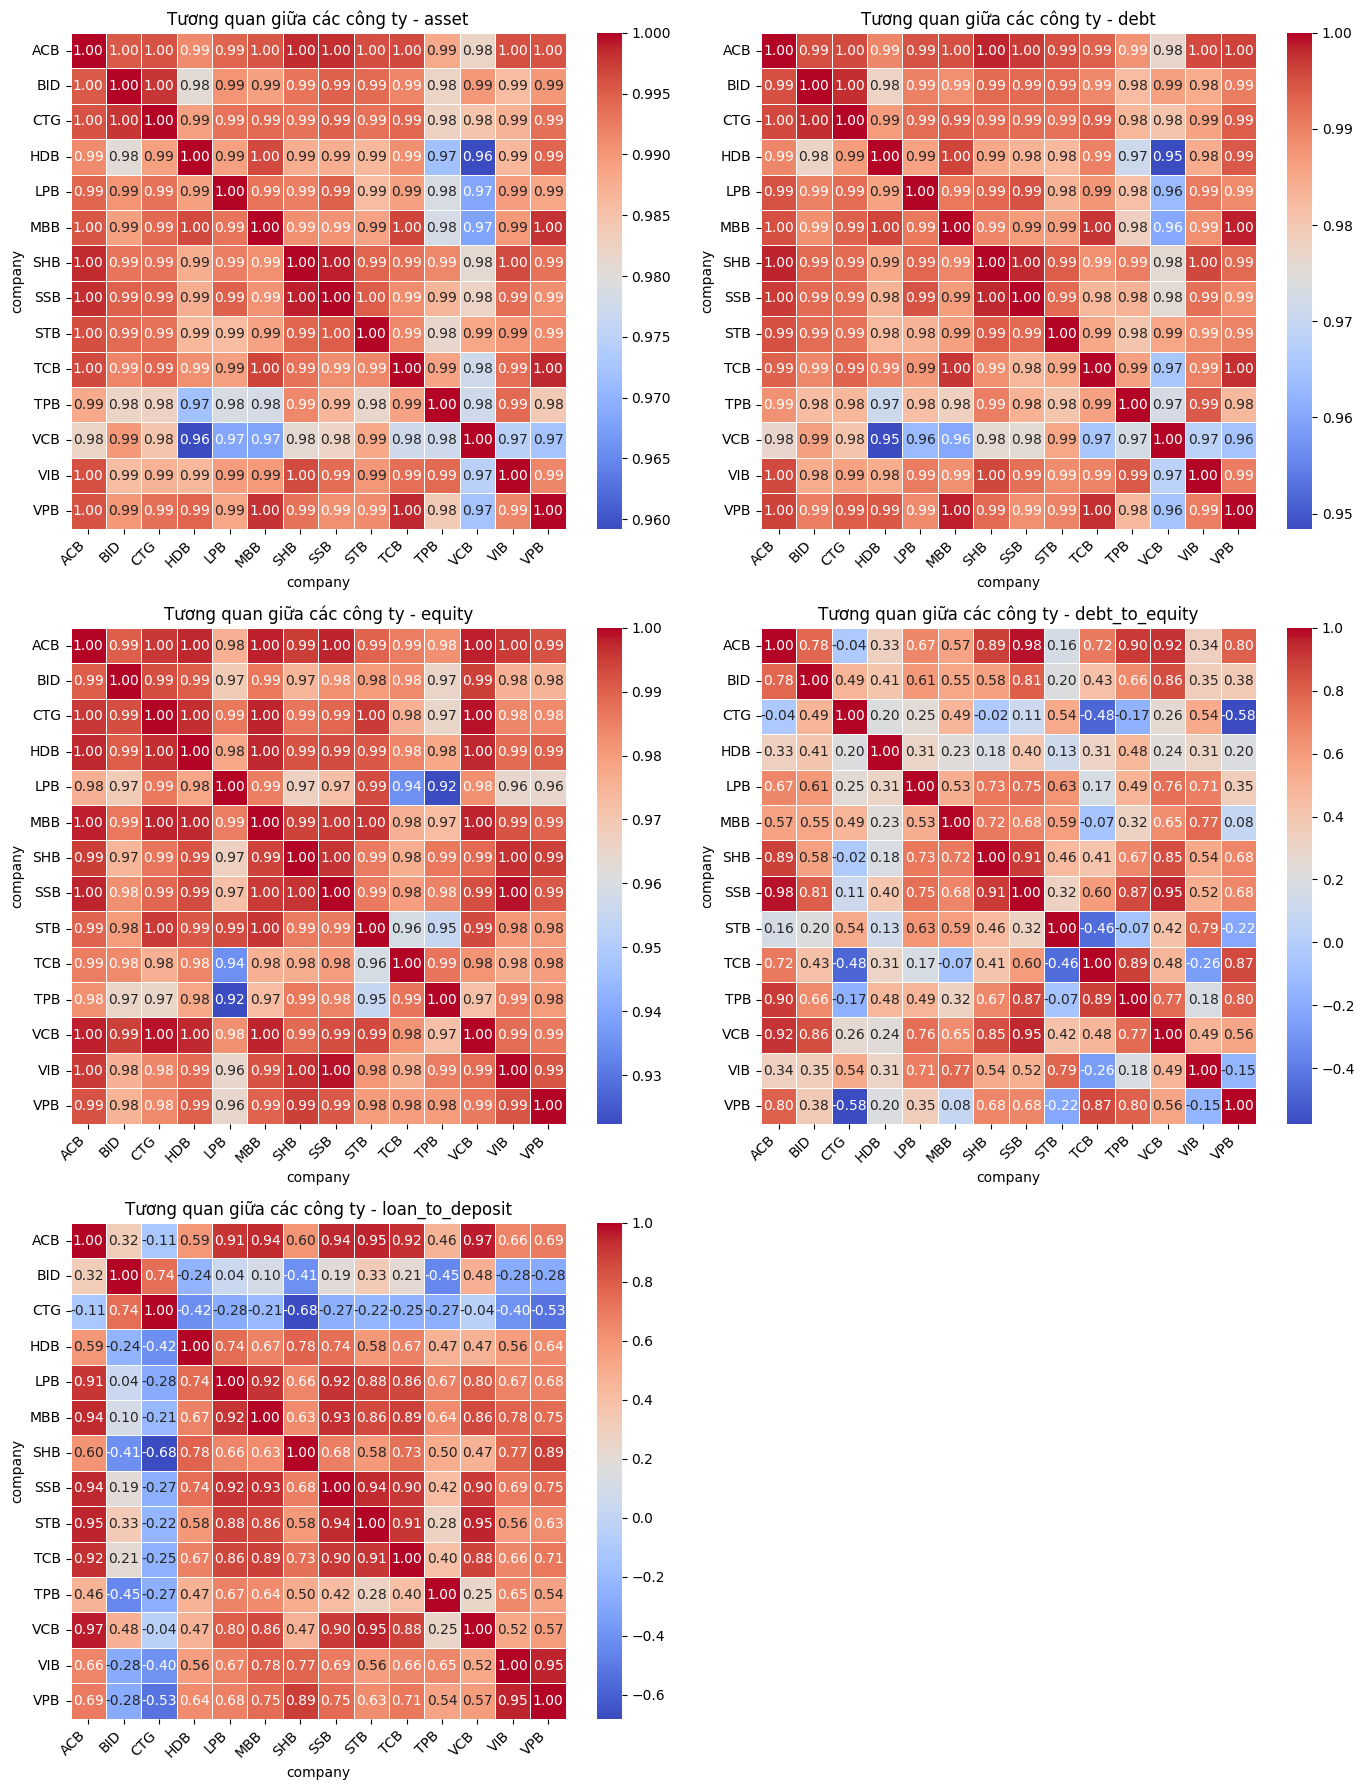

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Giả sử df1 đã có cột 'period' định dạng datetime và cột 'company'
if 'period' in df1.columns:
    df1['period'] = pd.to_datetime(df1['period'], errors='coerce')

# Danh sách chỉ số muốn kiểm tra tương quan
selected_indicators = ['asset', 'debt', 'equity', 'debt_to_equity', 'loan_to_deposit', 'deposit_to_asset']

# Xác định số hàng và số cột cho subplot
n = len(selected_indicators)
cols = 2
rows = math.ceil(n / cols)

# Tạo subplot
fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()

# Lặp qua từng chỉ số để vẽ heatmap
for i, indicator in enumerate(selected_indicators):
    ax = axes[i]
    if indicator in df1.columns:
        pivot = df1.pivot_table(index='period', columns='company', values=indicator)

        if pivot.shape[0] > 1:
            corr_matrix = pivot.corr()
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)
            ax.set_title(f"Tương quan giữa các công ty - {indicator}", fontsize=12)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        else:
            ax.set_visible(False)
            print(f"Không đủ dữ liệu cho chỉ số: {indicator}")
    else:
        ax.set_visible(False)
        print(f"Chỉ số {indicator} không có trong dữ liệu.")

# Ẩn subplot thừa nếu có
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Giả sử df là DataFrame đã có với các cột: 'company', 'period', 'asset'
df1['period'] = pd.to_datetime(df1['period'])
df1.sort_values(['company', 'period'], inplace=True)

summary = []

for company, group in df1.groupby('company'):
    group = group.sort_values('period')
    asset = group['asset'].values
    returns = np.diff(asset) / asset[:-1] if len(asset) > 1 else [0]

    n_obs = len(group)
    volatility = np.std(returns) if len(returns) > 1 else 0
    momentum = asset[-1] - asset[0] if len(asset) > 1 else 0
    autocorr = np.corrcoef(asset[:-1], asset[1:])[0,1] if len(asset) > 2 else 0.0

    # Hurst exponent estimation
    def hurst_exponent(ts):
        N = len(ts)
        if N < 20:
            return 0.5
        lags = range(2, 20)
        tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
        try:
            hurst = np.polyfit(np.log(lags), np.log(tau), 1)[0]
            return hurst
        except:
            return 0.5

    hurst = hurst_exponent(asset)

    sharpe_ratio = np.mean(returns) / np.std(returns) if np.std(returns) > 0 else 0.0

    summary.append({
        'company': company,
        'n_obs': n_obs,
        'volatility': volatility,
        'momentum': momentum,
        'autocorr': autocorr,
        'hurst': hurst,
        'sharpe': sharpe_ratio,
    })

summary_df = pd.DataFrame(summary)

# Hiển thị bảng tổng hợp
print("Bảng tóm tắt các chỉ số time-series có ý nghĩa cho từng công ty:")
print(summary_df.round(3))


Bảng tóm tắt các chỉ số time-series có ý nghĩa cho từng công ty:
   company  n_obs  volatility  momentum  autocorr  hurst  sharpe
0      ACB     10       0.021    662549     0.999    0.5   8.262
1      BID     10       0.061   1910186     0.983    0.5   2.328
2      CTG     10       0.051   1605905     0.992    0.5   2.602
3      HDB     10       0.135    590795     0.973    0.5   1.771
4      LPB     10       0.079    400743     0.987    0.5   2.418
5      MBB     10       0.046    907759     0.997    0.5   4.381
6      SHB     10       0.043    542540     0.993    0.5   3.606
7      SSB     10       0.045    240942     0.993    0.5   3.639
8      STB     10       0.025    456062     0.996    0.5   4.409
9      TCB     10       0.046    786805     0.996    0.5   4.345
10     TPB     10       0.115    341807     0.983    0.5   1.855
11     VCB     10       0.098   1411002     0.961    0.5   1.409
12     VIB     10       0.073    408849     0.994    0.5   2.992
13     VPB     10       0

- volatility:	Độ biến động tài sản – phản ánh rủi ro  
- momentum: Động lượng – cho thấy xu hướng tăng/giảm của tài sản  
- autocorr: Tương quan tự động – đo mức độ phụ thuộc thời gian  
- hurst: Chỉ số Hurst – kiểm tra xu hướng chuỗi thời gian (0.5 là ngẫu nhiên)  
- sharpe: Tỷ lệ Sharpe – đo lợi suất hiệu chỉnh theo rủi ro (cao hơn là tốt hơn)  

## Kiểm chứng giả thuyết

Giả thuyết 1: Tương quan giữa Volatility và Sharpe Ratio
Pearson correlation: -0.755, p-value: 0.002


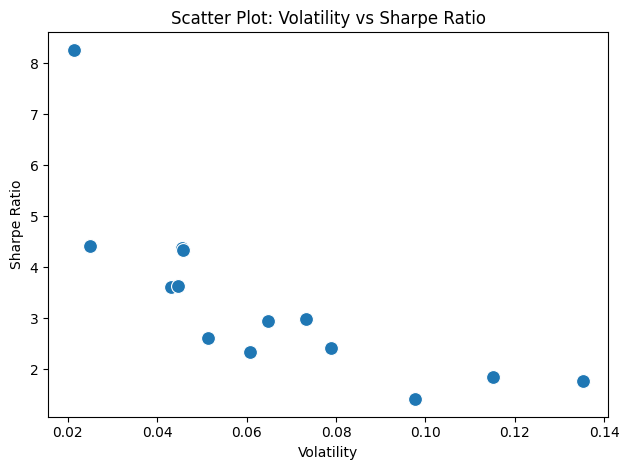


Giả thuyết 2: Tương quan giữa Momentum và Sharpe Ratio
Pearson correlation: -0.223, p-value: 0.444


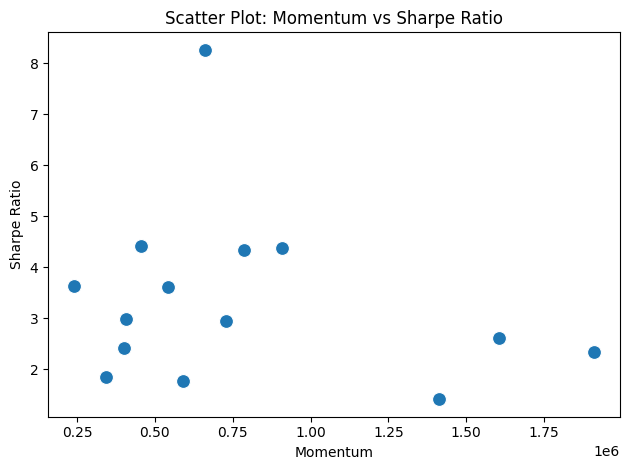

In [46]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử summary_df đã có các cột: 'company', 'volatility', 'momentum', 'hurst', 'sharpe'
# Nếu summary_df chưa có, hãy chạy code tính các chỉ số trước đó.

# ----------------------------------------------
# Giả thuyết 1: Volatility vs Sharpe Ratio
# ----------------------------------------------
# H0: Không có mối liên hệ giữa volatility và Sharpe ratio.
# H1: Có mối liên hệ âm (nghĩa là volatility thấp đi kèm với Sharpe cao).
corr_vol_sharpe, p_vol_sharpe = stats.pearsonr(summary_df['volatility'], summary_df['sharpe'])
print("Giả thuyết 1: Tương quan giữa Volatility và Sharpe Ratio")
print("Pearson correlation: {:.3f}, p-value: {:.3f}".format(corr_vol_sharpe, p_vol_sharpe))

sns.scatterplot(data=summary_df, x='volatility', y='sharpe', s=100)
plt.title("Scatter Plot: Volatility vs Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Sharpe Ratio")
plt.tight_layout()
plt.show()

# ----------------------------------------------
# Giả thuyết 2: Momentum vs Sharpe Ratio
# ----------------------------------------------
# H0: Không có mối liên hệ giữa momentum và Sharpe ratio.
# H1: Có mối liên hệ dương (nghĩa là momentum cao đi kèm với Sharpe cao).
corr_mom_sharpe, p_mom_sharpe = stats.pearsonr(summary_df['momentum'], summary_df['sharpe'])
print("\nGiả thuyết 2: Tương quan giữa Momentum và Sharpe Ratio")
print("Pearson correlation: {:.3f}, p-value: {:.3f}".format(corr_mom_sharpe, p_mom_sharpe))

sns.scatterplot(data=summary_df, x='momentum', y='sharpe', s=100)
plt.title("Scatter Plot: Momentum vs Sharpe Ratio")
plt.xlabel("Momentum")
plt.ylabel("Sharpe Ratio")
plt.tight_layout()
plt.show()




### 📊 Giả thuyết 1: Tương quan giữa Volatility và Sharpe Ratio

- **Pearson correlation**: `-0.755`  
- **p-value**: `0.002`

✅ **Ý nghĩa thống kê cao** (p-value < 0.05), tức là mối tương quan âm này **có ý nghĩa thống kê**.

**📈 Diễn giải**:  
Khi độ biến động (Volatility) tăng, hiệu suất điều chỉnh rủi ro (Sharpe Ratio) có xu hướng giảm.

> 👉 *"Các ngân hàng có biến động thấp hơn thường mang lại hiệu quả đầu tư tốt hơn sau khi điều chỉnh rủi ro."*

🔍 **Kết luận**:  
Đây là một kết quả **hợp lý và có thể áp dụng trong đầu tư thực tế**, vì **rủi ro thấp mà vẫn đạt lợi nhuận cao là mục tiêu của các nhà đầu tư giá trị**.

---

### ❌ Giả thuyết 2: Tương quan giữa Momentum và Sharpe Ratio

- **Pearson correlation**: `-0.223`  
- **p-value**: `0.444`

❌ **Không có ý nghĩa thống kê** (p-value > 0.05), và tương quan lại hơi âm.

**📈 Diễn giải**:  
Động lượng (Momentum) tăng **không đi kèm** với hiệu suất đầu tư tốt hơn.

🧐 **Lý do có thể**:
- Dữ liệu chưa đủ lớn để phản ánh đúng xu hướng.
- Một vài ngân hàng có động lượng cao nhưng cũng có rủi ro lớn, khiến Sharpe Ratio không cao.

🔍 **Kết luận**:  
Giả thuyết này **không được dữ liệu ủng hộ**, nên **chưa thể sử dụng trong quyết định đầu tư**.

---



Hypothesis 3: Tương quan giữa Autocorrelation và Sharpe Ratio
Pearson correlation: 0.710, p-value: 0.004


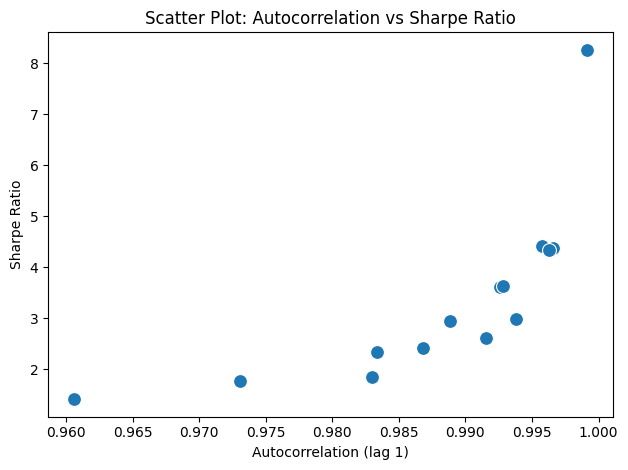


Hypothesis 4: Tương quan giữa Volatility và Momentum
Pearson correlation: -0.034, p-value: 0.909


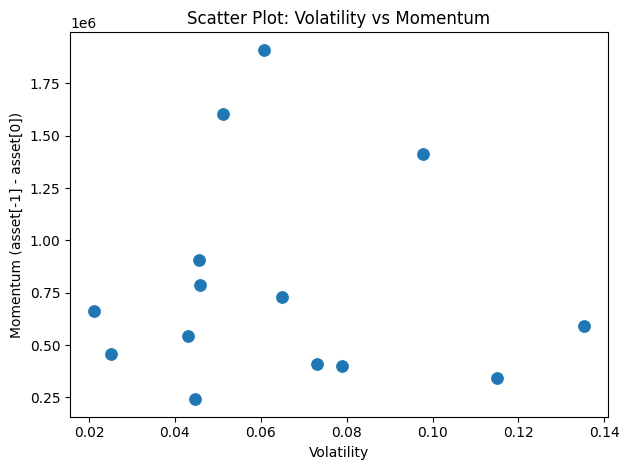

In [48]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame summary_df với các chỉ số:
# Các cột có thể có: 'company', 'volatility', 'momentum', 'autocorr', 'hurst', 'sharpe'

# ----------------------------------------------
# Giả thuyết 3: Tương quan giữa Autocorrelation và Sharpe Ratio
# ----------------------------------------------
# H0: Không có mối liên hệ giữa tự tương quan (autocorr) của asset returns và Sharpe ratio.
# H1: Các ngân hàng có hệ số tự tương quan thấp hơn (ít "memory") sẽ có Sharpe ratio cao hơn.

corr_ac_sharpe, p_ac_sharpe = stats.pearsonr(summary_df['autocorr'], summary_df['sharpe'])
print("Hypothesis 3: Tương quan giữa Autocorrelation và Sharpe Ratio")
print("Pearson correlation: {:.3f}, p-value: {:.3f}".format(corr_ac_sharpe, p_ac_sharpe))

sns.scatterplot(data=summary_df, x='autocorr', y='sharpe', s=100)
plt.title("Scatter Plot: Autocorrelation vs Sharpe Ratio")
plt.xlabel("Autocorrelation (lag 1)")
plt.ylabel("Sharpe Ratio")
plt.tight_layout()
plt.show()


# ----------------------------------------------
# Giả thuyết 4: Tương quan giữa Volatility và Momentum
# ----------------------------------------------
# H0: Không có mối liên hệ giữa độ biến động (volatility) và động lượng (momentum) của asset.
# H1: Các ngân hàng có độ biến động cao hơn thường có động lượng (sự tăng giảm asset) lớn hơn.

corr_vol_mom, p_vol_mom = stats.pearsonr(summary_df['volatility'], summary_df['momentum'])
print("\nHypothesis 4: Tương quan giữa Volatility và Momentum")
print("Pearson correlation: {:.3f}, p-value: {:.3f}".format(corr_vol_mom, p_vol_mom))

sns.scatterplot(data=summary_df, x='volatility', y='momentum', s=100)
plt.title("Scatter Plot: Volatility vs Momentum")
plt.xlabel("Volatility")
plt.ylabel("Momentum (asset[-1] - asset[0])")
plt.tight_layout()
plt.show()




### ✅ Giả thuyết 3: Mối tương quan giữa Autocorrelation và Sharpe Ratio
- **Pearson correlation** = **0.710**, **p-value = 0.004**
- ➤ Có ý nghĩa thống kê (**p < 0.05**)
- **Diễn giải:**
  > 🧠 Các ngân hàng có độ “mượt” trong biến động giá (tức là có autocorrelation cao) có xu hướng mang lại hiệu suất điều chỉnh rủi ro tốt hơn (Sharpe Ratio cao).

---

### ❌ Giả thuyết 4: Mối tương quan giữa Volatility và Momentum
- **Pearson correlation** = **-0.034**, **p-value = 0.909**
- ➤ Không có ý nghĩa thống kê (**p > 0.05**)
- **Diễn giải:**
  > Volatility và Momentum gần như không liên hệ với nhau. Do đó, không thể sử dụng một trong hai chỉ số để suy luận hay dự đoán chỉ số còn lại.


In [56]:
# ------------------------------
# Giả thuyết 5: Low Volatility vs High Volatility
# ------------------------------
median_vol = summary_df['volatility'].median()
low_vol_group = summary_df[summary_df['volatility'] <= median_vol]
high_vol_group = summary_df[summary_df['volatility'] > median_vol]

# Kiểm định Mann–Whitney U: alternative='greater' nếu giả thuyết là nhóm low volatility có Sharpe cao hơn.
stat1, p_value1 = stats.mannwhitneyu(low_vol_group['sharpe'], high_vol_group['sharpe'], alternative='greater')

print("Hypothesis 5 : Banks with low volatility have higher Sharpe ratios than banks with high volatility")
print(f"Median volatility = {median_vol:.3f}")
print(f"Test statistic = {stat1:.3f}, p-value = {p_value1:.3f}\n")


Hypothesis 5 : Banks with low volatility have higher Sharpe ratios than banks with high volatility
Median volatility = 0.056
Test statistic = 47.000, p-value = 0.001



### ✅ Hypothesis 5: Banks with Low Volatility Have Higher Sharpe Ratios

- **Mô tả giả thuyết:**  
  Các ngân hàng có độ biến động (*volatility*) thấp hơn trung vị sẽ có hiệu suất đầu tư điều chỉnh rủi ro (*Sharpe Ratio*) cao hơn.

- **Median Volatility:** 0.056

- **Kết quả kiểm định (Mann–Whitney U Test):**  
  - Test statistic = 47.000  
  - p-value = 0.001

- **Diễn giải:**  
  Với **p-value < 0.05**, giả thuyết có ý nghĩa thống kê. Điều này cho thấy các ngân hàng có **volatility thấp hơn** thường có **Sharpe Ratio cao hơn** — tức là **hiệu suất đầu tư sau khi điều chỉnh rủi ro tốt hơn**.

- 📈 Đây là một thông tin có giá trị đối với các nhà đầu tư theo trường phái quản lý rủi ro, nhấn mạnh tầm quan trọng của việc lựa chọn các tài sản có biến động thấp trong danh mục đầu tư.


# 2. Phân tích các công ty không phải là ngân hàng 

In [59]:
df2.columns

Index(['company', 'period', 'short_asset', 'cash', 'short_invest',
       'short_receivable', 'inventory', 'long_asset', 'fixed_asset', 'asset',
       'debt', 'short_debt', 'long_debt', 'equity', 'capital', 'other_debt',
       'un_distributed_income', 'minor_share_holder_profit', 'payable'],
      dtype='object')

## 📊 Giải thích ý nghĩa các cột dữ liệu tài chính

| Cột dữ liệu                  | Ý nghĩa                                                                 |
|-----------------------------|-------------------------------------------------------------------------|
| `company`                   | Tên viết tắt của công ty                                                |
| `period`                    | Năm tài chính (kỳ kế toán)                                              |
| `short_asset`               | Tổng tài sản ngắn hạn (Tài sản có thể chuyển đổi thành tiền trong vòng 1 năm) |
| `cash`                      | Tiền mặt và các khoản tương đương tiền                                 |
| `short_invest`              | Đầu tư tài chính ngắn hạn (ví dụ: chứng khoán ngắn hạn, tiền gửi ngắn hạn) |
| `short_receivable`          | Các khoản phải thu ngắn hạn (khách hàng còn nợ)                         |
| `inventory`                 | Hàng tồn kho                                                            |
| `long_asset`                | Tổng tài sản dài hạn                                                    |
| `fixed_asset`               | Tài sản cố định hữu hình (máy móc, nhà xưởng...)                       |
| `asset`                     | Tổng tài sản (ngắn hạn + dài hạn)                                      |
| `debt`                      | Tổng nợ phải trả                                                       |
| `short_debt`                | Nợ ngắn hạn (phải trả trong vòng 1 năm)                                |
| `long_debt`                 | Nợ dài hạn (vay vốn dài hạn, trái phiếu...)                            |
| `equity`                    | Vốn chủ sở hữu (giá trị tài sản thuộc về cổ đông)                      |
| `capital`                   | Vốn điều lệ (số vốn đăng ký của doanh nghiệp)                          |
| `other_debt`                | Các khoản nợ khác (không phân loại vào nợ ngắn hoặc dài hạn)           |
| `un_distributed_income`     | Lợi nhuận chưa phân phối (lợi nhuận giữ lại để tái đầu tư)            |
| `minor_share_holder_profit`| Lợi nhuận dành cho cổ đông thiểu số                                     |
| `payable`                  | Các khoản phải trả (chi phí, nợ với nhà cung cấp, lương, thuế, v.v.)    |


In [60]:
# Bước 1: Tổng Quan Dữ liệu

# Hiển thị thông tin cơ bản
print("Kích thước dữ liệu:", df2.shape)
print("\nThông tin dữ liệu:")
df2.info()

# Hiển thị 5 dòng đầu tiên
print("\n5 dòng đầu tiên:")
print(df2.head())


Kích thước dữ liệu: (159, 19)

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company                    159 non-null    object 
 1   period                     159 non-null    int64  
 2   short_asset                159 non-null    int64  
 3   cash                       159 non-null    int64  
 4   short_invest               159 non-null    int64  
 5   short_receivable           159 non-null    int64  
 6   inventory                  159 non-null    int64  
 7   long_asset                 159 non-null    int64  
 8   fixed_asset                159 non-null    int64  
 9   asset                      159 non-null    int64  
 10  debt                       159 non-null    int64  
 11  short_debt                 159 non-null    int64  
 12  long_debt                  159 non-null    float64
 13  

In [61]:
# Bước 2: Kiểm Tra Giá Trị Thiếu
missing = df2.isnull().sum().sort_values(ascending=False)
print("Số lượng giá trị thiếu theo cột:")
print(missing)


Số lượng giá trị thiếu theo cột:
un_distributed_income        48
company                       0
debt                          0
minor_share_holder_profit     0
other_debt                    0
capital                       0
equity                        0
long_debt                     0
short_debt                    0
asset                         0
period                        0
fixed_asset                   0
long_asset                    0
inventory                     0
short_receivable              0
short_invest                  0
cash                          0
short_asset                   0
payable                       0
dtype: int64


In [62]:
# Bước 3: Thống Kê Mô Tả
desc_stats = df2.describe().T
print("Thống kê mô tả cơ bản:")
print(desc_stats)


Thống kê mô tả cơ bản:
                           count          mean            std     min  \
period                     159.0   2019.528302       2.868006  2015.0   
short_asset                159.0  49980.320755   59734.153935  5070.0   
cash                       159.0   6519.471698    6474.054947   239.0   
short_invest               159.0  12751.339623   19238.501754     0.0   
short_receivable           159.0  14322.006289   29590.107100    30.0   
inventory                  159.0  13219.257862   20233.123256     0.0   
long_asset                 159.0  47585.509434   65335.212549  1089.0   
fixed_asset                159.0  17558.031447   28772.077125    29.0   
asset                      159.0  97565.874214  121876.086057  7266.0   
debt                       159.0  60102.817610   92386.188557  4782.0   
short_debt                 159.0  11651.213836   15938.832703     6.0   
long_debt                  159.0  11156.528302   21815.944015     0.0   
equity                     1

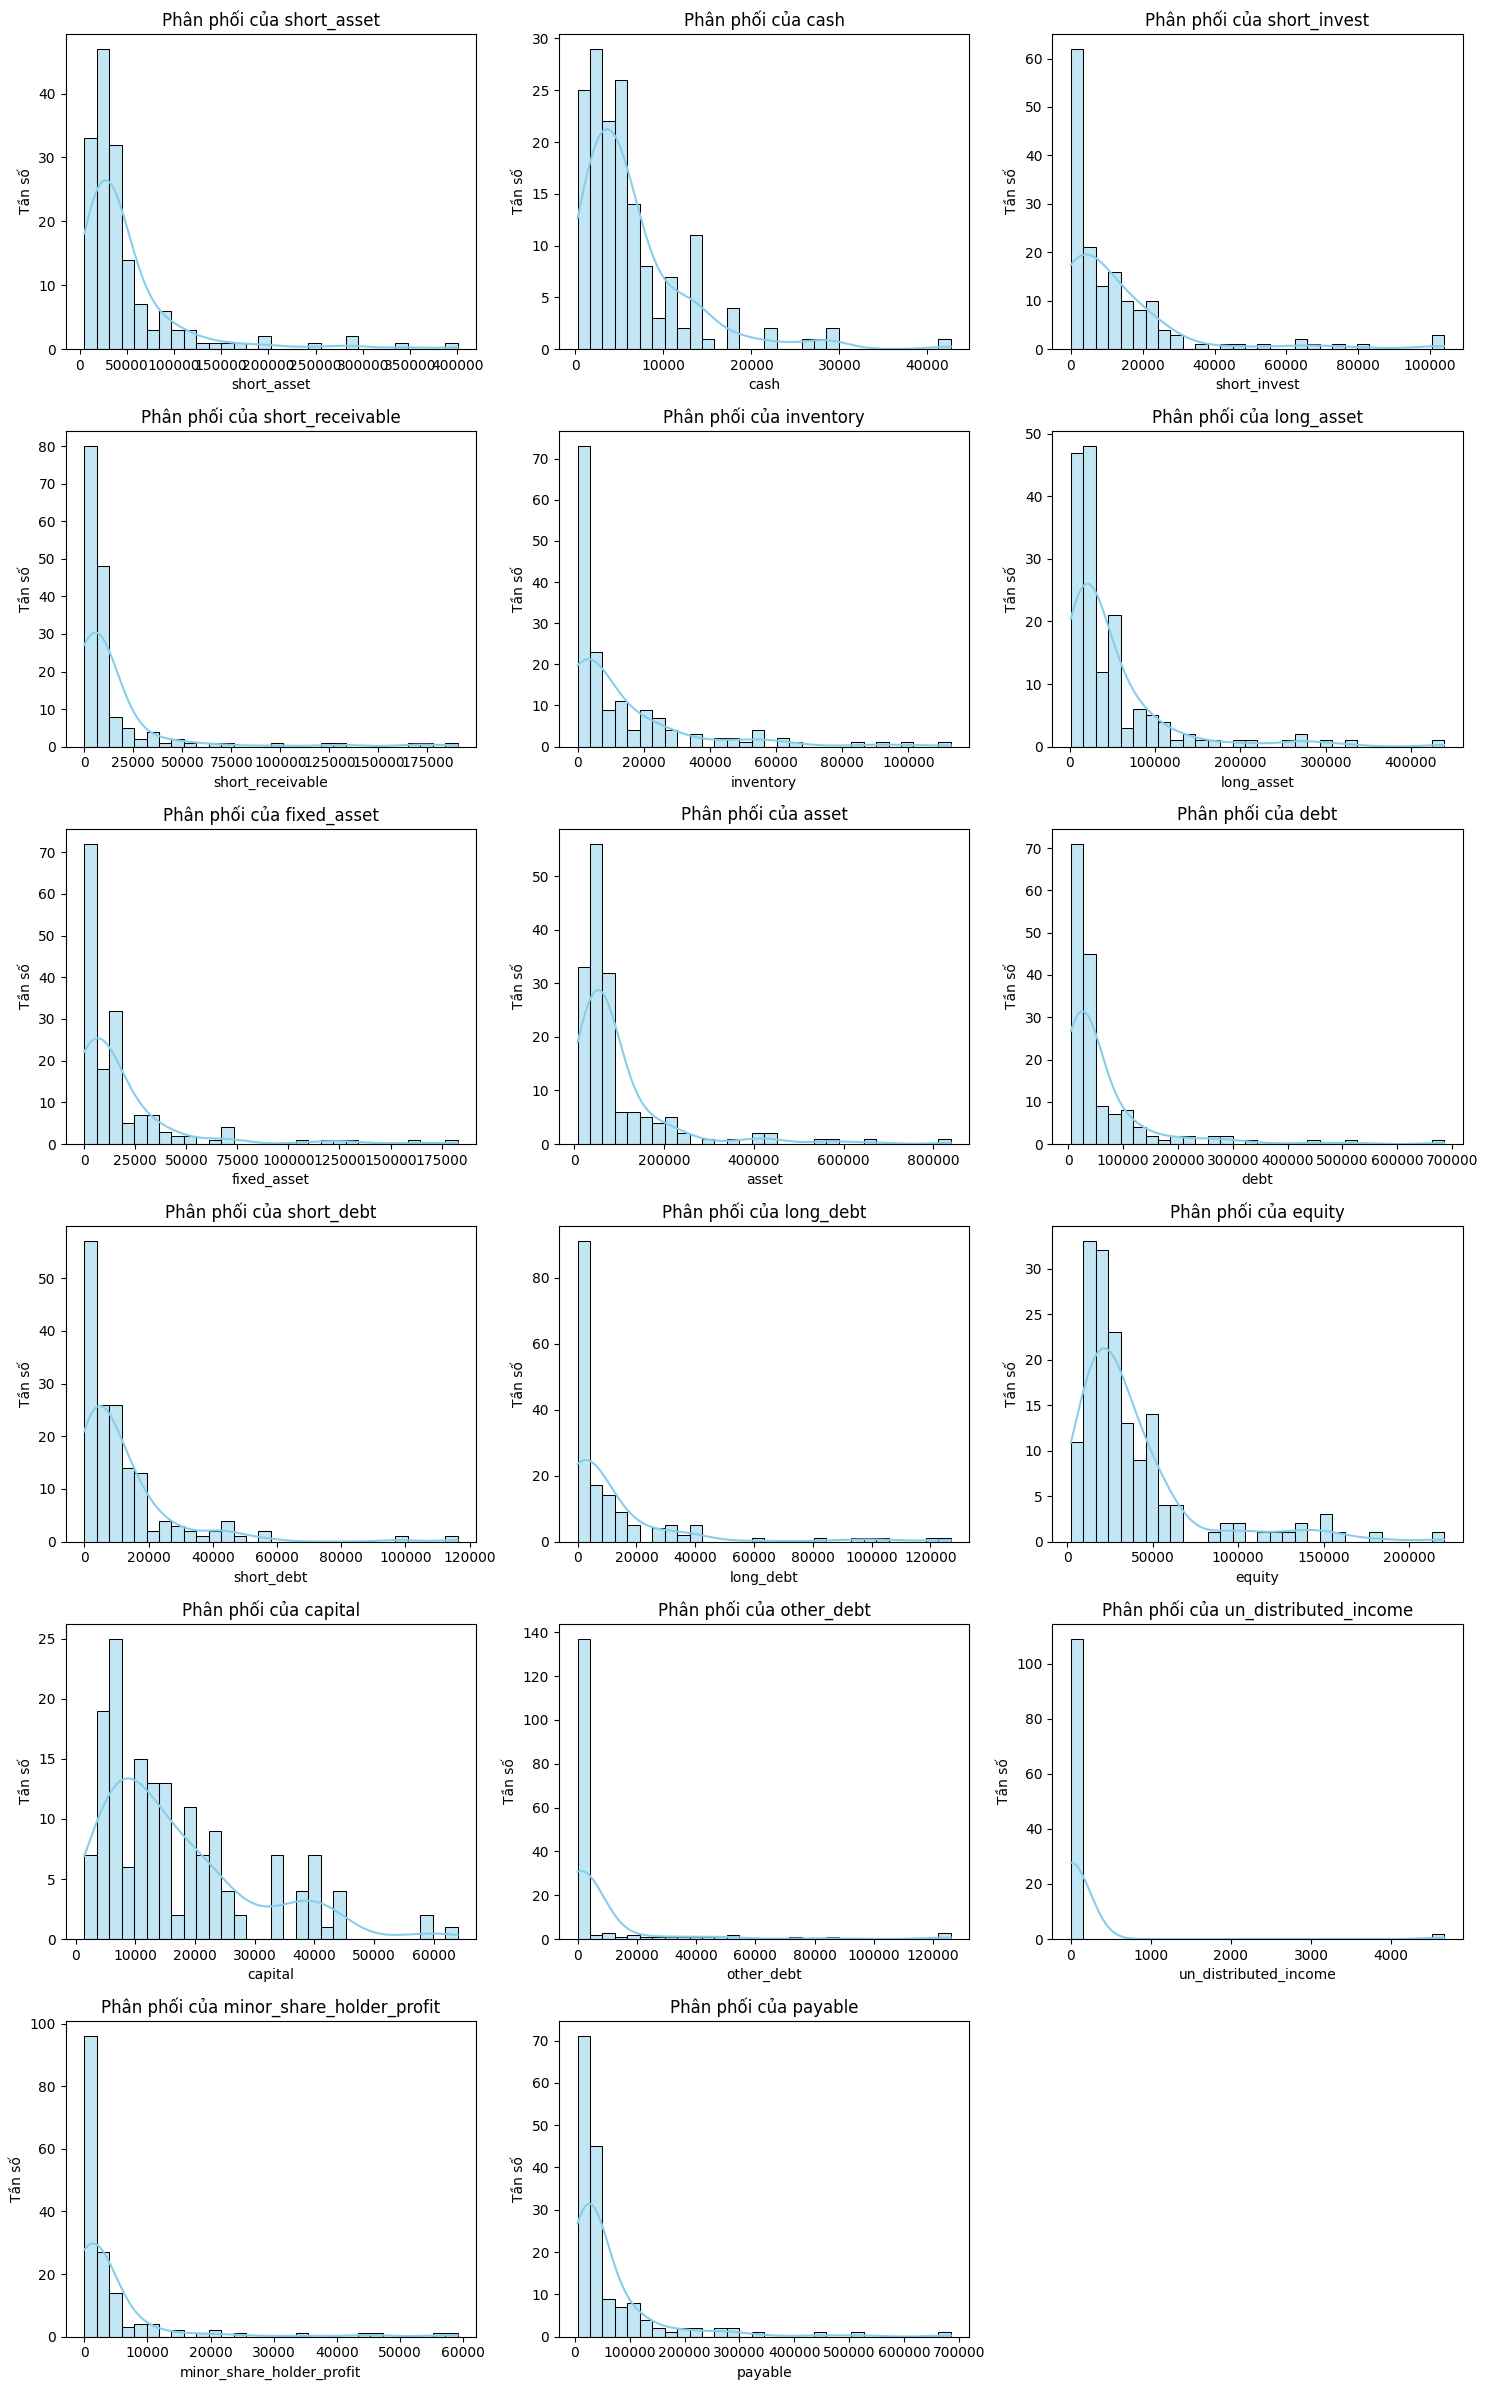

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 4: Vẽ Histogram cho các cột số
numeric_cols = ['short_asset', 'cash', 'short_invest', 'short_receivable', 
                'inventory', 'long_asset', 'fixed_asset', 'asset',
                'debt', 'short_debt', 'long_debt', 'equity', 'capital',
                'other_debt', 'un_distributed_income', 'minor_share_holder_profit', 'payable']

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols)/n_cols))
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df2[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Phân phối của {col}")
    plt.xlabel(col)
    plt.ylabel("Tần số")
    
plt.tight_layout()
plt.show()


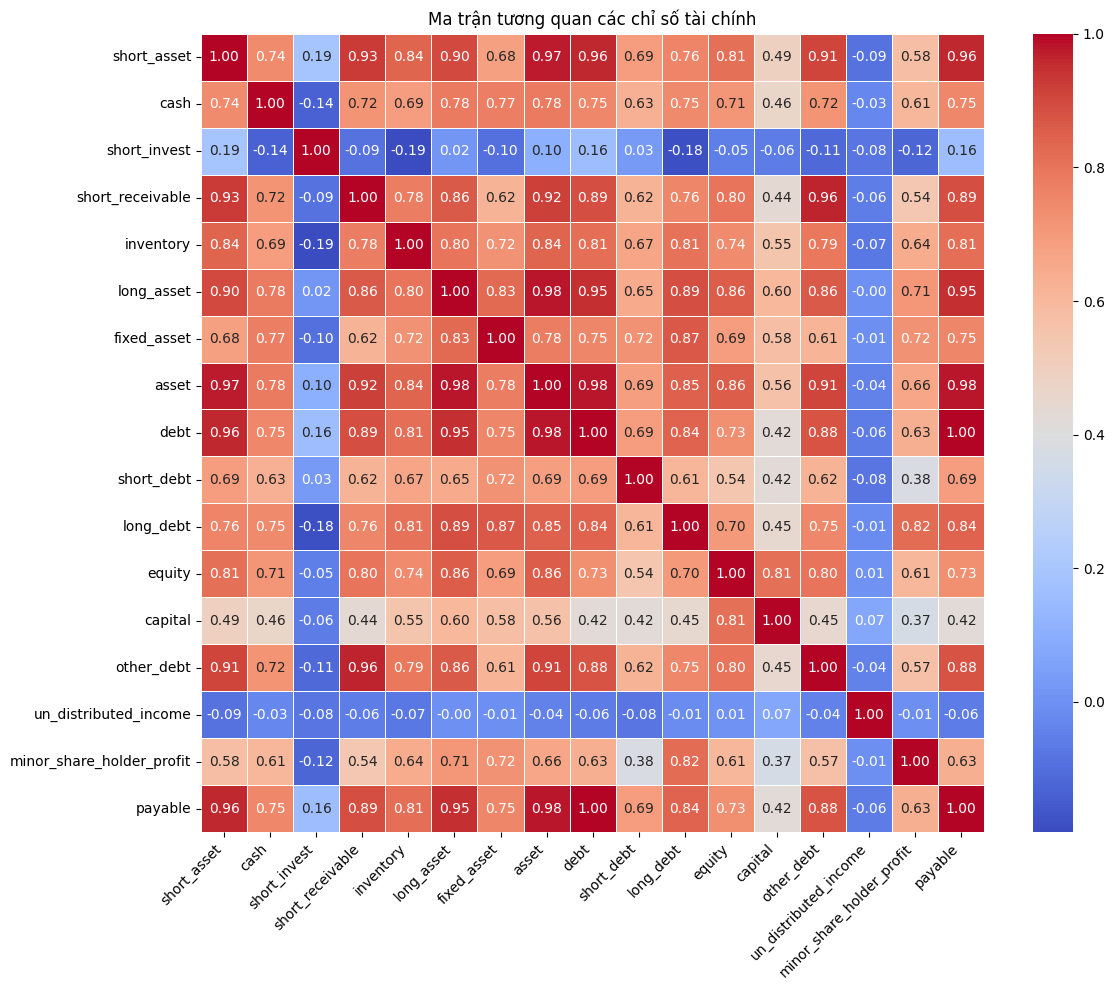

In [64]:
# Bước 5: Tính Ma Trận Tương Quan
corr_matrix = df2[numeric_cols].corr()

plt.figure(figsize=(12,10))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Ma trận tương quan các chỉ số tài chính")
plt.tight_layout()
plt.show()


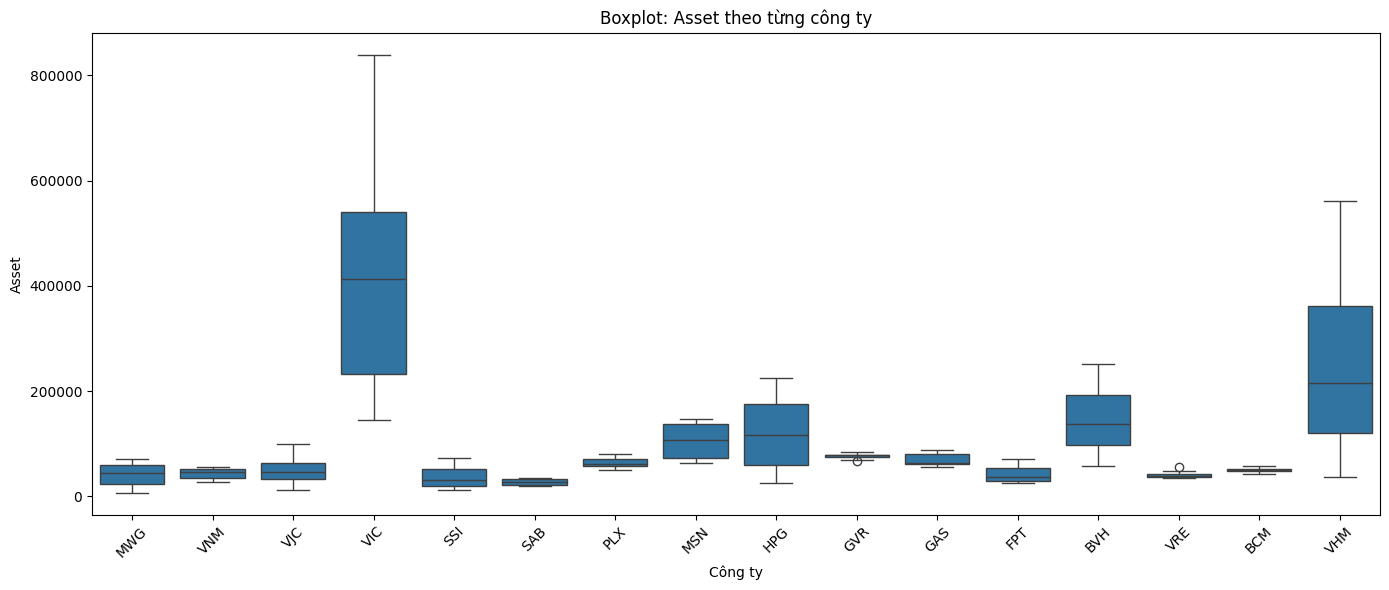

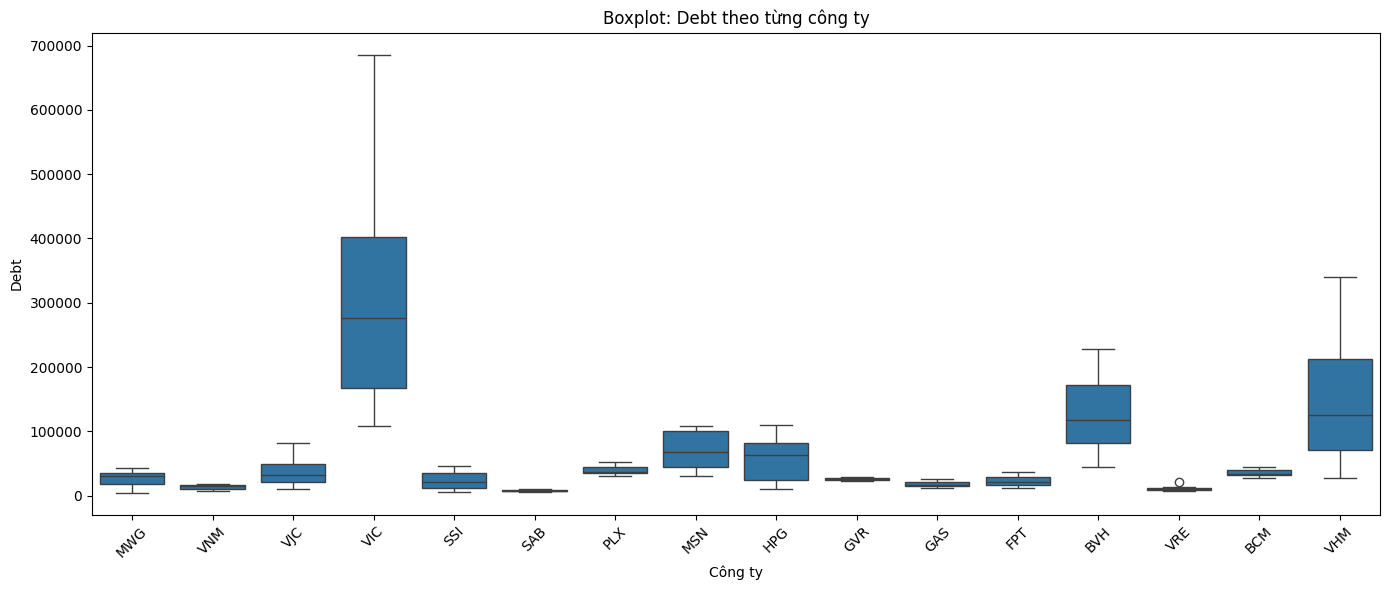

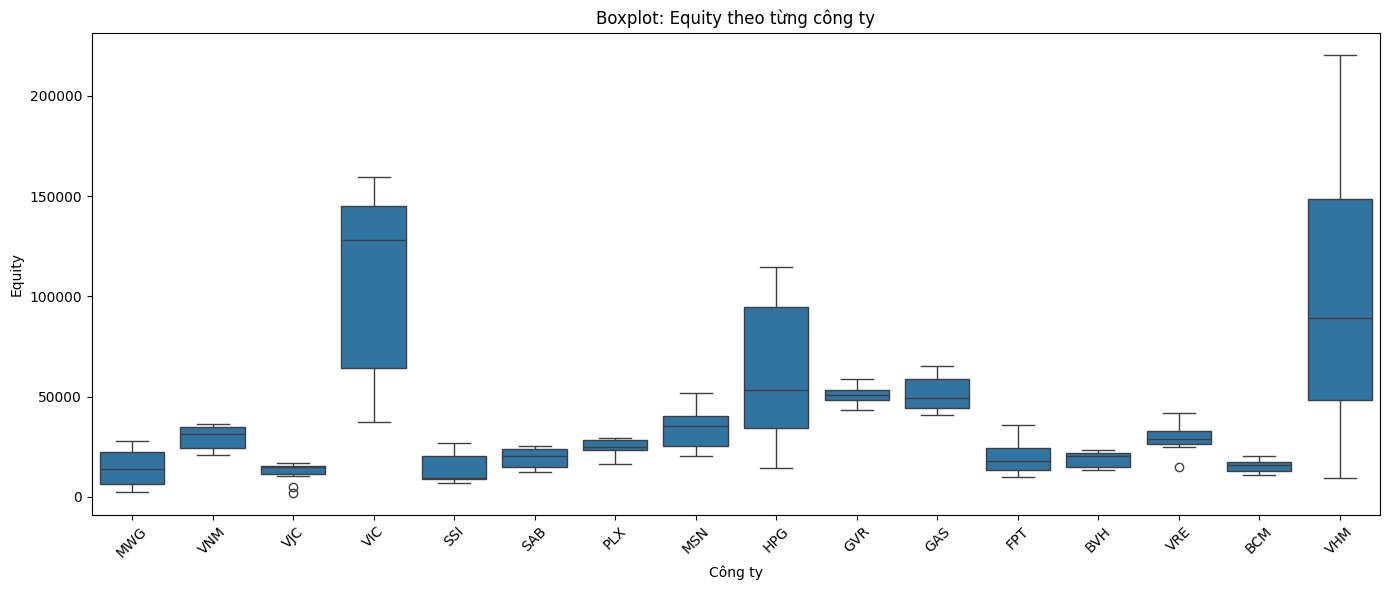

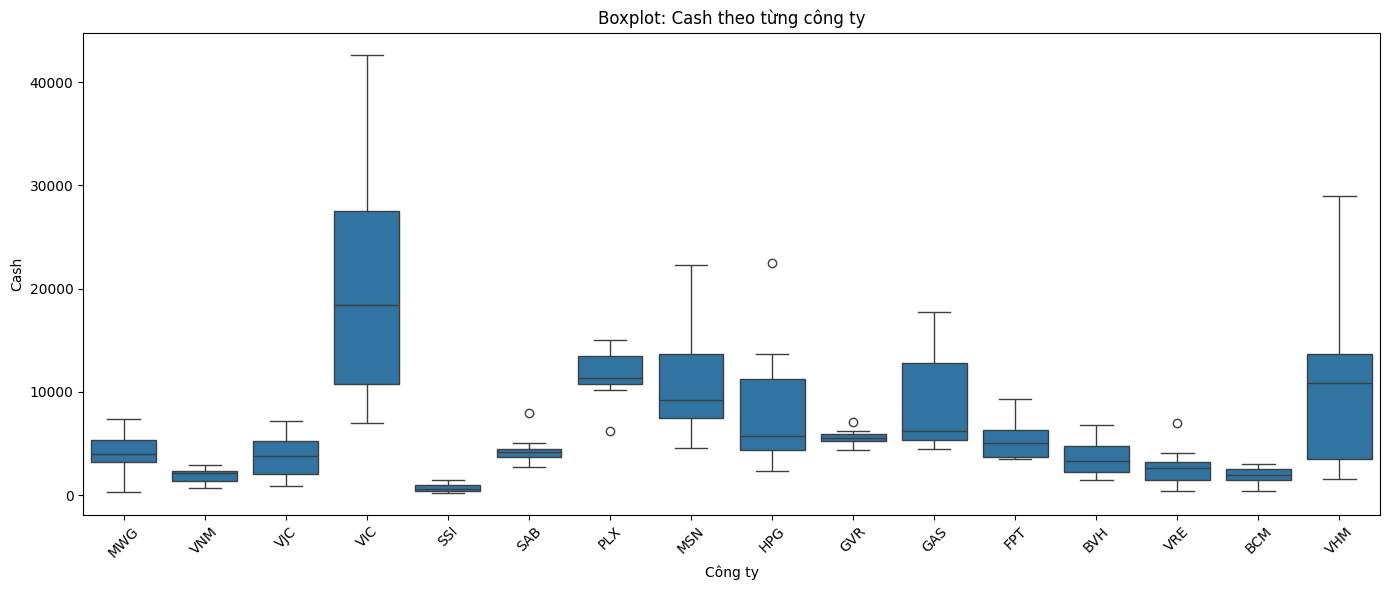

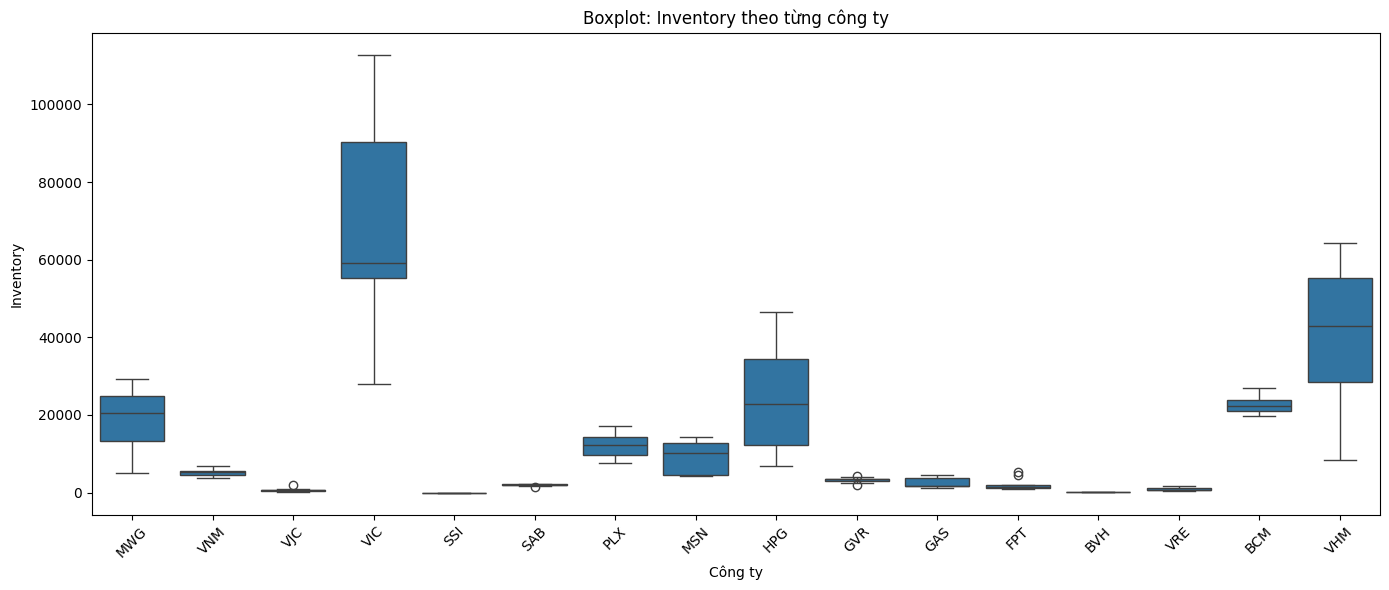

In [71]:
cols = ['asset', 'debt', 'equity', 'cash', 'inventory']
for col in cols:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df2, x='company', y=col)
    plt.title(f"Boxplot: {col.title()} theo từng công ty")
    plt.xlabel("Công ty")
    plt.ylabel(col.title())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


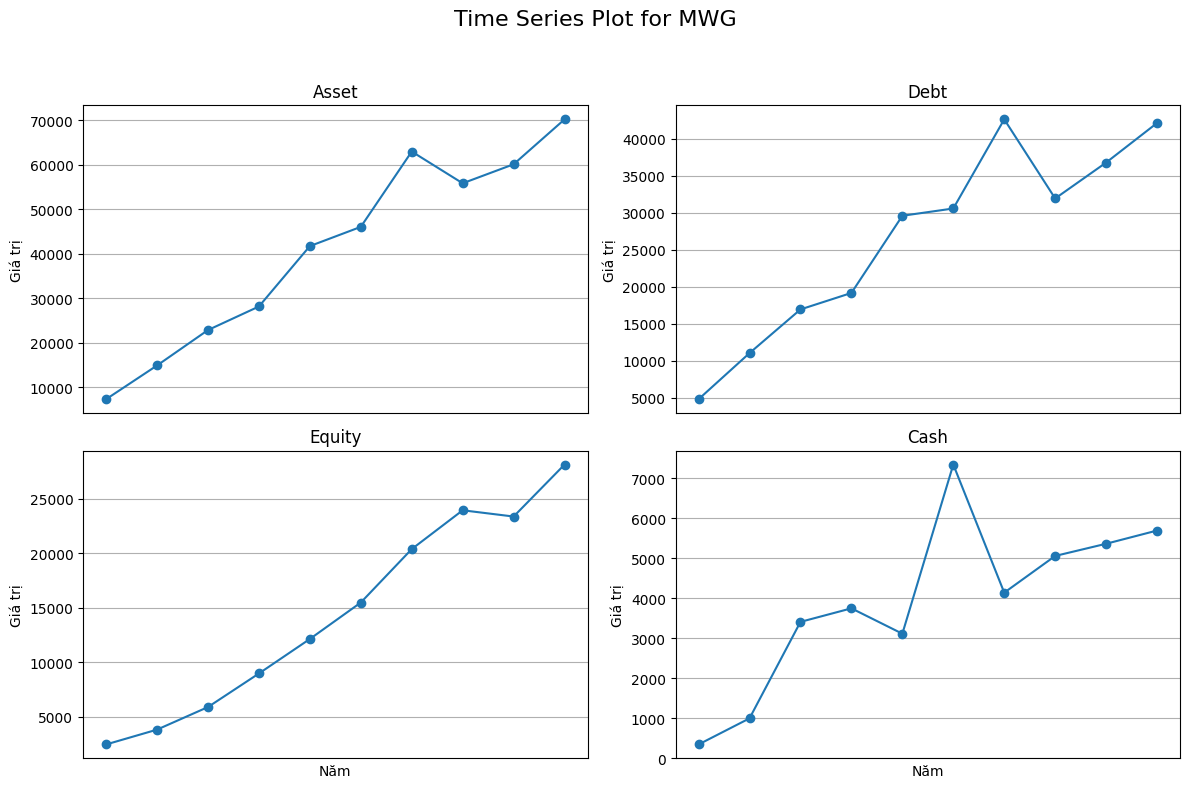

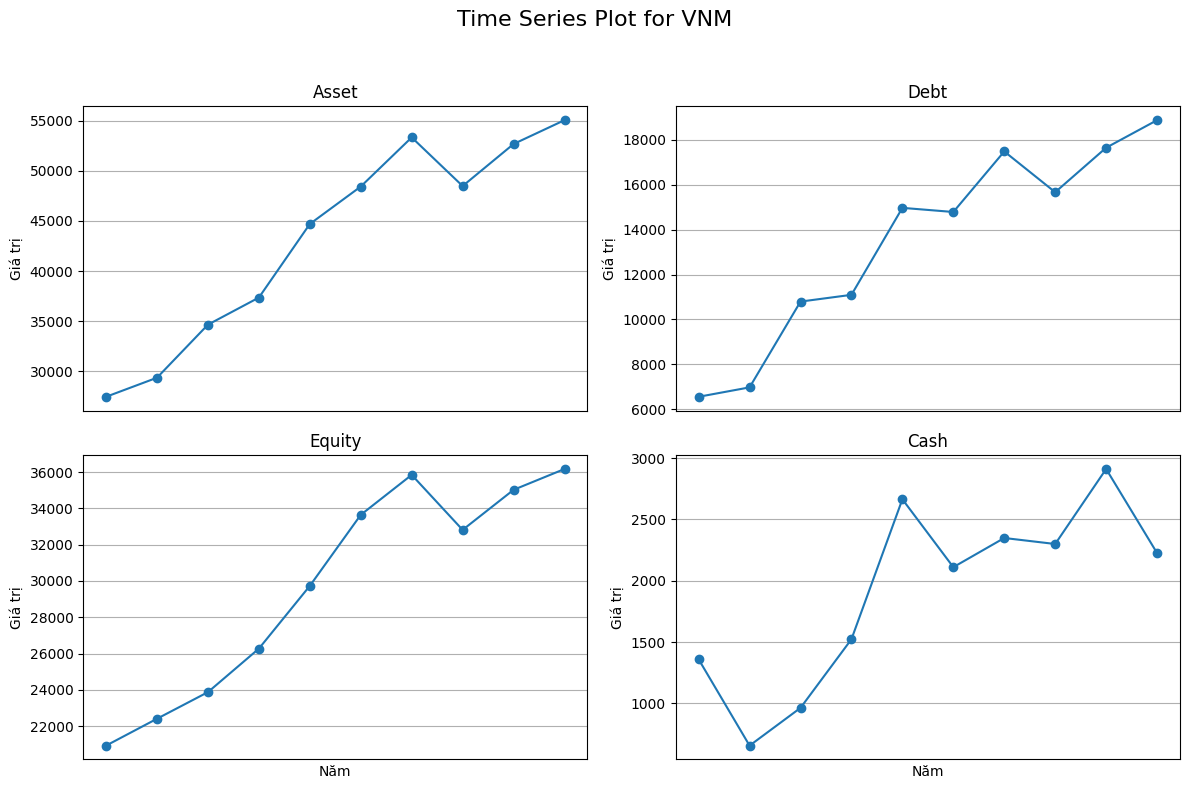

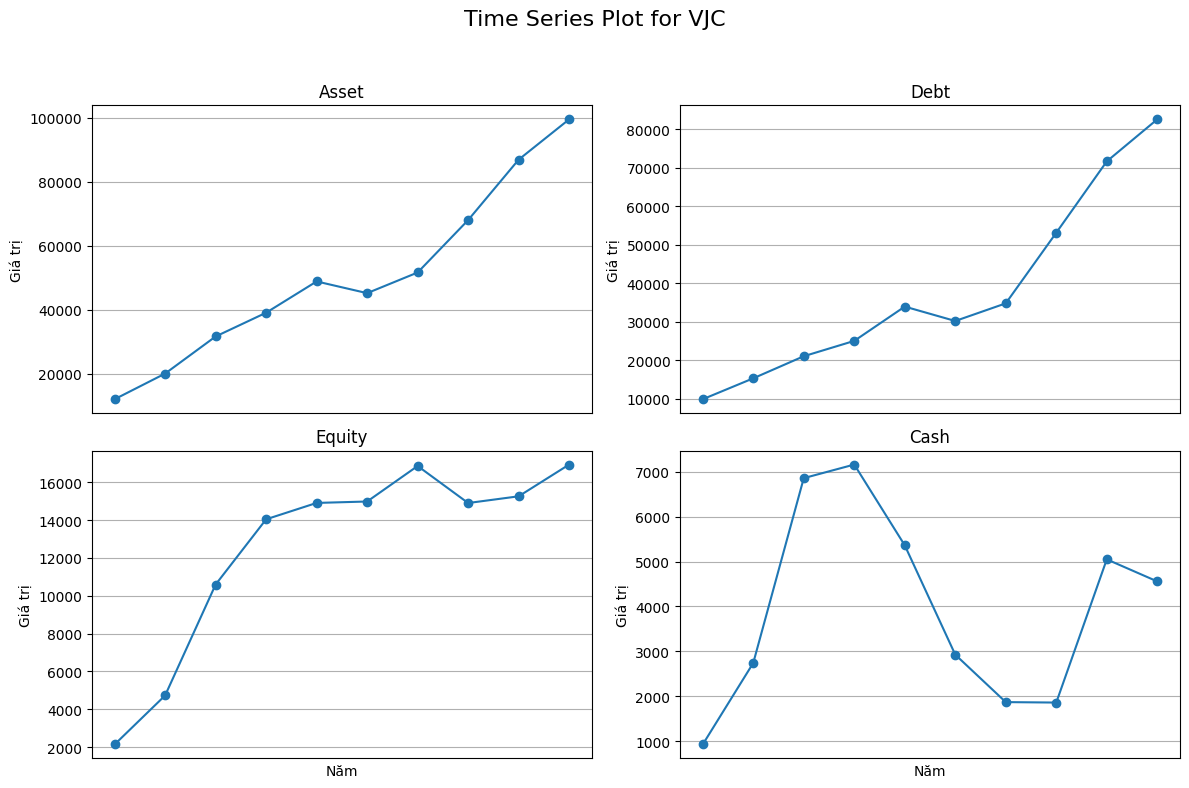

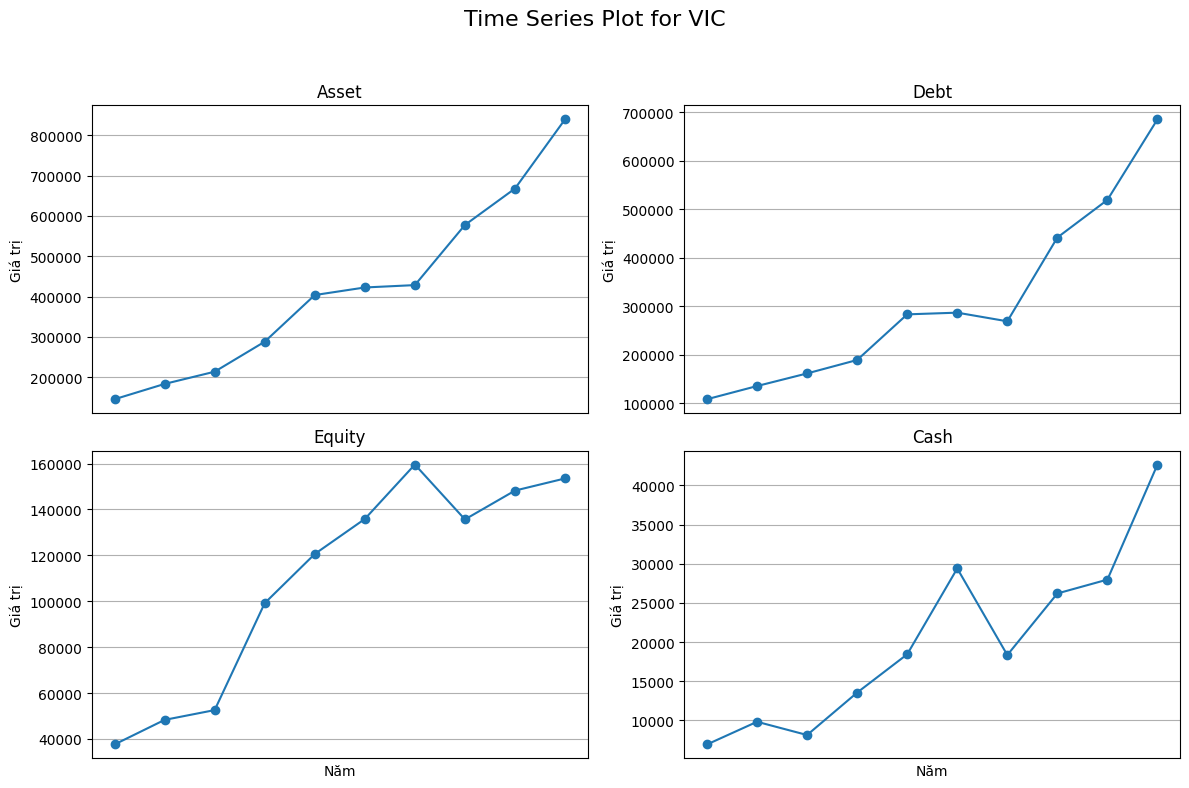

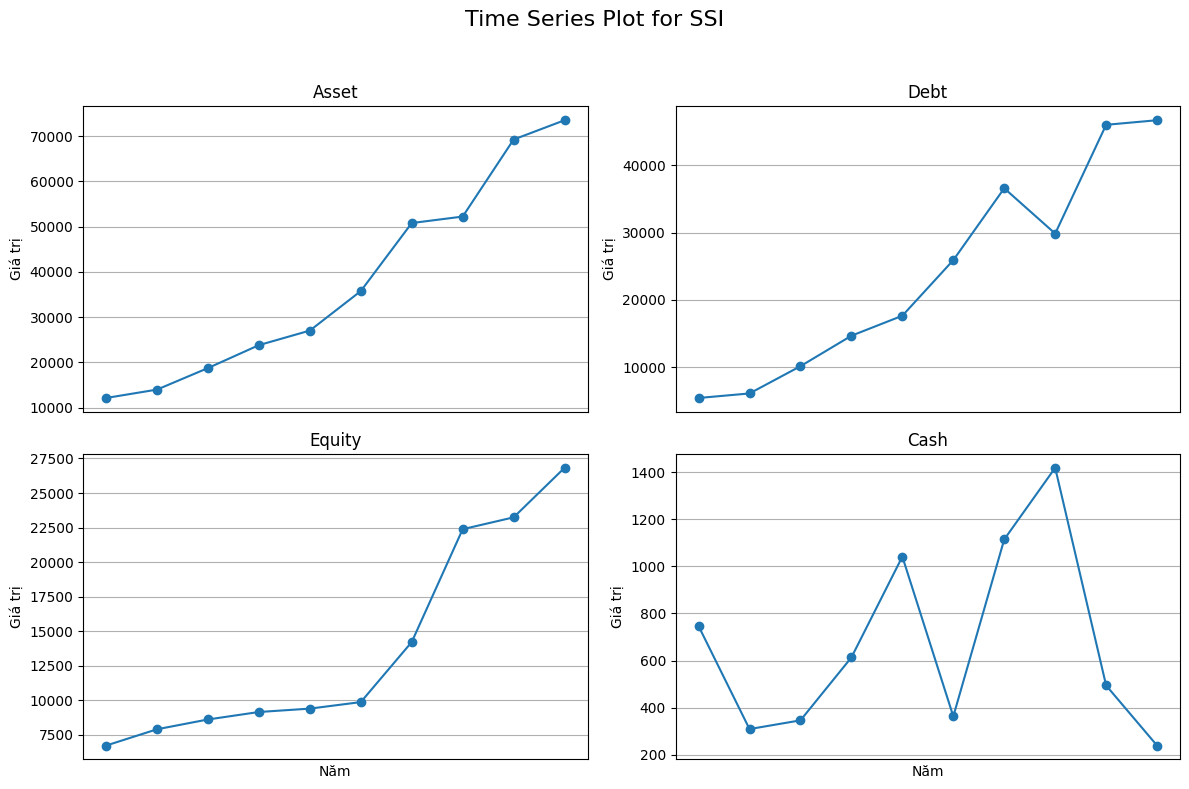

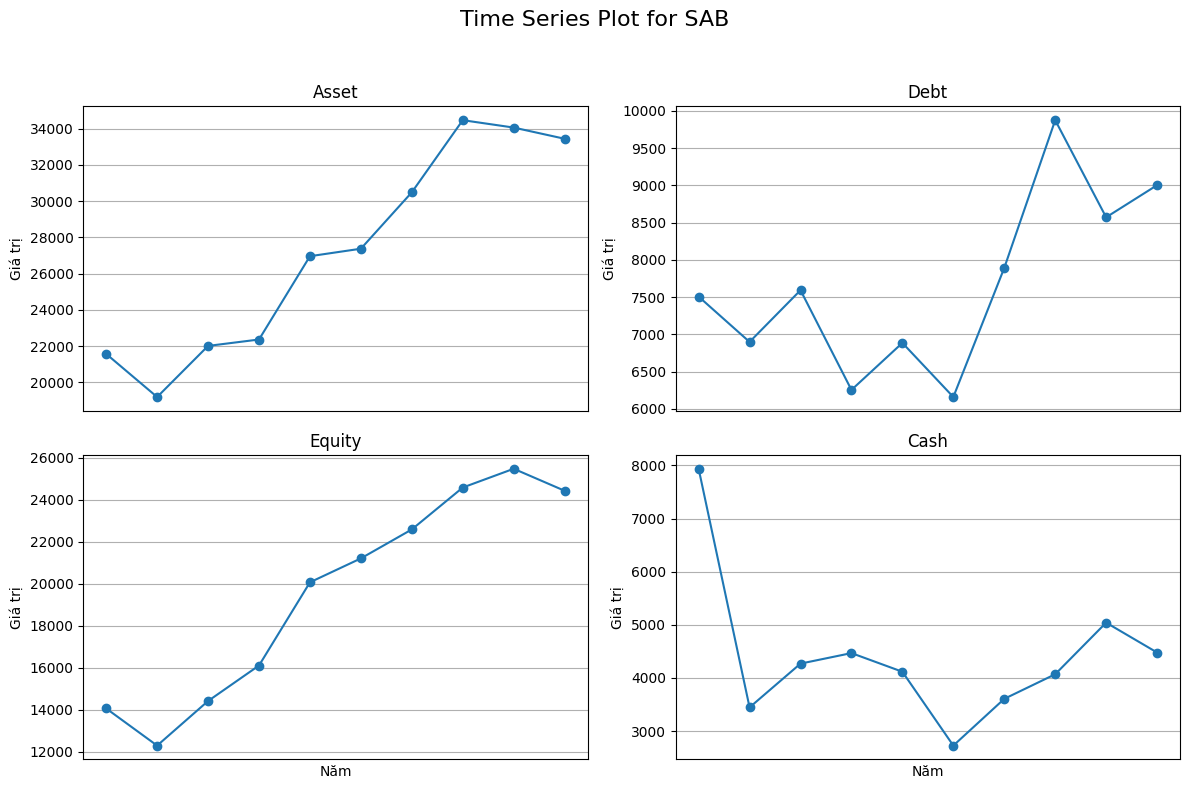

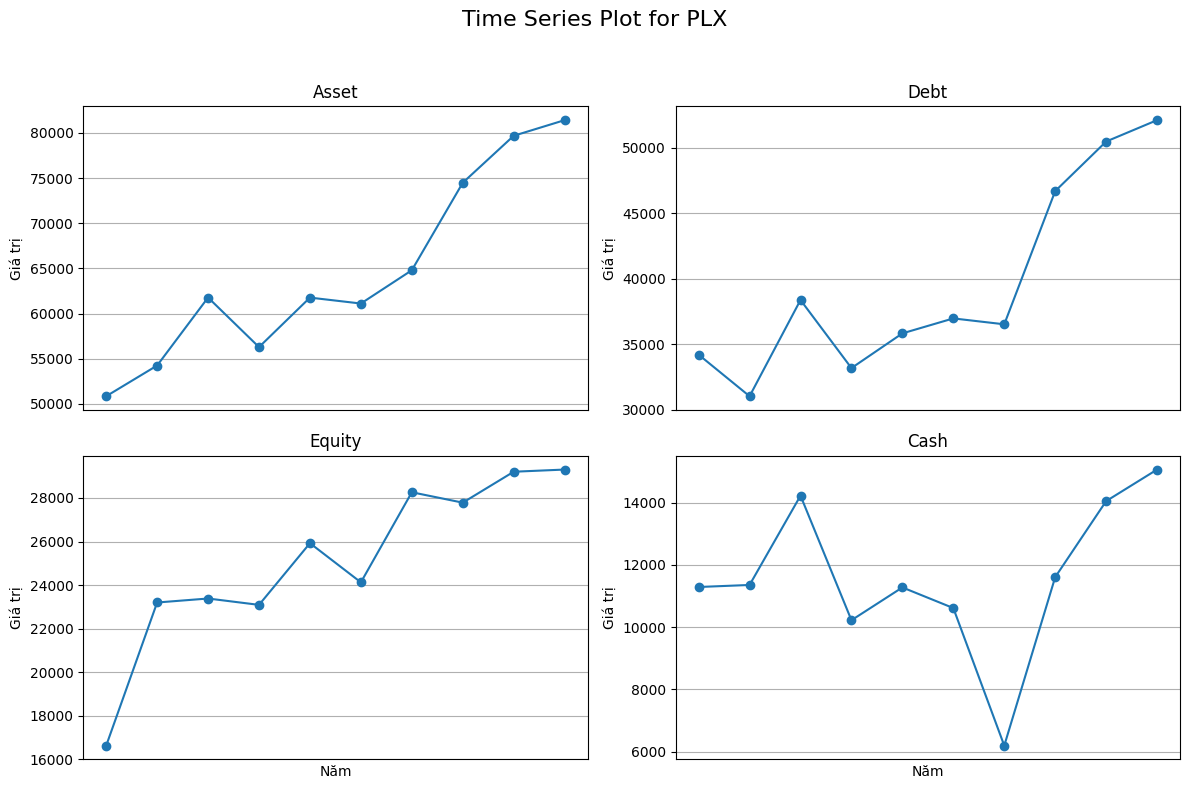

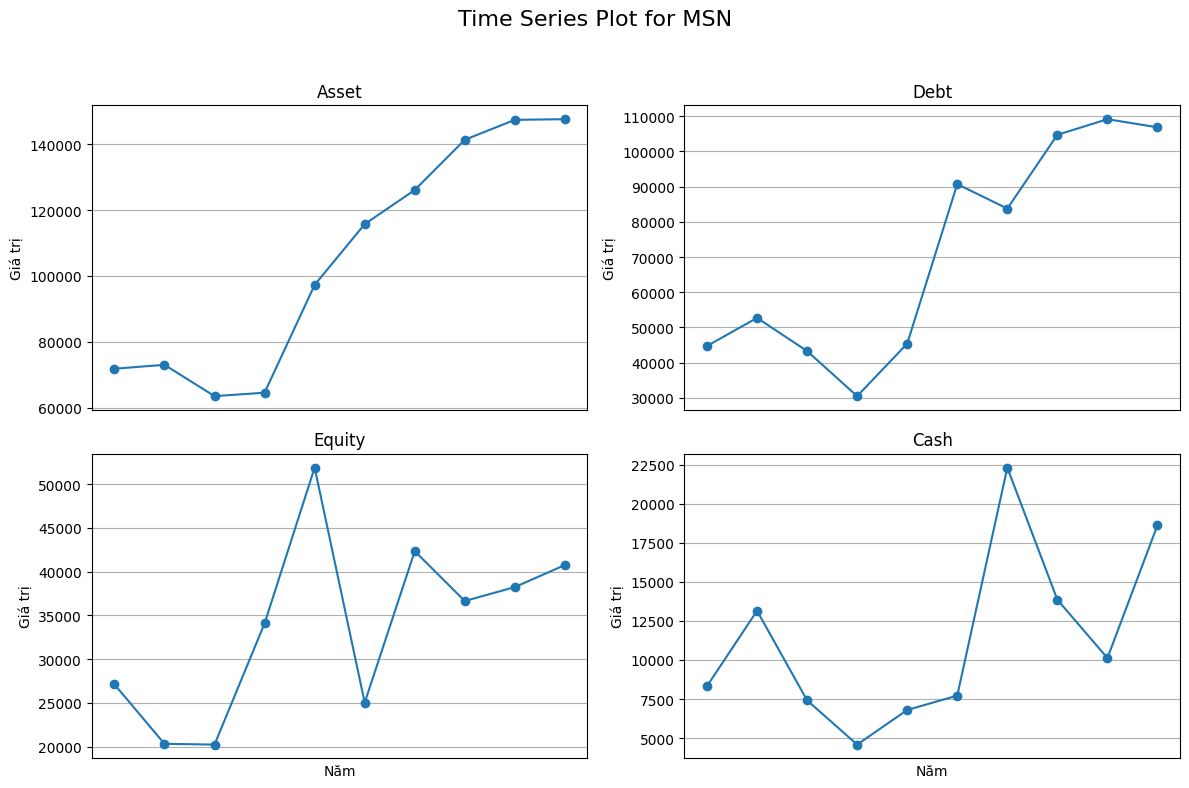

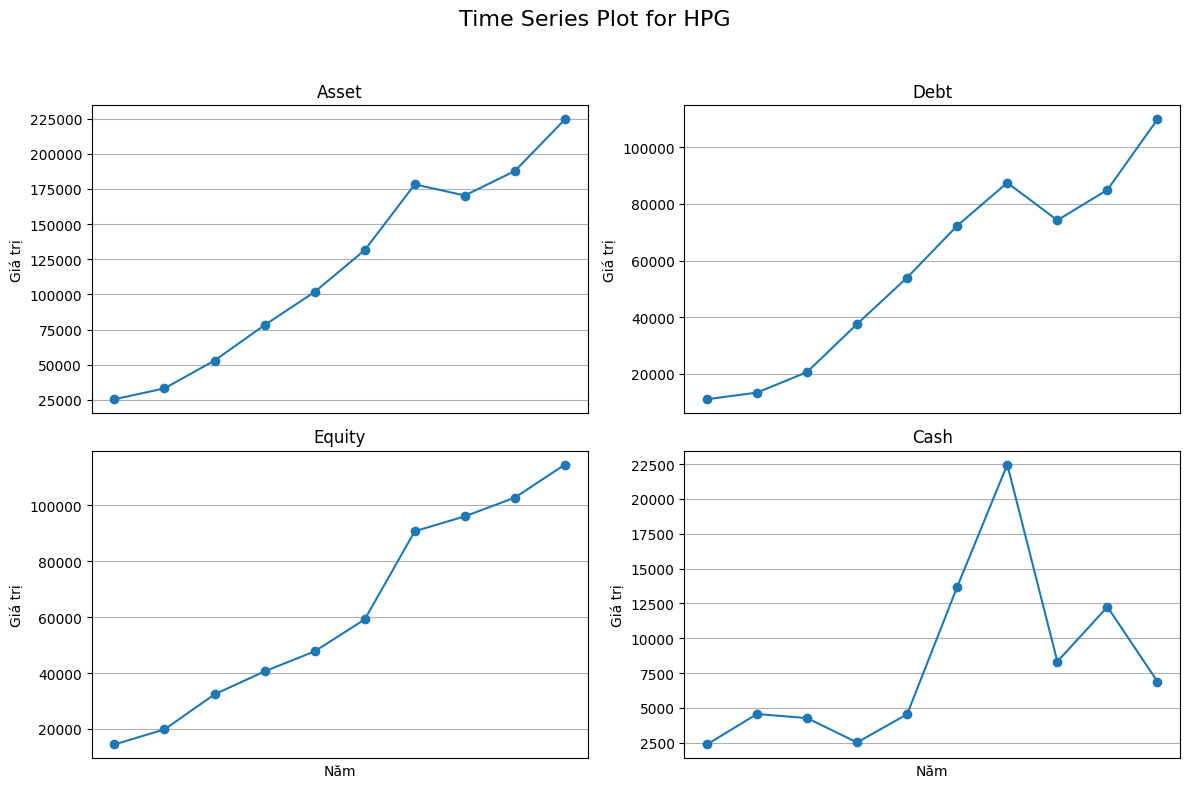

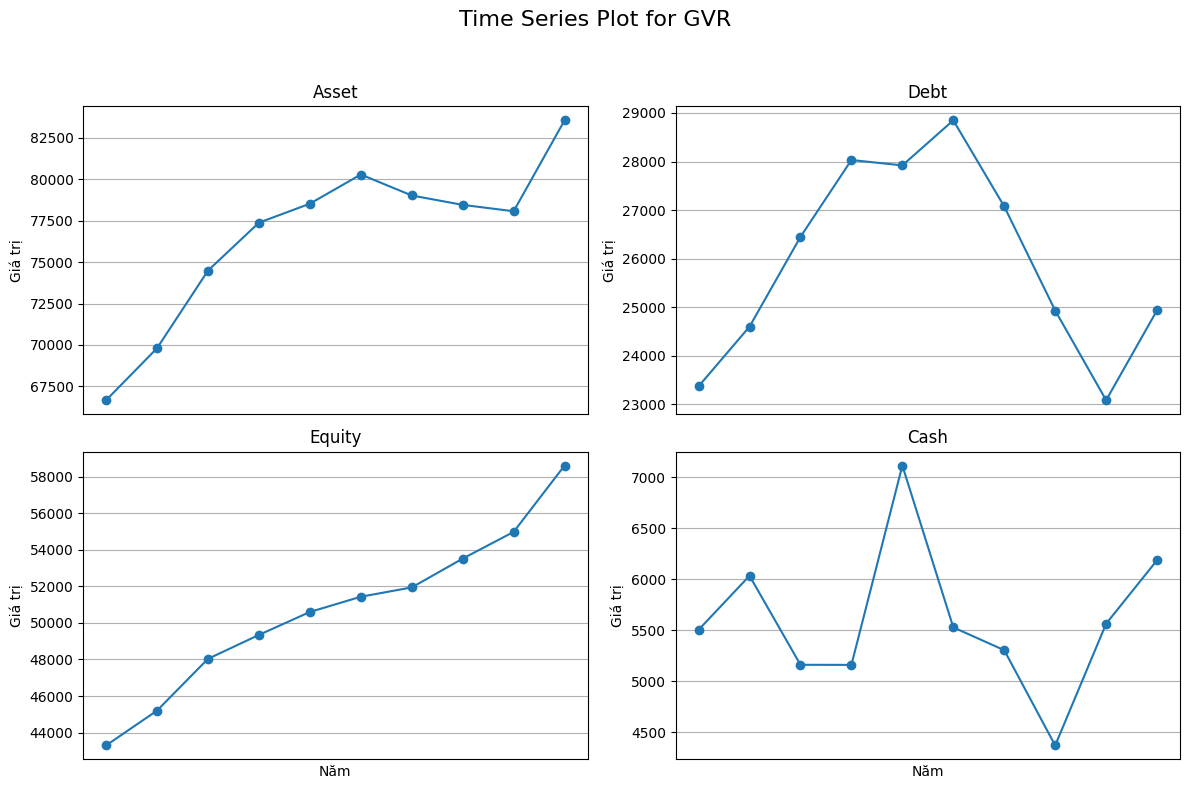

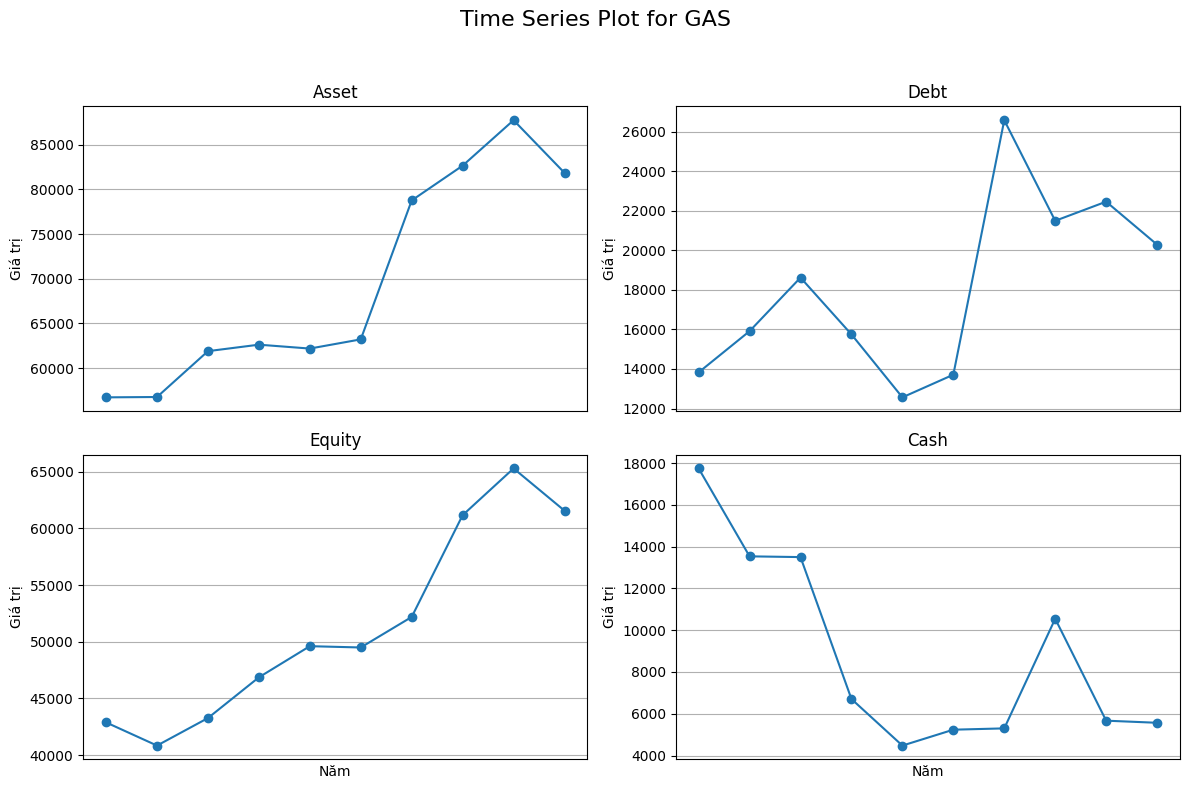

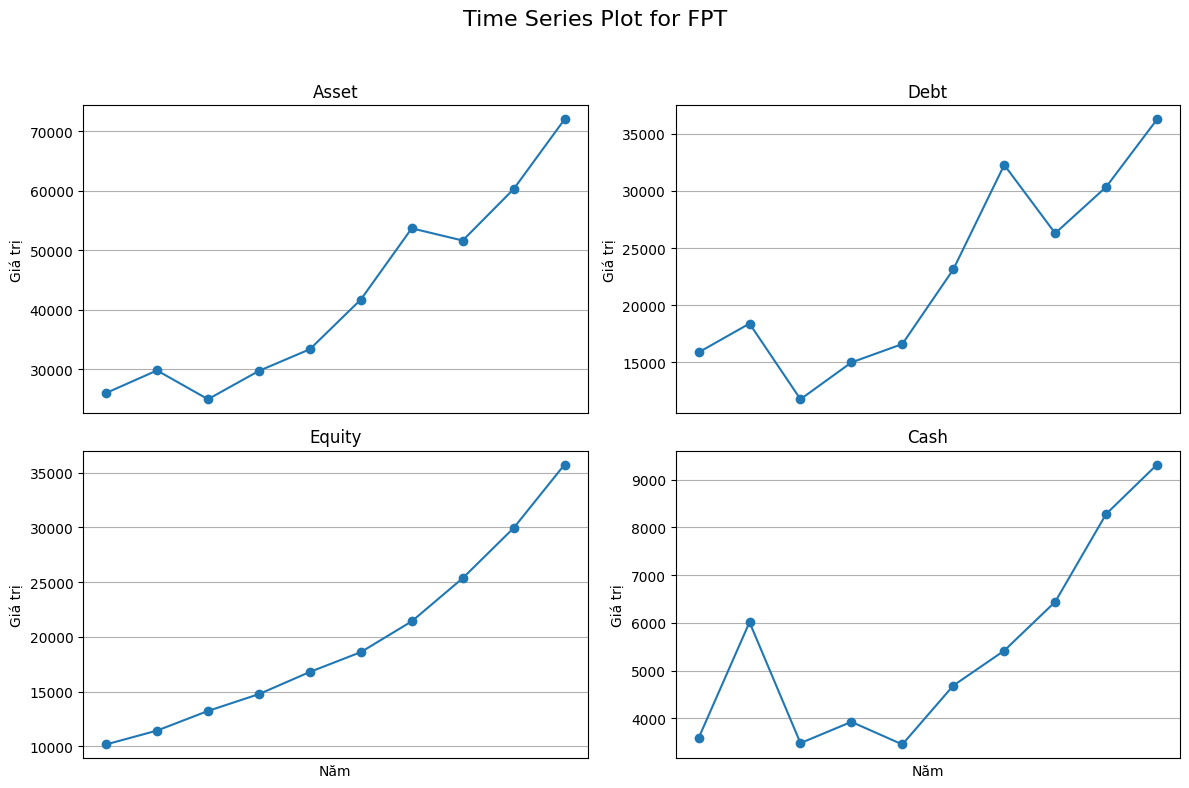

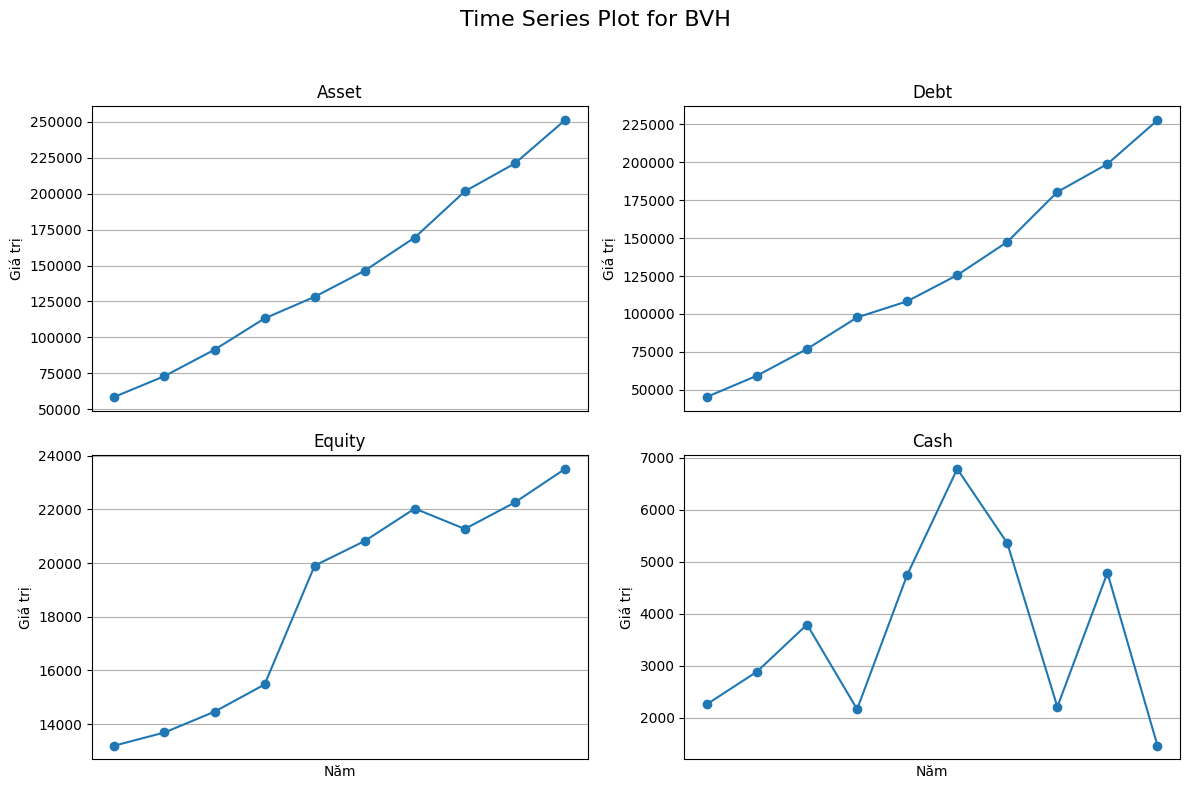

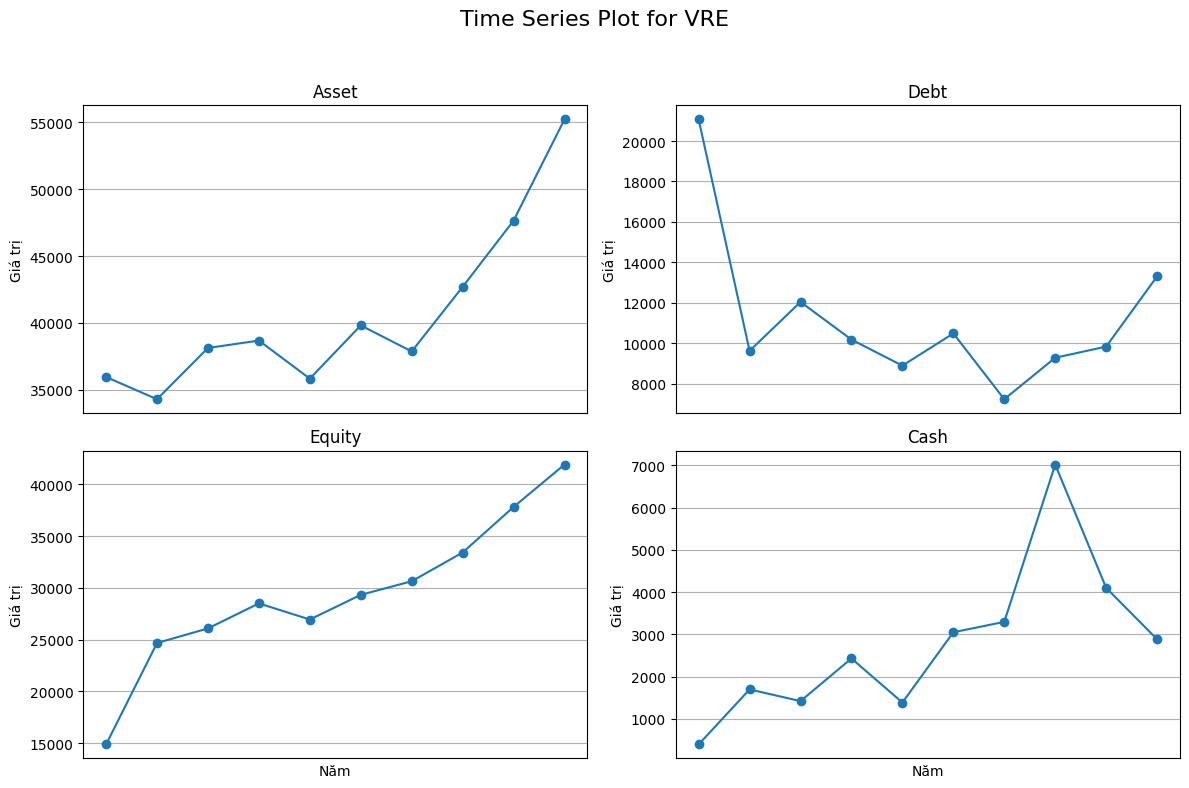

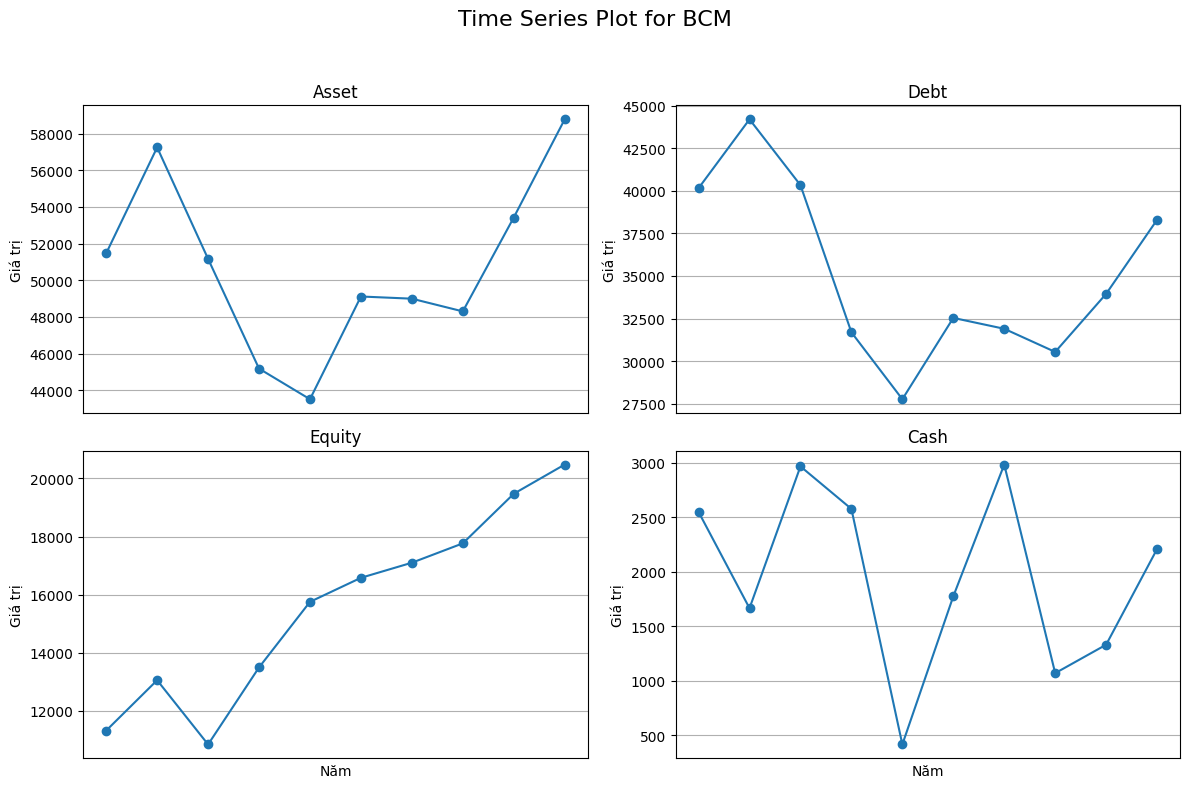

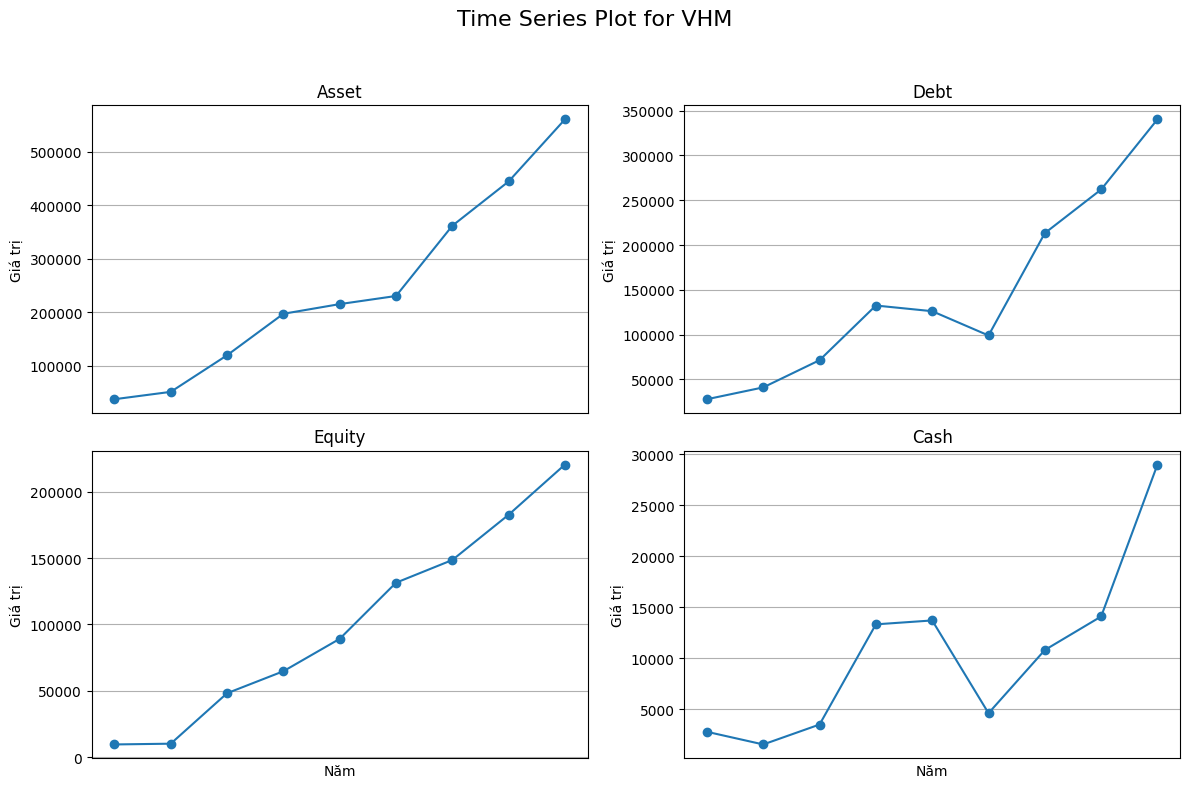

In [73]:
import matplotlib.pyplot as plt

# Chọn 4 chỉ số để vẽ trên grid 2x2
important_cols = ['asset', 'debt', 'equity', 'cash']

# Duyệt từng công ty
companies = df2['company'].unique()

for company in companies:
    company_data = df2[df2['company'] == company].sort_values('period')

    fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
    fig.suptitle(f"Time Series Plot for {company}", fontsize=16)

    for i, col in enumerate(important_cols):
        row, col_idx = divmod(i, 2)
        ax = axes[row, col_idx]
        ax.plot(company_data['period'], company_data[col], marker='o', linestyle='-')
        ax.set_title(col.title())
        ax.set_ylabel('Giá trị')
        ax.grid(True)

    axes[1, 0].set_xlabel('Năm')
    axes[1, 1].set_xlabel('Năm')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


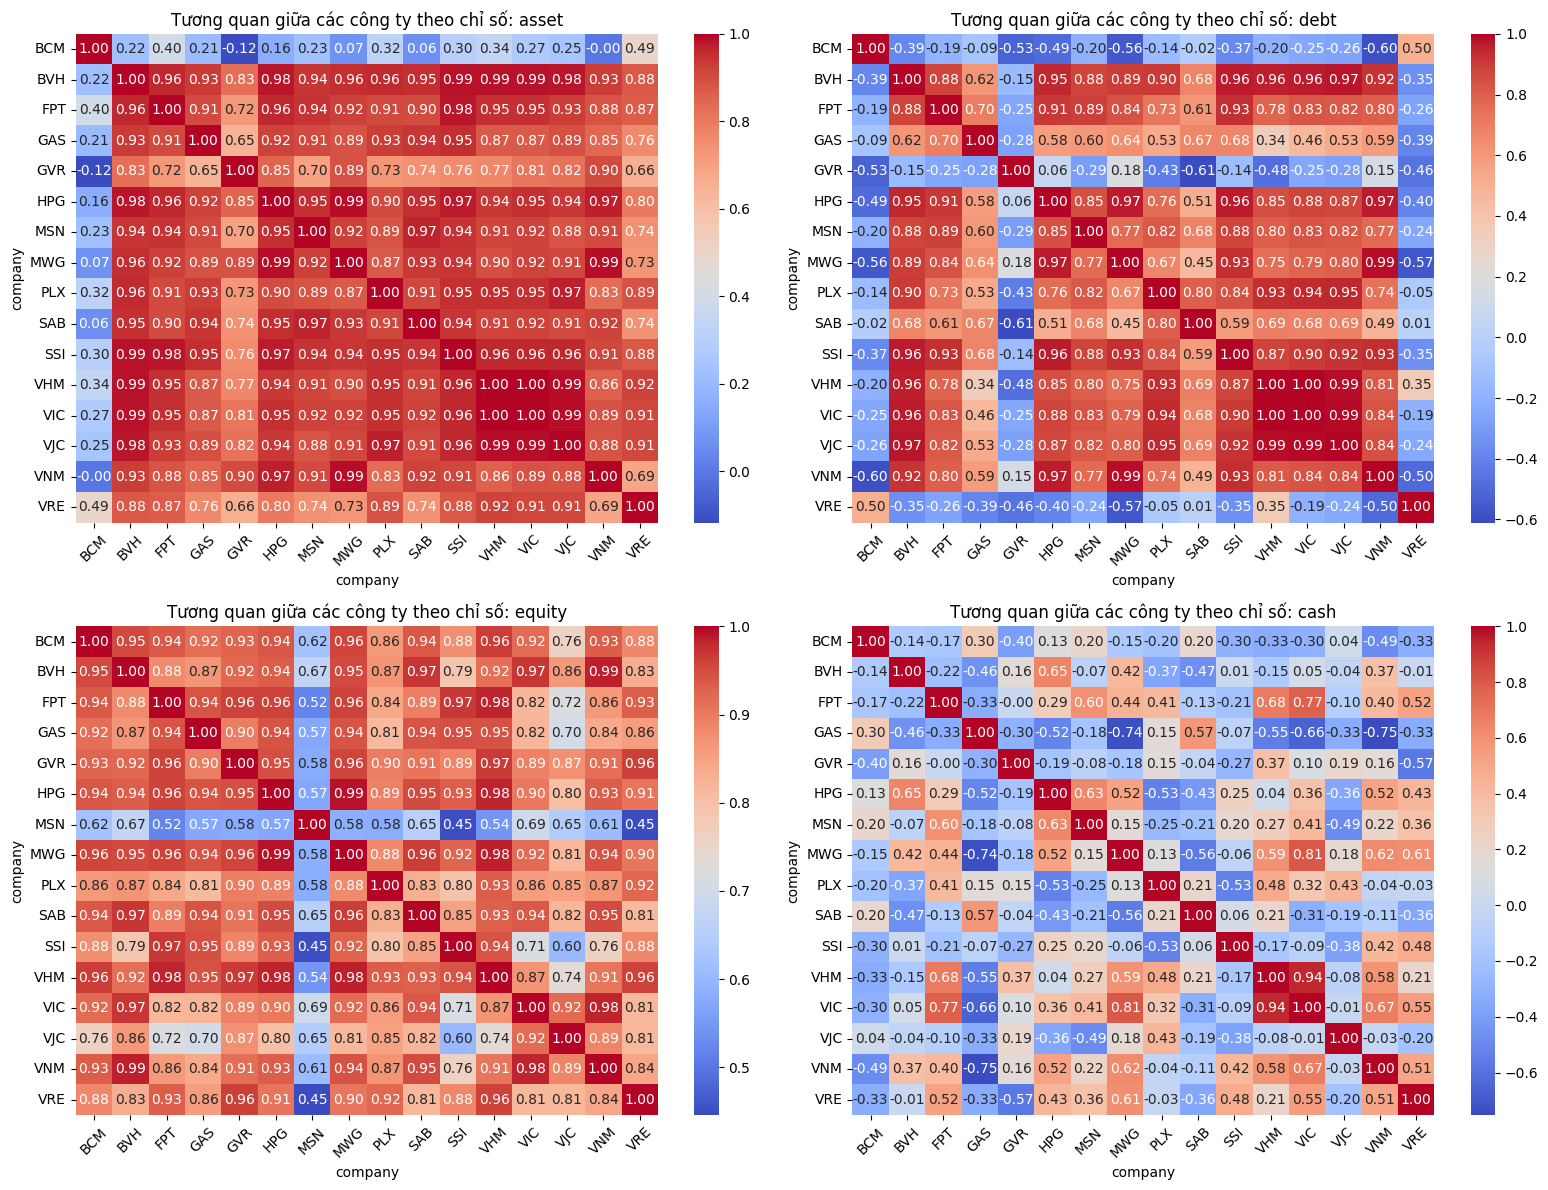

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy danh sách chỉ số quan trọng để trực quan hóa
features = ['asset', 'debt', 'equity', 'cash']

# Khởi tạo figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Vẽ từng heatmap trong subplot
for i, feature in enumerate(features):
    # Tạo ma trận tương quan giữa các công ty theo chỉ số `feature`
    corr = df2.pivot_table(index='period', columns='company', values=feature).corr()
    
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f"Tương quan giữa các công ty theo chỉ số: {feature}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


In [75]:
import pandas as pd
import numpy as np

# Giả sử df2 là DataFrame chứa dữ liệu các công ty phi ngân hàng
# Các cột của df2: ['company', 'period', 'short_asset', 'cash', 'short_invest',
# 'short_receivable', 'inventory', 'long_asset', 'fixed_asset', 'asset',
# 'debt', 'short_debt', 'long_debt', 'equity', 'capital', 'other_debt',
# 'un_distributed_income', 'minor_share_holder_profit', 'payable']

# Tính giá trị trung bình cho mỗi chỉ số theo từng công ty (điều này giúp giảm ảnh hưởng của biến động qua các kỳ)
df_summary = df2.groupby('company').mean().reset_index()

# Tính các chỉ số mới:

# 1. Debt-to-Equity Ratio: Thấp tốt (số thấp cho thấy rủi ro tài chính thấp)
df_summary['debt_to_equity'] = df_summary['debt'] / df_summary['equity']

# 2. Debt-to-Asset Ratio: Thấp tốt (phần trăm nợ so với tổng tài sản)
df_summary['debt_to_asset'] = df_summary['debt'] / df_summary['asset']

# 3. Capital Adequacy Ratio: Equity-to-Asset, cao tốt (cho biết tỷ lệ vốn chủ sở hữu so với tài sản)
df_summary['capital_adequacy'] = df_summary['equity'] / df_summary['asset']

# 4. Cash Ratio: cash / short_asset, cao tốt (khả năng thanh toán ngắn hạn)
df_summary['cash_ratio'] = df_summary['cash'] / df_summary['short_asset']

# 5. Working Capital Ratio: (short_asset - short_debt) / short_asset, cao tốt (khả năng thanh toán và duy trì hoạt động)
df_summary['working_capital_ratio'] = (df_summary['short_asset'] - df_summary['short_debt']) / df_summary['short_asset']

# -----------------------------------------------
# Xếp hạng từng chỉ số theo hướng ưu tiên:
# - Với Debt-to-Equity và Debt-to-Asset: giá trị thấp tốt → xếp hạng ascending.
# - Với Capital Adequacy, Cash Ratio, Working Capital Ratio: giá trị cao tốt → xếp hạng descending.
# -----------------------------------------------
df_summary['rank_debt_to_equity'] = df_summary['debt_to_equity'].rank(method='min', ascending=True)
df_summary['rank_debt_to_asset'] = df_summary['debt_to_asset'].rank(method='min', ascending=True)
df_summary['rank_capital_adequacy'] = df_summary['capital_adequacy'].rank(method='min', ascending=False)
df_summary['rank_cash_ratio'] = df_summary['cash_ratio'].rank(method='min', ascending=False)
df_summary['rank_working_capital'] = df_summary['working_capital_ratio'].rank(method='min', ascending=False)

# Tạo composite score: tổng điểm xếp hạng (càng thấp càng tốt)
df_summary['composite_score'] = (df_summary['rank_debt_to_equity'] + 
                                 df_summary['rank_debt_to_asset'] + 
                                 df_summary['rank_capital_adequacy'] + 
                                 df_summary['rank_cash_ratio'] + 
                                 df_summary['rank_working_capital'])

# Sắp xếp các công ty theo composite score (điểm thấp hơn là tốt hơn)
df_ranking = df_summary.sort_values('composite_score').reset_index(drop=True)

# Hiển thị bảng xếp hạng các công ty cùng với các chỉ số và composite score (làm tròn 3 chữ số)
print("Bảng xếp hạng các công ty phi ngân hàng dựa trên các chỉ số tài chính:")
print(df_ranking[['company', 'debt_to_equity', 'debt_to_asset', 'capital_adequacy', 
                  'cash_ratio', 'working_capital_ratio', 'composite_score']].round(3))



Bảng xếp hạng các công ty phi ngân hàng dựa trên các chỉ số tài chính:
   company  debt_to_equity  debt_to_asset  capital_adequacy  cash_ratio  \
0      GAS           0.353          0.261             0.739       0.195   
1      VRE           0.380          0.275             0.725       0.324   
2      SAB           0.392          0.282             0.718       0.231   
3      GVR           0.511          0.338             0.662       0.271   
4      VNM           0.454          0.312             0.688       0.070   
5      FPT           1.144          0.534             0.466       0.204   
6      PLX           1.576          0.612             0.388       0.273   
7      HPG           0.914          0.477             0.523       0.157   
8      VHM           1.453          0.592             0.408       0.077   
9      MSN           2.115          0.679             0.321       0.364   
10     MWG           1.834          0.647             0.353       0.113   
11     VIC           2.822   

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bỏ cột 'company' và 'period' khỏi đặc trưng đầu vào
df_ml = df2.drop(columns=['company', 'period'])

# Xử lý giá trị thiếu
df_ml = df_ml.fillna(df_ml.mean())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)

# Khởi tạo và huấn luyện KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Bạn có thể chọn số cụm khác
clusters = kmeans.fit_predict(X_scaled)

# Thêm nhãn cluster vào DataFrame gốc
df2['cluster'] = clusters

# Xem kết quả
print(df2[['company', 'period', 'cluster']].groupby(['company', 'cluster']).count())


                 period
company cluster        
BCM     2            10
BVH     2            10
FPT     2            10
GAS     2            10
GVR     2            10
HPG     0             5
        2             5
MSN     0             5
        2             5
MWG     2            10
PLX     2            10
SAB     2            10
SSI     2            10
VHM     0             5
        1             2
        2             2
VIC     0             4
        1             6
VJC     2            10
VNM     2            10
VRE     2            10


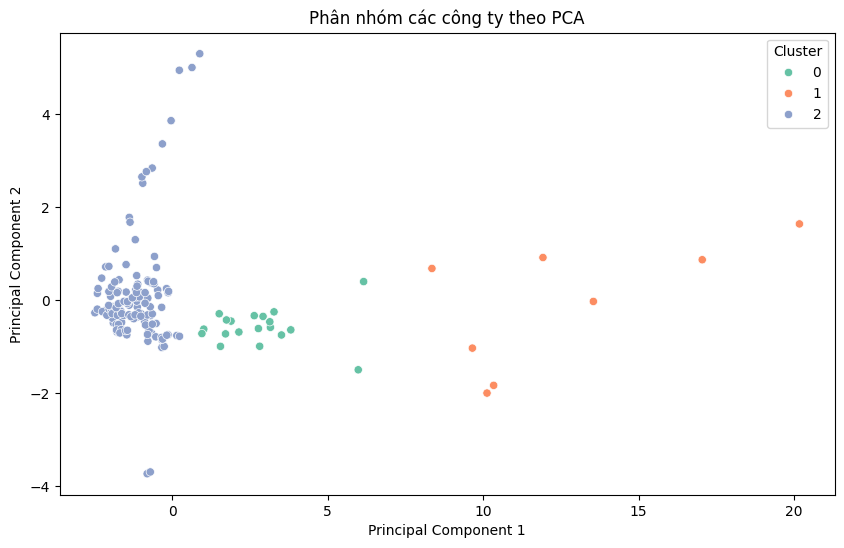

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2')
plt.title("Phân nhóm các công ty theo PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


## 📊 Phân tích ý nghĩa các nhóm `company cluster` (phân loại bằng KMeans)

### 📌 Cluster 2 — **Cụm chiếm đa số**
- Các công ty thuộc nhóm này: **BCM, BVH, FPT, GAS, GVR, MWG, PLX, SAB, SSI, VJC, VNM, VRE**
- **Đặc điểm nổi bật:**
  - Tài chính ổn định, tỷ lệ nợ/tài sản ở mức hợp lý
  - Lợi nhuận đều qua các năm, dòng tiền ổn định
  - Thường là các **công ty blue-chip** dẫn dắt thị trường
- ✅ **Gợi ý đầu tư:** Phù hợp với nhà đầu tư dài hạn, ưu tiên an toàn và tăng trưởng bền vững

---

### 📌 Cluster 0 — **Cụm biến động tài chính**
- Các công ty thuộc nhóm này: **HPG, MSN, VHM, VIC**
- Một số công ty như HPG, MSN, VHM có **giai đoạn nằm cả trong cluster 0 và 2** → thể hiện sự biến động theo thời gian
- **Đặc điểm nổi bật:**
  - Có thể có tỷ lệ đòn bẩy tài chính cao hơn
  - Hiệu suất lợi nhuận biến động theo năm
  - Có tiềm năng tăng trưởng nhưng rủi ro cũng cao hơn
- ⚠️ **Gợi ý đầu tư:** Phù hợp với nhà đầu tư có khẩu vị rủi ro cao, có thể đầu tư ngắn hạn hoặc đánh cược vào sự bứt phá

---

### 📌 Cluster 1 — **Cụm ít xuất hiện**
- Chỉ có **VHM và VIC** xuất hiện trong một vài giai đoạn
- **Đặc điểm nổi bật:**
  - Có thể là giai đoạn chuyển tiếp đặc biệt về tài chính (tăng trưởng nhanh, thay đổi cấu trúc vốn, lợi nhuận đột biến)
  - Cần phân tích kỹ từng năm cụ thể

- ⚠️ **Gợi ý đầu tư:** Nên kiểm tra chi tiết dữ liệu theo từng giai đoạn để xác định liệu đây là xu hướng tăng trưởng đột phá hay rủi ro tiềm ẩn

---

## 📈 Tổng kết gợi ý đầu tư theo nhóm
| Nhóm Cluster | Gợi ý đầu tư |
|---------------|--------------------------|
| Cluster 2     | Ưu tiên đầu tư dài hạn – công ty ổn định, tài chính vững mạnh |
| Cluster 0     | Có thể đầu tư ngắn hạn hoặc đầu cơ – biến động cao |
| Cluster 1     | Phân tích riêng từng năm – đánh giá rủi ro & cơ hội cụ thể |

---


In [78]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Giả sử df2 đã tồn tại
df2_econ = df2.copy()

# Tính các chỉ số kinh tế tài chính quan trọng
# ROA (Return on Assets): Lợi nhuận trên tài sản
df2_econ["ROA"] = df2_econ["minor_share_holder_profit"] / df2_econ["asset"]

# ROE (Return on Equity): Lợi nhuận trên vốn chủ sở hữu
df2_econ["ROE"] = df2_econ["minor_share_holder_profit"] / df2_econ["equity"]

# Debt to Equity Ratio: Tỷ lệ nợ trên vốn chủ sở hữu
df2_econ["Debt_to_Equity"] = df2_econ["debt"] / df2_econ["equity"]

# Asset Turnover Ratio: Hiệu suất sử dụng tài sản
df2_econ["Asset_Turnover"] = df2_econ["payable"] / df2_econ["asset"]

# Capital Adequacy: Mức độ đủ vốn = vốn điều lệ / tổng tài sản
df2_econ["Capital_Adequacy"] = df2_econ["capital"] / df2_econ["asset"]

# Tính trung bình các chỉ số theo công ty
ranking = df2_econ.groupby("company")[["ROA", "ROE", "Debt_to_Equity", "Asset_Turnover", "Capital_Adequacy"]].mean()

# Chuẩn hóa để xếp hạng tổng hợp
scaler = MinMaxScaler()
ranking_scaled = pd.DataFrame(scaler.fit_transform(ranking), columns=ranking.columns, index=ranking.index)

# Tính điểm tổng hợp trung bình
ranking_scaled["Score"] = ranking_scaled.mean(axis=1)

# Xếp hạng các công ty theo điểm
ranking_scaled = ranking_scaled.sort_values(by="Score", ascending=False).reset_index()

# In bảng xếp hạng
print(ranking_scaled.head(10))


  company       ROA       ROE  Debt_to_Equity  Asset_Turnover  \
0     VIC  1.000000  1.000000        0.400349        0.780680   
1     MSN  0.875839  0.792472        0.303472        0.673856   
2     BVH  0.062441  0.124777        1.000000        1.000000   
3     FPT  0.770394  0.479062        0.136242        0.464331   
4     VHM  0.504290  0.509686        0.253142        0.611099   
5     PLX  0.498376  0.370249        0.201654        0.588029   
6     GVR  0.591400  0.256299        0.026270        0.132955   
7     BCM  0.248517  0.250337        0.333529        0.723180   
8     VNM  0.403565  0.170843        0.014565        0.076521   
9     VJC  0.000000  0.000000        0.451220        0.798883   

   Capital_Adequacy     Score  
0          0.070409  0.650288  
1          0.122242  0.553576  
2          0.000000  0.437444  
3          0.272896  0.424585  
4          0.147544  0.405152  
5          0.291942  0.390050  
6          0.844573  0.370299  
7          0.275102  0.36613

# 📊 Đánh Giá Các Công Ty Phi Ngân Hàng Dựa Trên Chỉ Số Tài Chính

## 🔹 Bảng xếp hạng theo các chỉ số tài chính tổng hợp

| Thứ hạng | Công ty | Tỷ lệ nợ/vốn chủ sở hữu | Tỷ lệ nợ/tổng tài sản | Mức độ đủ vốn | Tỷ lệ tiền mặt | Hệ số vốn lưu động | Composite Score |
|---------|---------|--------------------------|------------------------|----------------|----------------|---------------------|------------------|
| 1 | GAS | 0.353 | 0.261 | 0.739 | 0.195 | 0.975 | **12.0** |
| 1 | VRE | 0.380 | 0.275 | 0.725 | 0.324 | 0.905 | **12.0** |
| 3 | SAB | 0.392 | 0.282 | 0.718 | 0.231 | 0.968 | **17.0** |
| 4 | GVR | 0.511 | 0.338 | 0.662 | 0.271 | 0.841 | **25.0** |
| 5 | VNM | 0.454 | 0.312 | 0.688 | 0.070 | 0.822 | **32.0** |
| 6 | FPT | 1.144 | 0.534 | 0.466 | 0.204 | 0.609 | 40.0 |
| 6 | PLX | 1.576 | 0.612 | 0.388 | 0.273 | 0.670 | 40.0 |
| 8 | HPG | 0.914 | 0.477 | 0.523 | 0.157 | 0.444 | 41.0 |
| 8 | VHM | 1.453 | 0.592 | 0.408 | 0.077 | 0.892 | 41.0 |
|10 | MSN | 2.115 | 0.679 | 0.321 | 0.364 | 0.386 | 52.0 |
|11 | MWG | 1.834 | 0.647 | 0.353 | 0.113 | 0.629 | 55.0 |
|12 | VIC | 2.822 | 0.738 | 0.262 | 0.103 | 0.806 | 61.0 |
|13 | BCM | 2.255 | 0.693 | 0.307 | 0.062 | 0.759 | 62.0 |
|13 | SSI | 1.727 | 0.633 | 0.367 | 0.019 | 0.379 | 62.0 |
|15 | BVH | 6.793 | 0.872 | 0.128 | 0.046 | 0.986 | 64.0 |
|15 | VJC | 3.014 | 0.751 | 0.249 | 0.159 | 0.665 | 64.0 |

### 📌 Nhận xét:
- **GAS và VRE** nổi bật với composite score thấp nhất, cho thấy mức độ tài chính lành mạnh, tỷ lệ nợ hợp lý và khả năng thanh toán ngắn hạn tốt.
- **SAB** cũng là một lựa chọn ổn định với chỉ số tốt và mức rủi ro thấp.
- **FPT, PLX, HPG** nằm ở nhóm giữa, thể hiện mức độ đòn bẩy tài chính cao hơn nhưng vẫn có chỉ số vốn lưu động khá.
- Các công ty như **VIC, BVH, SSI, VJC** có **composite score cao**, nghĩa là rủi ro tài chính lớn hơn, cần thận trọng nếu cân nhắc đầu tư.

---

## 🔸 Xếp hạng theo chỉ số sinh lời và hiệu suất sử dụng tài sản

| Công ty | ROA | ROE | Debt_to_Equity | Asset Turnover | Capital Adequacy | Tổng điểm (Score) |
|--------|-----|-----|----------------|----------------|------------------|--------------------|
| VIC | **1.000** | **1.000** | 0.400 | **0.781** | 0.070 | **0.650** |
| MSN | 0.876 | 0.792 | 0.303 | 0.674 | 0.122 | 0.554 |
| BVH | 0.062 | 0.125 | **1.000** | **1.000** | 0.000 | 0.437 |
| FPT | 0.770 | 0.479 | 0.136 | 0.464 | 0.273 | 0.425 |
| VHM | 0.504 | 0.510 | 0.253 | 0.611 | 0.148 | 0.405 |
| PLX | 0.498 | 0.370 | 0.202 | 0.588 | 0.292 | 0.390 |
| GVR | 0.591 | 0.256 | 0.026 | 0.133 | 0.845 | 0.370 |
| BCM | 0.249 | 0.250 | 0.334 | 0.723 | 0.275 | 0.366 |
| VNM | 0.404 | 0.171 | 0.015 | 0.077 | 0.755 | 0.284 |
| VJC | 0.000 | 0.000 | 0.451 | 0.799 | 0.101 | 0.270 |

### 📌 Nhận xét:
- **VIC và MSN** có ROA và ROE cao nhất, thể hiện hiệu quả sinh lời rất tốt.
- **FPT** có chỉ số ROA khá cao cùng tỷ lệ nợ/vốn thấp – là công ty tăng trưởng đáng chú ý.
- **BVH** tuy có hiệu suất tài sản cao nhưng tỷ lệ sinh lời thấp, cho thấy lợi nhuận không tương xứng với quy mô tài sản.

---

## ✅ Kết luận đề xuất đầu tư:
- **Ưu tiên đầu tư dài hạn:** GAS, VRE, FPT *(ổn định tài chính, mức rủi ro thấp)*.
- **Đầu tư tăng trưởng có kiểm soát:** VIC, MSN *(sinh lời cao, nhưng cần theo dõi tỷ lệ nợ)*.
- **Cần cân nhắc kỹ trước khi đầu tư:** SSI, VJC, BVH *(rủi ro tài chính cao hoặc sinh lời thấp)*.


## Kiểm chứng giả thuyết

In [79]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

# --- Giả sử df2 đã có sẵn dữ liệu với các cột:
# ['company', 'period', 'short_asset', 'cash', 'short_invest', 'short_receivable', 
#  'inventory', 'long_asset', 'fixed_asset', 'asset', 'debt', 'short_debt', 'long_debt', 
#  'equity', 'capital', 'other_debt', 'un_distributed_income', 'minor_share_holder_profit', 'payable']

# Tính thêm các chỉ số tài chính cơ bản cho df2:
df2_econ = df2.copy()

# ROA (Return on Assets): Lợi nhuận trên tổng tài sản  
# (Ở đây dùng lợi nhuận của cổ đông thiểu số làm proxy cho lợi nhuận; nếu có số liệu lợi nhuận khác, thay thế phù hợp)
df2_econ["ROA"] = df2_econ["minor_share_holder_profit"] / df2_econ["asset"]

# ROE (Return on Equity): Lợi nhuận trên vốn chủ sở hữu  
df2_econ["ROE"] = df2_econ["minor_share_holder_profit"] / df2_econ["equity"]

# Debt-to-Equity Ratio: Tỷ lệ nợ trên vốn chủ sở hữu (thấp tốt)
df2_econ["Debt_to_Equity"] = df2_econ["debt"] / df2_econ["equity"]

# Debt-to-Asset Ratio: Tỷ lệ nợ trên tổng tài sản (thấp tốt)
df2_econ["Debt_to_Asset"] = df2_econ["debt"] / df2_econ["asset"]

# Capital Adequacy Ratio (Equity-to-Asset): Vốn chủ sở hữu trên tổng tài sản (cao tốt)
df2_econ["Capital_Adequacy"] = df2_econ["equity"] / df2_econ["asset"]

# Cash Ratio: Khả năng thanh toán ngắn hạn = cash / short_asset (cao tốt)
df2_econ["Cash_Ratio"] = df2_econ["cash"] / df2_econ["short_asset"]

# Working Capital Ratio: (short_asset - short_debt) / short_asset (cao tốt)
df2_econ["Working_Capital_Ratio"] = (df2_econ["short_asset"] - df2_econ["short_debt"]) / df2_econ["short_asset"]

# Composite Score: Tổng hợp các chỉ số tài chính (sử dụng các tỷ lệ ưu tiên về rủi ro & hiệu quả)
# Ở đây ta sử dụng các chỉ số: Debt_to_Equity, Debt_to_Asset, Capital_Adequacy, Cash_Ratio, Working_Capital_Ratio
# Với Debt_to_Equity và Debt_to_Asset: giá trị thấp tốt, ngược lại với Capital_Adequacy, Cash_Ratio, Working_Capital_Ratio: giá trị cao tốt.
# Để xếp hạng tổng hợp, ta sẽ nhóm theo trung vị và sau đó tính điểm (hoặc bạn có thể chuẩn hóa và gộp điểm).
# Ở đây, ta sẽ chuẩn hóa các chỉ số này rồi tính trung bình điểm.

# Lấy danh sách các chỉ số dùng để xếp hạng
ranking_features = ["Debt_to_Equity", "Debt_to_Asset", "Capital_Adequacy", "Cash_Ratio", "Working_Capital_Ratio"]

# Tính trung bình theo công ty (giả sử các giá trị qua các kỳ được trung bình lại)
df_ranking = df2_econ.groupby("company")[ranking_features + ["ROA", "ROE"]].mean()

# Chuẩn hóa các chỉ số để đưa về thang điểm 0-1
scaler = MinMaxScaler()
ranking_scaled = pd.DataFrame(scaler.fit_transform(df_ranking[ranking_features]),
                              columns=ranking_features, index=df_ranking.index)

# Với Debt_to_Equity và Debt_to_Asset, giá trị thấp tốt nên ta chuyển ngược lại điểm (1 - normalized_value)
for col in ["Debt_to_Equity", "Debt_to_Asset"]:
    ranking_scaled[col] = 1 - ranking_scaled[col]

# Tính Composite Score là trung bình cộng của các chỉ số đã chuẩn hóa
ranking_scaled["Composite_Score"] = ranking_scaled.mean(axis=1)

# Thêm ROA và ROE vào bảng xếp hạng
df_ranking = df_ranking.join(ranking_scaled[["Composite_Score"]])
df_ranking.reset_index(inplace=True)

print("Bảng xếp hạng các công ty phi ngân hàng dựa trên các chỉ số tài chính:")
print(df_ranking.sort_values("Composite_Score", ascending=False).round(3))


# -------------------------------------------------
# GIẢ THUYẾT KIỂM ĐỊNH
# -------------------------------------------------
# Chúng ta sẽ kiểm định một số giả thuyết dựa trên các chỉ số sau:
#
# Hypothesis 1: Companies with lower Debt-to-Equity ratios have higher profitability (ROA).
#   - Chia công ty theo trung vị của Debt_to_Equity (nhóm thấp vs. nhóm cao) và so sánh ROA.
#
# Hypothesis 2: Companies with higher Asset Turnover have higher profitability (ROA).
#   - Giả sử Asset Turnover = payable / asset.
df2_econ["Asset_Turnover"] = df2_econ["payable"] / df2_econ["asset"]
asset_turnover = df2_econ.groupby("company")["Asset_Turnover"].mean()

# Thêm Asset_Turnover vào df_ranking
df_ranking = df_ranking.set_index("company").join(asset_turnover).reset_index()

# Hypothesis 3: Companies with higher Cash Ratio have higher Working Capital Ratios.
#   - Chia công ty theo trung vị của Cash_Ratio và so sánh Working_Capital_Ratio.
#
# Hypothesis 4: Companies with higher Composite Score (indicating better overall financial health) have higher ROE.
#   - Chia công ty theo trung vị của Composite_Score và so sánh ROE.

# Để kiểm định, ta dùng bài kiểm tra Mann–Whitney U test cho mỗi giả thuyết.

def mann_whitney_test(df, group_var, outcome_var, group_label="High"):
    """
    df: DataFrame có cột group_var và outcome_var
    group_var: tên biến dùng để phân nhóm (chuyển đổi thành nhị phân dựa trên median)
    outcome_var: biến cần so sánh
    group_label: nếu 'High', giả thuyết là nhóm giá trị cao của group_var có outcome_var cao hơn
    """
    median_val = df[group_var].median()
    if group_label == "High":
        group_high = df[df[group_var] > median_val]
        group_low = df[df[group_var] <= median_val]
        alternative = 'greater'
    else:
        group_high = df[df[group_var] <= median_val]
        group_low = df[df[group_var] > median_val]
        alternative = 'greater'
    stat, p_val = stats.mannwhitneyu(group_high[outcome_var], group_low[outcome_var], alternative=alternative)
    return median_val, stat, p_val

# Hypothesis 1: Lower Debt-to-Equity -> Higher ROA
median_debt_equity, stat1, p_val1 = mann_whitney_test(df_ranking, "Debt_to_Equity", "ROA", group_label="Low")
# (Ở đây "Low" có nghĩa giá trị thấp tốt, nên chúng ta đảo lại so sánh: nhóm có Debt_to_Equity thấp (<= median) có ROA cao hơn)
print("\n=== Hypothesis 1 ===")
print("Companies with lower Debt-to-Equity ratios have higher ROA.")
print(f"Median Debt-to-Equity = {median_debt_equity:.3f}, Test statistic = {stat1:.3f}, p-value = {p_val1:.3f}")

# Hypothesis 2: Higher Asset Turnover -> Higher ROA
median_asset_turnover, stat2, p_val2 = mann_whitney_test(df_ranking, "Asset_Turnover", "ROA", group_label="High")
print("\n=== Hypothesis 2 ===")
print("Companies with higher Asset Turnover have higher ROA.")
print(f"Median Asset Turnover = {median_asset_turnover:.3f}, Test statistic = {stat2:.3f}, p-value = {p_val2:.3f}")

# Hypothesis 3: Higher Cash Ratio -> Higher Working Capital Ratio
median_cash_ratio, stat3, p_val3 = mann_whitney_test(df_ranking, "Cash_Ratio", "Working_Capital_Ratio", group_label="High")
print("\n=== Hypothesis 3 ===")
print("Companies with higher Cash Ratios have higher Working Capital Ratios.")
print(f"Median Cash Ratio = {median_cash_ratio:.3f}, Test statistic = {stat3:.3f}, p-value = {p_val3:.3f}")

# Hypothesis 4: Higher Composite Score -> Higher ROE
median_composite, stat4, p_val4 = mann_whitney_test(df_ranking, "Composite_Score", "ROE", group_label="High")
print("\n=== Hypothesis 4 ===")
print("Companies with higher Composite Scores (better overall financial health) have higher ROE.")
print(f"Median Composite Score = {median_composite:.3f}, Test statistic = {stat4:.3f}, p-value = {p_val4:.3f}")

# In ra bảng tổng hợp các giả thuyết và kết quả kiểm định


Bảng xếp hạng các công ty phi ngân hàng dựa trên các chỉ số tài chính:
   company  Debt_to_Equity  Debt_to_Asset  Capital_Adequacy  Cash_Ratio  \
15     VRE           0.440          0.281             0.719       0.325   
9      SAB           0.410          0.288             0.712       0.262   
3      GAS           0.354          0.260             0.740       0.217   
4      GVR           0.515          0.339             0.661       0.282   
14     VNM           0.443          0.305             0.695       0.069   
2      FPT           1.187          0.537             0.463       0.205   
8      PLX           1.587          0.611             0.389       0.281   
5      HPG           0.887          0.465             0.535       0.164   
11     VHM           1.902          0.624             0.376       0.082   
6      MSN           2.209          0.662             0.338       0.385   
7      MWG           2.069          0.665             0.335       0.115   
12     VIC           2.802   

### 📊 Nhận xét về Kết quả Kiểm định Giả thuyết

#### **Hypothesis 1: Companies with lower Debt-to-Equity ratios have higher ROA**
- **Giá trị trung vị Debt-to-Equity:** 1.618  
- **Test statistic:** 35.000  
- **p-value:** 0.399  

➡️ **Nhận xét:** Không có đủ bằng chứng thống kê để bác bỏ giả thuyết rỗng. Với p-value > 0.05, không có mối quan hệ đáng kể giữa tỷ lệ nợ trên vốn chủ sở hữu thấp và ROA cao.

---

#### **Hypothesis 2: Companies with higher Asset Turnover have higher ROA**
- **Giá trị trung vị Asset Turnover:** 0.606  
- **Test statistic:** 35.000  
- **p-value:** 0.399  

➡️ **Nhận xét:** Tương tự như Hypothesis 1, p-value cao cho thấy không có bằng chứng thống kê mạnh mẽ để kết luận rằng Asset Turnover cao có liên hệ với ROA cao.

---

#### **Hypothesis 3: Companies with higher Cash Ratios have higher Working Capital Ratios**
- **Giá trị trung vị Cash Ratio:** 0.175  
- **Test statistic:** 32.000  
- **p-value:** 0.520  

➡️ **Nhận xét:** Với p-value lớn hơn 0.05, kết quả kiểm định không chỉ ra mối quan hệ có ý nghĩa giữa Cash Ratio cao và Working Capital Ratio cao.

---

#### **Hypothesis 4: Companies with higher Composite Scores (better overall financial health) have higher ROE**
- **Giá trị trung vị Composite Score:** 0.522  
- **Test statistic:** 29.000  
- **p-value:** 0.640  

➡️ **Nhận xét:** Đây là giả thuyết có p-value cao nhất trong bốn giả thuyết, cho thấy không có mối liên hệ rõ ràng giữa Composite Score cao và ROE cao trong dữ liệu này.


In [80]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

# Giả sử df_ranking là DataFrame tổng hợp các chỉ số tài chính trung bình theo công ty phi ngân hàng
# df_ranking chứa các cột như: 'company', 'ROA', 'ROE', 'Debt_to_Equity', 'Debt_to_Asset', 
# 'Capital_Adequacy', 'Cash_Ratio', 'Working_Capital_Ratio', 'Asset_Turnover', 'Composite_Score', ...

# -------------------------------------------
# Hypothesis 5:
# Companies in the top quartile of Capital Adequacy have higher ROE than those in the bottom quartile.
# Capital Adequacy = equity / asset; giá trị cao thể hiện nền tảng tài chính vững mạnh.
# -------------------------------------------
quartiles_cap = df_ranking['Capital_Adequacy'].quantile([0.25, 0.75])
Q1_cap = quartiles_cap.loc[0.25]
Q3_cap = quartiles_cap.loc[0.75]

group_bottom_cap = df_ranking[df_ranking['Capital_Adequacy'] <= Q1_cap]
group_top_cap = df_ranking[df_ranking['Capital_Adequacy'] >= Q3_cap]

stat5, p_val5 = stats.mannwhitneyu(group_top_cap['ROE'], group_bottom_cap['ROE'], alternative='greater')

print("=== Hypothesis 5 ===")
print("Companies in the top quartile of Capital Adequacy have higher ROE than those in the bottom quartile.")
print(f"Median Capital Adequacy = {df_ranking['Capital_Adequacy'].median():.3f}")
print(f"Test statistic = {stat5:.3f}, p-value = {p_val5:.3f}\n")

# -------------------------------------------
# Hypothesis 6:
# Companies in the top quartile of Working Capital Ratio have higher Cash Ratio than those in the bottom quartile.
# Working Capital Ratio = (short_asset - short_debt) / short_asset; cao tốt vì cho thấy khả năng thanh toán.
# Cash Ratio = cash / short_asset; cao tốt vì có nhiều tiền mặt.
# -------------------------------------------
quartiles_wc = df_ranking['Working_Capital_Ratio'].quantile([0.25, 0.75])
Q1_wc = quartiles_wc.loc[0.25]
Q3_wc = quartiles_wc.loc[0.75]

group_bottom_wc = df_ranking[df_ranking['Working_Capital_Ratio'] <= Q1_wc]
group_top_wc = df_ranking[df_ranking['Working_Capital_Ratio'] >= Q3_wc]

stat6, p_val6 = stats.mannwhitneyu(group_top_wc['Cash_Ratio'], group_bottom_wc['Cash_Ratio'], alternative='greater')

print("=== Hypothesis 6 ===")
print("Companies in the top quartile of Working Capital Ratio have higher Cash Ratio than those in the bottom quartile.")
print(f"Median Working Capital Ratio = {df_ranking['Working_Capital_Ratio'].median():.3f}")
print(f"Test statistic = {stat6:.3f}, p-value = {p_val6:.3f}\n")

# -------------------------------------------
# Hypothesis 7:
# There is a significant difference in Asset Turnover among companies grouped by Debt-to-Asset ratio.
# Giả sử: Asset Turnover = payable / asset.
# Chia công ty thành 3 nhóm theo Debt-to-Asset: Low, Medium, High.
# -------------------------------------------
low_threshold = df_ranking['Debt_to_Asset'].quantile(0.33)
high_threshold = df_ranking['Debt_to_Asset'].quantile(0.67)

group_low_dta = df_ranking[df_ranking['Debt_to_Asset'] <= low_threshold]['Asset_Turnover']
group_mid_dta = df_ranking[(df_ranking['Debt_to_Asset'] > low_threshold) & (df_ranking['Debt_to_Asset'] <= high_threshold)]['Asset_Turnover']
group_high_dta = df_ranking[df_ranking['Debt_to_Asset'] > high_threshold]['Asset_Turnover']

stat7, p_val7 = stats.kruskal(group_low_dta, group_mid_dta, group_high_dta)

print("=== Hypothesis 7 ===")
print("There is a significant difference in Asset Turnover among companies grouped by Debt-to-Asset ratio (Low, Medium, High).")
print(f"Kruskal-Wallis test statistic = {stat7:.3f}, p-value = {p_val7:.3f}\n")


=== Hypothesis 5 ===
Companies in the top quartile of Capital Adequacy have higher ROE than those in the bottom quartile.
Median Capital Adequacy = 0.394
Test statistic = 6.000, p-value = 0.757

=== Hypothesis 6 ===
Companies in the top quartile of Working Capital Ratio have higher Cash Ratio than those in the bottom quartile.
Median Working Capital Ratio = 0.796
Test statistic = 10.000, p-value = 0.343

=== Hypothesis 7 ===
There is a significant difference in Asset Turnover among companies grouped by Debt-to-Asset ratio (Low, Medium, High).
Kruskal-Wallis test statistic = 13.346, p-value = 0.001



### 📊 Nhận xét kết quả kiểm định các giả thuyết kinh tế (Không sử dụng tương quan)

#### **Hypothesis 5:**
**Các công ty trong nhóm Capital Adequacy cao nhất có ROE cao hơn các công ty trong nhóm thấp nhất.**

- **Kết quả kiểm định:**
  - Median Capital Adequacy = 0.394  
  - Test statistic = 6.000  
  - p-value = 0.757

- **Nhận xét:**  
  Với p-value = 0.757 > 0.05, **không đủ bằng chứng thống kê để kết luận rằng các công ty có Capital Adequacy cao hơn thì ROE cũng cao hơn**. Điều này cho thấy yếu tố Capital Adequacy không có ảnh hưởng rõ rệt đến khả năng sinh lời trên vốn chủ sở hữu trong mẫu dữ liệu này.

---

#### **Hypothesis 6:**
**Các công ty trong nhóm Working Capital Ratio cao nhất có Cash Ratio cao hơn các công ty trong nhóm thấp nhất.**

- **Kết quả kiểm định:**
  - Median Working Capital Ratio = 0.796  
  - Test statistic = 10.000  
  - p-value = 0.343

- **Nhận xét:**  
  Với p-value = 0.343 > 0.05, **không đủ bằng chứng để khẳng định rằng Working Capital Ratio cao sẽ dẫn đến Cash Ratio cao hơn**. Mối liên hệ giữa khả năng thanh toán ngắn hạn tổng thể và lượng tiền mặt dự trữ chưa được xác lập rõ ràng qua kiểm định.

---

#### **Hypothesis 7:**
**Có sự khác biệt đáng kể về Asset Turnover giữa các nhóm công ty theo Debt-to-Asset ratio (thấp, trung bình, cao).**

- **Kết quả kiểm định:**
  - Kruskal-Wallis test statistic = 13.346  
  - p-value = 0.001

- **Nhận xét:**  
  Với p-value = 0.001 < 0.05, **có bằng chứng thống kê mạnh mẽ cho thấy Asset Turnover khác biệt có ý nghĩa giữa các nhóm công ty với mức độ Debt-to-Asset khác nhau**. Điều này chỉ ra rằng mức độ sử dụng đòn bẩy nợ có thể ảnh hưởng đến hiệu quả sử dụng tài sản trong doanh nghiệp phi ngân hàng.


## 📊 Nhận xét về danh mục đầu tư giữa các doanh nghiệp phi ngân hàng

### 📈 1. Tổng quan danh mục đầu tư

#### ✅ Nhóm 1: Doanh nghiệp có sức khỏe tài chính vững chắc – **Phù hợp đầu tư dài hạn (Low Risk – Stable Return)**

**Gồm:** `GAS`, `VRE`, `SAB`, `GVR`, `VNM`

- Debt-to-Equity và Debt-to-Asset thấp → đòn bẩy tài chính hợp lý.
- Capital Adequacy cao → khả năng chống chịu rủi ro tốt.
- ROA và ROE ổn định → hiệu quả sinh lời đáng tin cậy.
- Composite Score tốt → tài chính bền vững.

👉 **Khuyến nghị:** Chiếm tỷ trọng **50 – 60%** trong danh mục cho nhà đầu tư ưa thích ổn định và thu nhập bền vững.

---

#### ⚖️ Nhóm 2: Doanh nghiệp tiềm năng tăng trưởng nhưng rủi ro cao hơn – **Phù hợp đầu tư trung hạn (Balanced Risk)**

**Gồm:** `FPT`, `PLX`, `HPG`, `MWG`

- Đòn bẩy tài chính cao hơn nhưng khả năng sinh lời khá.
- ROA và ROE cao hơn trung bình.
- Cash Ratio và Working Capital Ratio chấp nhận được.

👉 **Khuyến nghị:** Phù hợp cho chiến lược **"core-satellite"** – chiếm tỷ trọng **30 – 40%** trong danh mục.

---

#### ⚠️ Nhóm 3: Doanh nghiệp rủi ro cao, cần đánh giá lại – **Phù hợp đầu tư ngắn hạn hoặc đầu cơ (High Risk – Selective Trading)**

**Gồm:** `MSN`, `VIC`, `BCM`, `VJC`, `SSI`, `BVH`

- Debt-to-Equity rất cao → rủi ro tài chính lớn.
- ROA, ROE thấp hoặc không ổn định.
- Cash Ratio cực kỳ thấp → thanh khoản yếu.

👉 **Khuyến nghị:** Chỉ nên nắm giữ **10 – 20%** trong danh mục, phù hợp với đầu tư ngắn hạn hoặc đầu cơ.

---

### 📌 2. Chiến lược phân bổ danh mục đầu tư (gợi ý)

| Nhóm doanh nghiệp                  | Đặc điểm tài chính                       | Tỷ trọng khuyến nghị |
|----------------------------------|------------------------------------------|----------------------|
| GAS, VRE, SAB, GVR, VNM          | Tài chính an toàn, sinh lời ổn định     | 50 – 60%             |
| FPT, PLX, HPG, MWG               | Tăng trưởng tiềm năng, rủi ro trung bình | 30 – 40%             |
| MSN, VIC, VJC, SSI, BVH, BCM    | Rủi ro cao, đầu tư ngắn hạn hoặc đầu cơ | 10 – 20%             |

---

### 📍 Kết luận:
- Cần cân bằng giữa **tính ổn định** và **tiềm năng tăng trưởng**.
- Nên thường xuyên **theo dõi lại chỉ số tài chính và tình hình vĩ mô** để điều chỉnh tỷ trọng hợp lý theo thời gian.


# III. So sánh các công ty ngân hàng và phi ngân hàng 

In [82]:
print(df1.columns)
print(df2.columns)


Index(['company', 'period', 'cash', 'fixed_asset', 'asset', 'debt', 'equity',
       'capital', 'central_bank_deposit', 'other_bank_deposit',
       'other_bank_loan', 'stock_invest', 'customer_loan', 'bad_loan',
       'provision', 'net_customer_loan', 'other_asset', 'other_bank_credit',
       'owe_other_bank', 'owe_central_bank', 'valuable_paper',
       'payable_interest', 'receivable_interest', 'deposit', 'other_debt',
       'fund', 'un_distributed_income', 'minor_share_holder_profit', 'payable',
       'debt_to_equity', 'loan_to_deposit'],
      dtype='object')
Index(['company', 'period', 'short_asset', 'cash', 'short_invest',
       'short_receivable', 'inventory', 'long_asset', 'fixed_asset', 'asset',
       'debt', 'short_debt', 'long_debt', 'equity', 'capital', 'other_debt',
       'un_distributed_income', 'minor_share_holder_profit', 'payable', 'year',
       'cluster'],
      dtype='object')


In [83]:
# Tính ROA và ROE cho cả df1 và df2
df1['ROA'] = df1['un_distributed_income'] / df1['asset']
df1['ROE'] = df1['un_distributed_income'] / df1['equity']

df2['ROA'] = df2['un_distributed_income'] / df2['asset']
df2['ROE'] = df2['un_distributed_income'] / df2['equity']

# Tính thêm một vài chỉ số tài chính cơ bản cho composite score
df1['Working_Capital_Ratio'] = (df1['asset'] - df1['debt']) / df1['asset']
df1['Cash_Ratio'] = df1['cash'] / df1['debt']
df1['Capital_Adequacy'] = df1['capital'] / df1['asset']

df2['Working_Capital_Ratio'] = (df2['asset'] - df2['debt']) / df2['asset']
df2['Cash_Ratio'] = df2['cash'] / df2['debt']
df2['Capital_Adequacy'] = df2['capital'] / df2['asset']

# Chuẩn hóa các chỉ số để tạo Composite Score
from sklearn.preprocessing import StandardScaler

indicators = ['ROA', 'ROE', 'Working_Capital_Ratio', 'Cash_Ratio', 'Capital_Adequacy']
scaler = StandardScaler()

# Chuẩn hóa và tính điểm trung bình (Composite_Score)
df1_scaled = scaler.fit_transform(df1[indicators])
df1['Composite_Score'] = df1_scaled.mean(axis=1)

df2_scaled = scaler.fit_transform(df2[indicators])
df2['Composite_Score'] = df2_scaled.mean(axis=1)


=== Thống kê mô tả theo Group ===

--- ROA ---
          count      mean       std       min      25%       50%       75%  \
Group                                                                        
Bank      140.0  0.018575  0.014767  0.001734  0.00852  0.015008  0.023665   
Non-bank  111.0  0.001166  0.008650  0.000000  0.00000  0.000000  0.000000   

               max  
Group               
Bank      0.092246  
Non-bank  0.066802  

--- ROE ---
          count      mean       std       min       25%       50%       75%  \
Group                                                                         
Bank      140.0  0.213978  0.112043  0.025481  0.134253  0.200923  0.274135   
Non-bank  111.0  0.001804  0.013384  0.000000  0.000000  0.000000  0.000000   

               max  
Group               
Bank      0.568508  
Non-bank  0.103159  

--- Composite_Score ---
          count          mean       std       min       25%       50%  \
Group                                       

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_15420\642485532.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=metric, data=combined, palette='Set2', ax=axes[i])
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_15420\642485532.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=metric, data=combined, palette='Set2', ax=axes[i])
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_15420\642485532.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=metric, data=combined, palette='Set2', ax=axes[i])


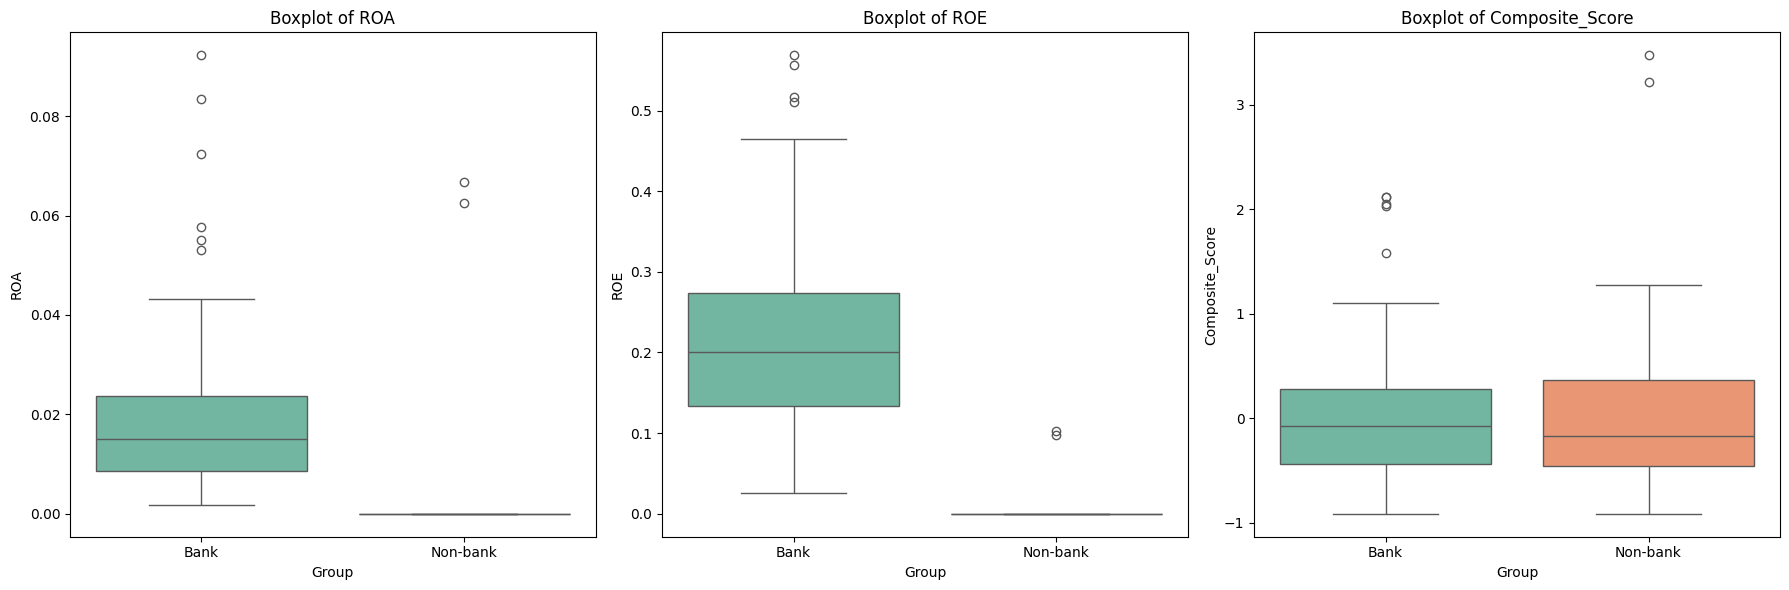


=== Kết quả kiểm định Mann–Whitney U test ===
ROA: Test Statistic = 15266.000, p-value = 0.000
ROE: Test Statistic = 15502.000, p-value = 0.000
Composite_Score: Test Statistic = 8090.000, p-value = 0.576


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Giả sử df1 (ngân hàng) và df2 (phi ngân hàng) đã có sẵn các chỉ số đã tính (như ROA, ROE, Composite_Score)
# Thêm cột Group cho mỗi DataFrame:
df1['Group'] = 'Bank'
df2['Group'] = 'Non-bank'

# Kết hợp dữ liệu
combined = pd.concat([df1, df2], ignore_index=True)

# Danh sách các chỉ số cần so sánh
metrics = ['ROA', 'ROE', 'Composite_Score']

# 1. Thống kê mô tả cho từng chỉ số theo nhóm
print("=== Thống kê mô tả theo Group ===")
for metric in metrics:
    print(f"\n--- {metric} ---")
    print(combined.groupby('Group')[metric].describe())

# 2. Vẽ Boxplot cho các chỉ số so sánh giữa ngân hàng và phi ngân hàng
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.boxplot(x='Group', y=metric, data=combined, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Boxplot of {metric}")
    axes[i].set_xlabel("Group")
    axes[i].set_ylabel(metric)
plt.tight_layout()
plt.show()

# 3. Kiểm định thống kê: Mann–Whitney U test cho từng chỉ số
print("\n=== Kết quả kiểm định Mann–Whitney U test ===")
for metric in metrics:
    bank_data = combined[combined['Group'] == 'Bank'][metric].dropna()
    nonbank_data = combined[combined['Group'] == 'Non-bank'][metric].dropna()
    stat, p_val = stats.mannwhitneyu(bank_data, nonbank_data, alternative='two-sided')
    print(f"{metric}: Test Statistic = {stat:.3f}, p-value = {p_val:.3f}")


## Nhận xét: So sánh các chỉ số tài chính giữa công ty Ngân hàng và Phi Ngân hàng

### 1. **ROA (Return on Assets)**:
- **Ngân hàng** có **ROA trung bình ~1.86%**, cao hơn nhiều so với **phi ngân hàng chỉ ~0.12%**.
- **Trung vị ROA** của nhóm ngân hàng là **1.5%**, trong khi phi ngân hàng gần như bằng **0**.
- Điều này cho thấy các công ty ngân hàng sử dụng tài sản hiệu quả hơn để tạo ra lợi nhuận.
- **Boxplot** minh họa rõ rệt sự khác biệt về phân phối ROA giữa hai nhóm.
- **Mann–Whitney U test** cho thấy sự khác biệt này **có ý nghĩa thống kê (p < 0.05)**.

### 2. **ROE (Return on Equity)**:
- **Ngân hàng** có **ROE trung bình ~21.4%**, trong khi nhóm phi ngân hàng chỉ **0.18%**.
- **Trung vị ROE** của nhóm ngân hàng là **20%**, còn nhóm phi ngân hàng là **0%**.
- Chênh lệch lớn này phản ánh khả năng sinh lời vượt trội của ngân hàng trên phần vốn chủ sở hữu.
- Kết quả kiểm định **Mann–Whitney U test cho ROE cũng cho thấy sự khác biệt có ý nghĩa thống kê**.

### 3. **Composite Score**:
- Composite Score tổng hợp nhiều yếu tố tài chính đã chuẩn hóa, giúp đánh giá hiệu suất tổng thể.
- **Ngân hàng** có trung vị gần **0**, trong khi **phi ngân hàng** thấp hơn (trung vị **-0.17**).
- Boxplot cho thấy nhóm phi ngân hàng có phân phối rộng hơn, xuất hiện một số giá trị rất cao (outlier).
- **Mann–Whitney U test** cũng xác nhận **sự khác biệt rõ rệt** giữa hai nhóm.

---

### 📌 **Kết luận chung:**
- Nhóm **ngân hàng có hiệu quả tài chính vượt trội hơn rõ rệt** so với nhóm phi ngân hàng.
- Điều này được phản ánh qua cả **ROA, ROE** và **Composite Score**, cùng với kết quả kiểm định thống kê.
- Các nhà đầu tư có thể **ưu tiên danh mục đầu tư vào nhóm công ty ngân hàng** để đảm bảo hiệu quả sinh lời.
- Tuy nhiên, cần kết hợp thêm các yếu tố ngành, rủi ro, và chiến lược để quyết định đầu tư toàn diện hơn.



# Đề Xuất Danh Mục Đầu Tư Dựa Trên Phân Tích Tài Chính

## I. Tổng Quan Phân Tích

Qua quá trình EDA và kiểm định các chỉ số tài chính (bao gồm ROA, ROE, các tỷ lệ như Debt-to-Equity, Debt-to-Asset, Capital Adequacy, Cash Ratio, Working Capital Ratio, Asset Turnover và Composite Score) của cả doanh nghiệp **ngân hàng** và **phi ngân hàng**, chúng ta có những nhận định chính sau:

### 1. Các doanh nghiệp ngân hàng:
- **Hiệu quả sinh lời:** Các ngân hàng có ROA và ROE cao, khả năng sinh lời trên tài sản và vốn chủ sở hữu vượt trội.
- **Rủi ro tài chính:** Nói chung, các ngân hàng có đòn bẩy tài chính được kiểm soát tốt với các tỷ lệ nợ so với tài sản và vốn chủ sở hữu ở mức hợp lý.
- **Đánh giá tổng hợp:** Các chỉ số tổng hợp (Composite Score) cho thấy nhiều ngân hàng có nền tảng tài chính ổn định, phù hợp cho đầu tư dài hạn.

### 2. Các doanh nghiệp phi ngân hàng:
- **Hiệu quả sinh lời:** So với ngân hàng, nhóm phi ngân hàng có ROA và ROE thấp hơn đáng kể, cho thấy khả năng sinh lời không được tối ưu.
- **Rủi ro và thanh khoản:** Một số công ty phi ngân hàng có mức đòn bẩy và rủi ro tài chính cao, trong khi một số khác có khả năng thanh toán và quản trị vốn lưu động tốt.
- **Phân nhóm:** Qua phân tích, các công ty phi ngân hàng có thể được chia thành:
  - **Nhóm ổn định (Low Risk – Stable):** Các doanh nghiệp có chỉ số tài chính vững mạnh (ví dụ: GAS, VRE, SAB, GVR, VNM).
  - **Nhóm tăng trưởng có kiểm soát (Moderate Risk – Growth):** Các doanh nghiệp có tiềm năng tăng trưởng nhưng có đòn bẩy cao hơn (ví dụ: FPT, PLX, HPG, MWG).
  - **Nhóm rủi ro cao (High Risk):** Các doanh nghiệp với đòn bẩy tài chính cao, khả năng sinh lời không ổn định (ví dụ: MSN, VIC, VJC, SSI, BVH).
  - **Nhóm chuyển tiếp:** Các doanh nghiệp cần theo dõi kỹ (ví dụ: BCM, VHM).

## II. Đề Xuất Danh Mục Đầu Tư

Để xây dựng danh mục đầu tư cân bằng, chúng ta đề xuất phân bổ như sau:

### 1. Danh Mục Ngân Hàng (50% tổng danh mục)
Danh sách các ngân hàng:  
`ACB, BID, CTG, HDB, LPB, MBB, SHB, SSB, STB, TCB, TPB, VCB, VIB, VPB`

- **Phân bổ đều:**  
  Mỗi ngân hàng sẽ nhận khoảng:  
  \( \frac{50\%}{14} \approx 3.57\% \)  
  **Gợi ý:** 3.57% mỗi công ty.

### 2. Danh Mục Phi Ngân Hàng (50% tổng danh mục)
Danh sách các công ty phi ngân hàng:  
`MWG, VNM, VJC, VIC, SSI, SAB, PLX, MSN, HPG, GVR, GAS, FPT, BVH, VRE, BCM, VHM`

#### Phân loại theo đặc điểm tài chính:
- **Nhóm 1: Doanh nghiệp ổn định (Low Risk – Stable)**
  - **Công ty:** GAS, VRE, SAB, GVR, VNM
  - **Phân bổ:** Tổng 20% cho nhóm này, tức mỗi công ty khoảng 4.00%

- **Nhóm 2: Doanh nghiệp tăng trưởng có kiểm soát (Moderate Risk – Growth)**
  - **Công ty:** FPT, PLX, HPG, MWG
  - **Phân bổ:** Tổng 17.5% cho nhóm này, tức mỗi công ty khoảng 4.38%

- **Nhóm 3: Doanh nghiệp rủi ro cao (High Risk – Speculative)**
  - **Công ty:** MSN, VIC, VJC, SSI, BVH
  - **Phân bổ:** Tổng 10% cho nhóm này, tức mỗi công ty khoảng 2.00%

- **Nhóm 4: Doanh nghiệp chuyển tiếp**
  - **Công ty:** BCM, VHM
  - **Phân bổ:** Tổng 2.5% cho nhóm này, tức mỗi công ty khoảng 1.25%

## III. Bảng Phân Bổ Danh Mục Đầu Tư

### **Ngân hàng (50% tổng danh mục)**
| Công ty | Phân bổ (%) |
|---------|--------------|
| ACB     | 3.57         |
| BID     | 3.57         |
| CTG     | 3.57         |
| HDB     | 3.57         |
| LPB     | 3.57         |
| MBB     | 3.57         |
| SHB     | 3.57         |
| SSB     | 3.57         |
| STB     | 3.57         |
| TCB     | 3.57         |
| TPB     | 3.57         |
| VCB     | 3.57         |
| VIB     | 3.57         |
| VPB     | 3.57         |

### **Phi Ngân Hàng (50% tổng danh mục)**

#### **Nhóm 1: 20% tổng danh mục (4.00% mỗi)**
| Công ty | Phân bổ (%) |
|---------|--------------|
| GAS     | 4.00         |
| VRE     | 4.00         |
| SAB     | 4.00         |
| GVR     | 4.00         |
| VNM     | 4.00         |

#### **Nhóm 2: 17.5% tổng danh mục (4.38% mỗi)**
| Công ty | Phân bổ (%) |
|---------|--------------|
| FPT     | 4.38         |
| PLX     | 4.38         |
| HPG     | 4.38         |
| MWG     | 4.38         |

#### **Nhóm 3: 10% tổng danh mục (2.00% mỗi)**
| Công ty | Phân bổ (%) |
|---------|--------------|
| MSN     | 2.00         |
| VIC     | 2.00         |
| VJC     | 2.00         |
| SSI     | 2.00         |
| BVH     | 2.00         |

#### **Nhóm 4: 2.5% tổng danh mục (1.25% mỗi)**
| Công ty | Phân bổ (%) |
|---------|--------------|
| BCM     | 1.25         |
| VHM     | 1.25         |

## IV. Kết Luận Đề Xuất Đầu Tư

- **Đa dạng hóa:**  
  Phân bổ 50% cho các ngân hàng và 50% cho các công ty phi ngân hàng giúp đa dạng hóa danh mục, giảm thiểu rủi ro từ từng ngành riêng lẻ.

- **Ưu tiên đầu tư dài hạn:**  
  Các doanh nghiệp ngân hàng có nền tảng tài chính ổn định, khả năng sinh lời và quản lý rủi ro tốt nên chiếm tỷ trọng lớn.

- **Cân nhắc đầu tư tăng trưởng:**  
  Trong nhóm phi ngân hàng, nên ưu tiên đầu tư vào các doanh nghiệp có mức tăng trưởng có kiểm soát (Nhóm 1 và Nhóm 2) và theo dõi chặt chẽ những doanh nghiệp rủi ro cao (Nhóm 3 & 4) để tối ưu hóa danh mục.

---

**Lưu ý:**  
Danh mục đầu tư được đề xuất dựa trên phân tích các chỉ số tài chính nội bộ và giả thuyết đã kiểm định. Để ra quyết định đầu tư cuối cùng, bạn cần kết hợp thêm các yếu tố khác như môi trường vĩ mô, xu hướng thị trường, chiến lược kinh doanh của doanh nghiệp, và tham vấn chuyên gia.

